In [ ]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns

import missingno as msno


import matplotlib.pyplot as plt
%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

import sklearn.preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import precision_score, auc, roc_auc_score, roc_curve, precision_recall_curve

from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.linear_model import Ridge, Lasso
from sklearn.feature_selection import RFE
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
# Training the model on the train data
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import metrics



from scipy.stats.mstats import winsorize

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler 

from sklearn.decomposition import PCA

In [ ]:
# !pip install lazypredict

In [ ]:
# !pip uninstall scikit-learn -y
# # 

In [ ]:
# !pip install scikit-learn==0.23.1

In [ ]:
from lazypredict.Supervised import LazyClassifier
from sklearn.utils import shuffle

### Reading CSV files

In [ ]:
df_2014 = pd.read_csv("2014_Financial_Data.csv")
df_2015 = pd.read_csv("2015_Financial_Data.csv")
df_2016 = pd.read_csv("2016_Financial_Data.csv")
df_2017 = pd.read_csv("2017_Financial_Data.csv")
df_2018 = pd.read_csv("2018_Financial_Data.csv")

In [ ]:
nasdaq = pd.read_csv("nasdaq.csv")

In [ ]:
nasdaq.shape

(7998, 3)

In [ ]:
nasdaq.columns

Index(['Symbol', 'Name', 'Country'], dtype='object')

In [ ]:
nasdaq.head()

Symbol                                               Name        Country
0      A             Agilent Technologies Inc. Common Stock  United States
1     AA                    Alcoa Corporation Common Stock             NaN
2    AAC  Ares Acquisition Corporation Class A Ordinary ...            NaN
3   AACG   ATA Creativity Global American Depositary Shares          China
4  AACIU                    Armada Acquisition Corp. I Unit  United States

In [ ]:
nasdaq.drop('Name', axis=1, inplace=True)

In [ ]:
df_2014.shape

(3808, 225)

In [ ]:
df_2015.shape

(4120, 225)

In [ ]:
df_2016.shape

(4797, 225)

In [ ]:
df_2017.shape

(4960, 225)

In [ ]:
df_2018.shape

(4392, 225)

In [ ]:
df_2014['Year'] = 2014
df_2015['Year'] = 2015
df_2016['Year'] = 2016
df_2017['Year'] = 2017
df_2018['Year'] = 2018

In [ ]:
df_2014.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       '2015 PRICE VAR [%]', 'Class', 'Year'],
      dtype='object', length=226)

In [ ]:
df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2015.rename(columns={'2016 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2016.rename(columns={'2017 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2017.rename(columns={'2018 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)
df_2018.rename(columns={'2019 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [ ]:
df = pd.concat([df_2014, df_2015, df_2016, df_2017, df_2018], axis = 0)

In [ ]:
df.shape

(22077, 226)

In [ ]:
df.columns

Index(['Unnamed: 0', 'Revenue', 'Revenue Growth', 'Cost of Revenue',
       'Gross Profit', 'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense',
       ...
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'Next_Year_Price_Var[%]', 'Class', 'Year'],
      dtype='object', length=226)

In [ ]:
df.head()

Unnamed: 0        Revenue  ...  Class  Year
0         PG 74401000000.00  ...      0  2014
1       VIPS  3734148046.50  ...      0  2014
2         KR 98375000000.00  ...      1  2014
3        RAD 25526413000.00  ...      1  2014
4        GIS 17909600000.00  ...      1  2014

[5 rows x 226 columns]

In [ ]:
df.rename(columns={"Unnamed: 0": "Symbol"}, inplace=True)
# df_2014.rename(columns={'2015 PRICE VAR [%]':'Next_Year_Price_Var[%]'}, inplace=True)

In [ ]:
df = pd.merge(df, nasdaq, how="inner", on="Symbol")

In [ ]:
df.shape

(18703, 227)

In [ ]:
df.head()

Symbol        Revenue  Revenue Growth  ...  Class  Year        Country
0     PG 74401000000.00           -0.07  ...      0  2014  United States
1     PG 70749000000.00           -0.05  ...      1  2015  United States
2     PG 65299000000.00           -0.08  ...      1  2016  United States
3     PG 65058000000.00           -0.00  ...      1  2017  United States
4     PG 66832000000.00            0.03  ...      1  2018  United States

[5 rows x 227 columns]

In [ ]:
df.Country.value_counts()

United States     14964
Canada              607
China               389
Israel              304
United Kingdom      190
Bermuda             156
Netherlands         102
Brazil               93
Ireland              80
Switzerland          76
Greece               75
Argentina            63
Mexico               60
India                53
France               49
Australia            46
Taiwan               45
South Korea          45
Cayman Islands       45
Germany              39
Hong Kong            37
Luxembourg           35
Japan                35
South Africa         35
Singapore            30
Chile                30
Denmark              23
Belgium              20
Spain                20
Sweden               15
Puerto Rico          15
Peru                 15
Colombia             15
Monaco               15
Italy                10
Russia               10
Curacao              10
Jersey               10
Panama               10
Indonesia             5
New Zealand           5
Philippines     

In [ ]:
df.Country.isnull().sum()

787

In [ ]:
#Next_Year_Price_Var[%] +ve ---> class = 1, if -ve -----> class = 0
df.drop('Next_Year_Price_Var[%]', axis=1, inplace=True)

In [ ]:
df.rename(columns={"Symbol":"Name"}, inplace=True)

In [ ]:
df.Name.nunique()

4116

In [ ]:
df.shape

(18703, 226)

In [ ]:
df.info

<bound method DataFrame.info of         Name        Revenue  Revenue Growth  ...  Class  Year        Country
0         PG 74401000000.00           -0.07  ...      0  2014  United States
1         PG 70749000000.00           -0.05  ...      1  2015  United States
2         PG 65299000000.00           -0.08  ...      1  2016  United States
3         PG 65058000000.00           -0.00  ...      1  2017  United States
4         PG 66832000000.00            0.03  ...      1  2018  United States
...      ...            ...             ...  ...    ...   ...            ...
18698    BAK 14948419072.16            0.00  ...      0  2018         Brazil
18699    DNB  3011000000.00             nan  ...      1  2018  United States
18700   HYAC            nan             nan  ...      1  2018  United States
18701  HYACU            nan             nan  ...      1  2018  United States
18702    LCA           0.00            0.00  ...      1  2018  United States

[18703 rows x 226 columns]>

In [ ]:
df.describe()

Revenue  Revenue Growth  ...    Class     Year
count        17865.00        17335.00  ... 18703.00 18703.00
mean    5131140670.04            4.04  ...     0.56  2016.09
std    20942652588.20          335.69  ...     0.50     1.38
min     -627616000.00          -12.77  ...     0.00  2014.00
25%       65719857.00           -0.01  ...     0.00  2015.00
50%      477107000.00            0.06  ...     1.00  2016.00
75%     2565486000.00            0.18  ...     1.00  2017.00
max   848262000000.00        42138.66  ...     1.00  2018.00

[8 rows x 223 columns]

In [ ]:
## Removing "Year" because our future companies will have different years and it should not affect our final call
df.drop("Year", axis=1, inplace=True)

In [ ]:
## Removing "Name" because our future companies will have different Name and it should not affect our final call
df.drop("Name", axis=1, inplace=True)

In [ ]:
df.head(2)

Revenue  Revenue Growth  ...  Class        Country
0 74401000000.00           -0.07  ...      0  United States
1 70749000000.00           -0.05  ...      1  United States

[2 rows x 224 columns]

In [ ]:
df.loc[(df.Country=="United States")].shape

(14964, 224)

In [ ]:
df.loc[(df.Country=="United States")]

Revenue  Revenue Growth  ...  Class        Country
0     74401000000.00           -0.07  ...      0  United States
1     70749000000.00           -0.05  ...      1  United States
2     65299000000.00           -0.08  ...      1  United States
3     65058000000.00           -0.00  ...      1  United States
4     66832000000.00            0.03  ...      1  United States
...              ...             ...  ...    ...            ...
18697            nan             nan  ...      0  United States
18699  3011000000.00             nan  ...      1  United States
18700            nan             nan  ...      1  United States
18701            nan             nan  ...      1  United States
18702           0.00            0.00  ...      1  United States

[14964 rows x 224 columns]

In [ ]:
# Selecting only United States

In [ ]:
df.Country.value_counts()

United States     14964
Canada              607
China               389
Israel              304
United Kingdom      190
Bermuda             156
Netherlands         102
Brazil               93
Ireland              80
Switzerland          76
Greece               75
Argentina            63
Mexico               60
India                53
France               49
Australia            46
Taiwan               45
South Korea          45
Cayman Islands       45
Germany              39
Hong Kong            37
Luxembourg           35
Japan                35
South Africa         35
Singapore            30
Chile                30
Denmark              23
Belgium              20
Spain                20
Sweden               15
Puerto Rico          15
Peru                 15
Colombia             15
Monaco               15
Italy                10
Russia               10
Curacao              10
Jersey               10
Panama               10
Indonesia             5
New Zealand           5
Philippines     

In [ ]:
df = df.loc[(df.Country=="United States")]

In [ ]:
df.drop('Country', axis=1, inplace=True)

### Understanding Null Value Distribution

In [ ]:
df.isnull().sum().sort_values(ascending=False)

operatingCycle                    14964
cashConversionCycle               14964
shortTermCoverageRatios            7418
priceEarningsToGrowthRatio         5473
dividendPayoutRatio                5473
                                  ...  
Operating Income                    725
Net cash flow / Change in cash      716
Financing Cash Flow                 699
Sector                                0
Class                                 0
Length: 223, dtype: int64

In [ ]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=False)

operatingCycle                   100.00
cashConversionCycle              100.00
shortTermCoverageRatios           49.57
priceEarningsToGrowthRatio        36.57
dividendPayoutRatio               36.57
                                  ...  
Operating Income                   4.84
Net cash flow / Change in cash     4.78
Financing Cash Flow                4.67
Sector                             0.00
Class                              0.00
Length: 223, dtype: float64

In [ ]:
(df.isnull().sum() * 100 / len(df)).sort_values(ascending=True).head(15)

Class                            0.00
Sector                           0.00
Financing Cash Flow              4.67
Net cash flow / Change in cash   4.78
Operating Income                 4.84
Receivables                      4.85
Revenue                          5.00
Earnings Before Tax Margin       5.05
Gross Margin                     5.08
Operating Cash Flow              5.15
Gross Profit                     5.24
Retained earnings (deficit)      5.34
Cash and cash equivalents        5.35
Earnings before Tax              5.53
EPS                              5.59
dtype: float64

In [ ]:
# all cols have some null values
len(df.isnull().any())

223

In [ ]:
# No columns with all null values
df.columns[df.isnull().all()]

Index(['operatingCycle', 'cashConversionCycle'], dtype='object')

In [ ]:
# Defining a funtion to add the count/frequency values as annotation to histogram.
def annotate_graph(ax):
    for bar in ax.patches:         
        ax.annotate(format((bar.get_height()), '.0f'),                    
                    (bar.get_x() + bar.get_width() / 2,  bar.get_height()),                    
                    ha='center', va='center',                    
                    size=10, xytext=(0, 8),                    
                    textcoords='offset points')
    return ax

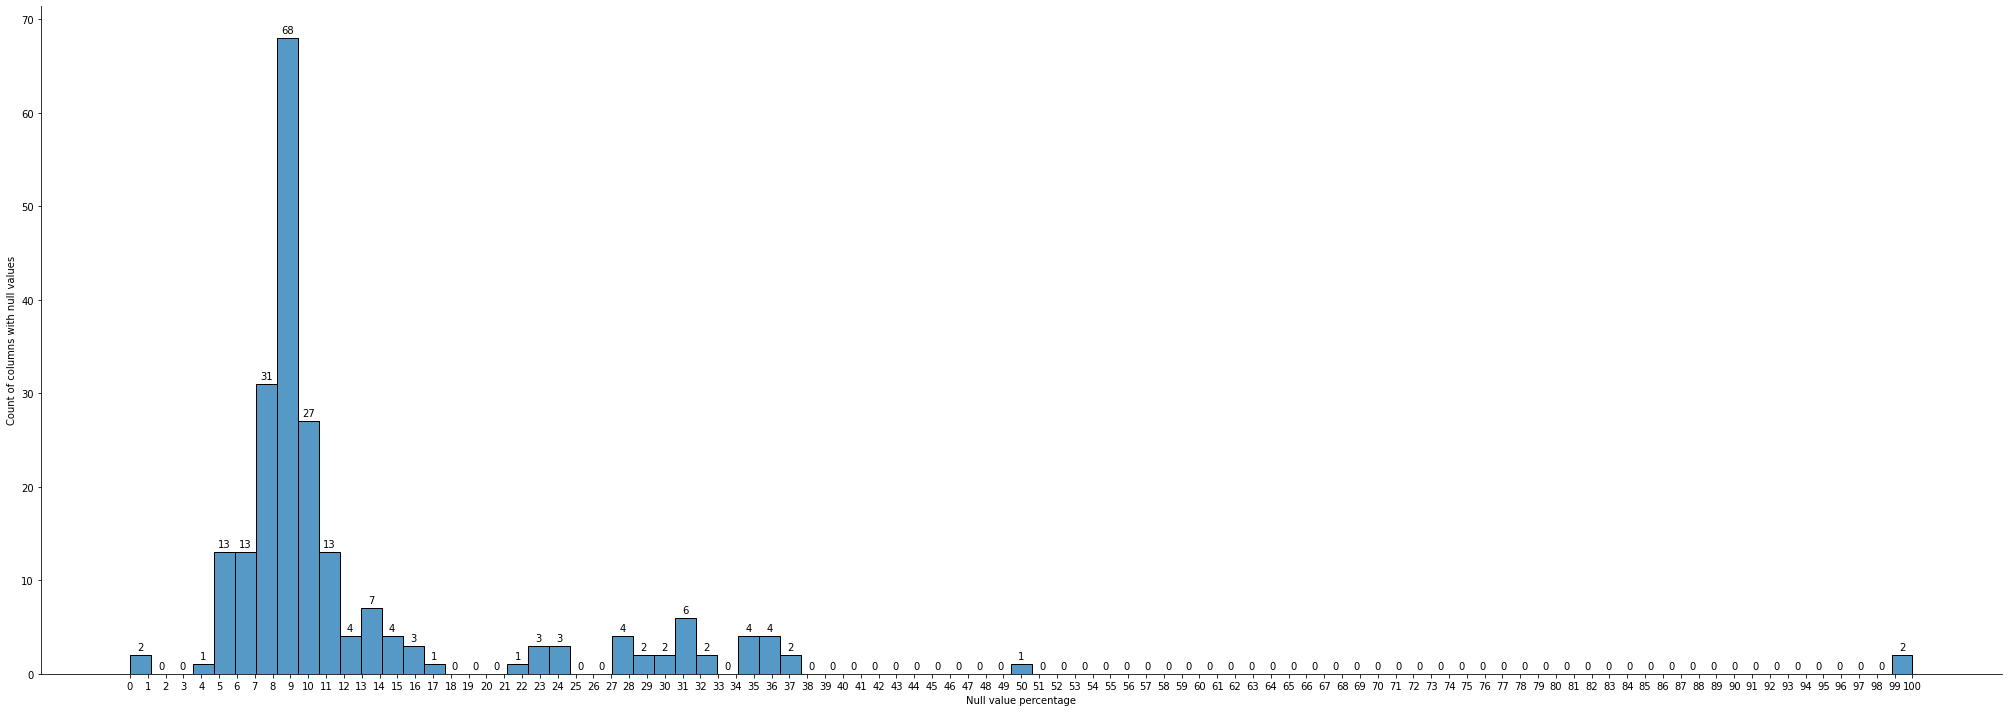

In [ ]:
# Plotting histogram for the dataframe and columns having null values.
plt.figure(figsize=(28,10))

ax = sns.histplot(round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
ax = annotate_graph(ax)

ax.set(xticks=np.arange(0,101))
ax.set(xlabel='Null value percentage', ylabel='Count of columns with null values')
sns.despine()
plt.tight_layout()

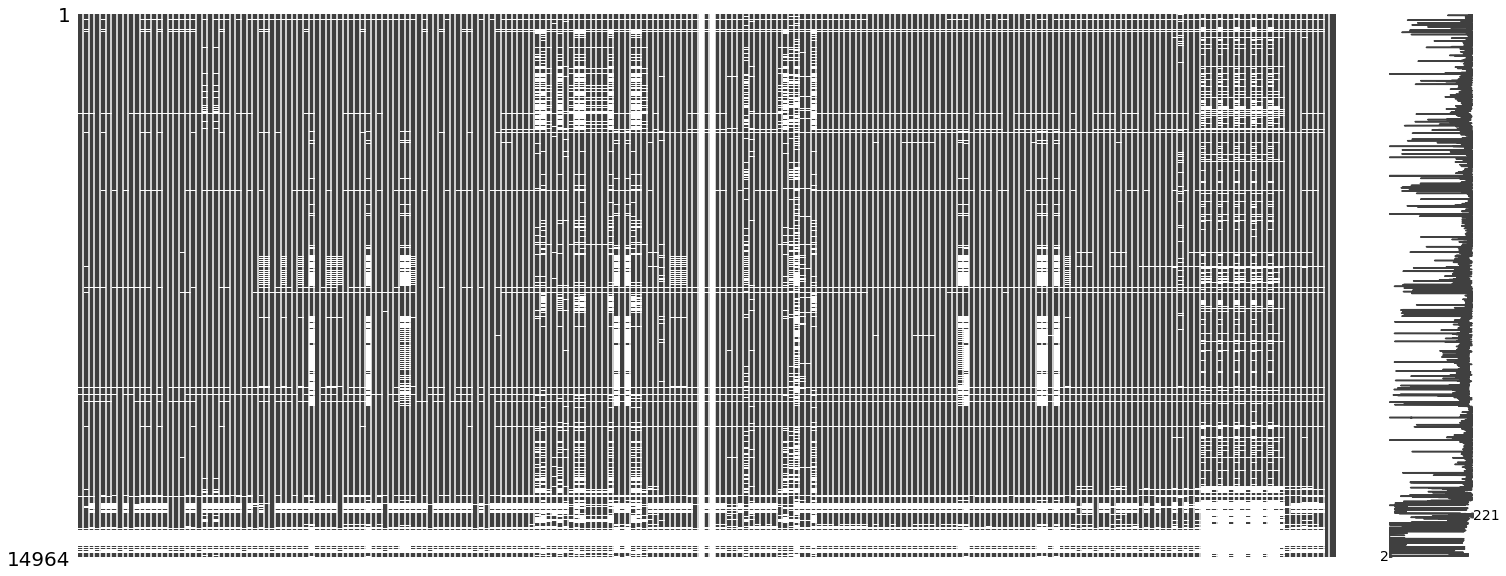

In [ ]:
msno.matrix(df)

In [ ]:
# defining a function to get more than cutoff percent missing value

def get_missing_value_percentage(cutoff):
    y = pd.DataFrame( round((df.isnull().sum()/len(df.index) * 100).sort_values(ascending=False), 2))
    y.rename(columns={0:"Percentage"}, inplace=True)
    y2 = y[y.Percentage>cutoff]
    return y2

In [ ]:
# get columns with more than 70% missing values
greater_than_70 = get_missing_value_percentage(70)

In [ ]:
len(greater_than_70)

2

In [ ]:
greater_than_70

Percentage
operatingCycle           100.00
cashConversionCycle      100.00

In [ ]:
# get columns with more than 50% missing values
greater_than_50 = get_missing_value_percentage(50)

In [ ]:
len(greater_than_50)

2

In [ ]:
greater_than_50

Percentage
operatingCycle           100.00
cashConversionCycle      100.00

In [ ]:
# get columns with more than 20% missing values
greater_than_20 = get_missing_value_percentage(20)
greater_than_20

Percentage
operatingCycle                                  100.00
cashConversionCycle                             100.00
shortTermCoverageRatios                          49.57
priceEarningsToGrowthRatio                       36.57
dividendPayoutRatio                              36.57
10Y Shareholders Equity Growth (per Share)       36.44
10Y Net Income Growth (per Share)                35.74
10Y Revenue Growth (per Share)                   35.74
10Y Operating CF Growth (per Share)              35.52
effectiveTaxRate                                 34.60
niperEBT                                         34.60
nIperEBT                                         34.60
10Y Dividend per Share Growth (per Share)        34.41
ebtperEBIT                                       32.58
eBTperEBIT                                       32.58
Current ratio                                    31.24
Return on Tangible Assets                        31.21
returnOnAssets                                   31.21
returnOnCapitalEmployed                          31.20
Working Capital                                  31.20
ROIC                                             31.20
Total non-current liabilities                    29.85
Total non-current assets                         29.82
priceCashFlowRatio                               29.04
enterpriseValueMultiple                          28.26
cashFlowCoverageRatios                           27.63
cashFlowToDebtRatio                              27.63
freeCashFlowOperatingCashFlowRatio               27.13
Net Debt to EBITDA                               27.08
Net Debt                                         24.68
Other Assets                                     24.57
5Y Shareholders Equity Growth (per Share)        24.08
5Y Revenue Growth (per Share)                    23.14
5Y Net Income Growth (per Share)                 23.14
5Y Operating CF Growth (per Share)               23.09
5Y Dividend per Share Growth (per Share)         21.32

### Removing Null Values

In [ ]:
# function to drop cols which have more than 20% null values

def remove_cols_with_nulls (df, threshold):
    myCol = list(df.columns)
    for col in myCol: 
        percentage = (df[col].isnull().sum()/len(df[col]))*100
        if percentage>threshold:
            df.drop(col, axis=1, inplace=True)

In [ ]:
df.shape

(14964, 223)

In [ ]:
remove_cols_with_nulls(df, 20)

In [ ]:
df.shape

(14964, 187)

In [ ]:
len(df.columns[(df.isnull().any())])

185

In [ ]:
# Deleting rows with any null value
df.dropna(how='all',axis=0, inplace=True) 

In [ ]:
# Therefore, there is no row will all NULL values
df.shape

(14964, 187)

In [ ]:
# Deleting rows with any null value
df.dropna(how='any',axis=0, inplace=True) 

In [ ]:
df.shape

(9358, 187)

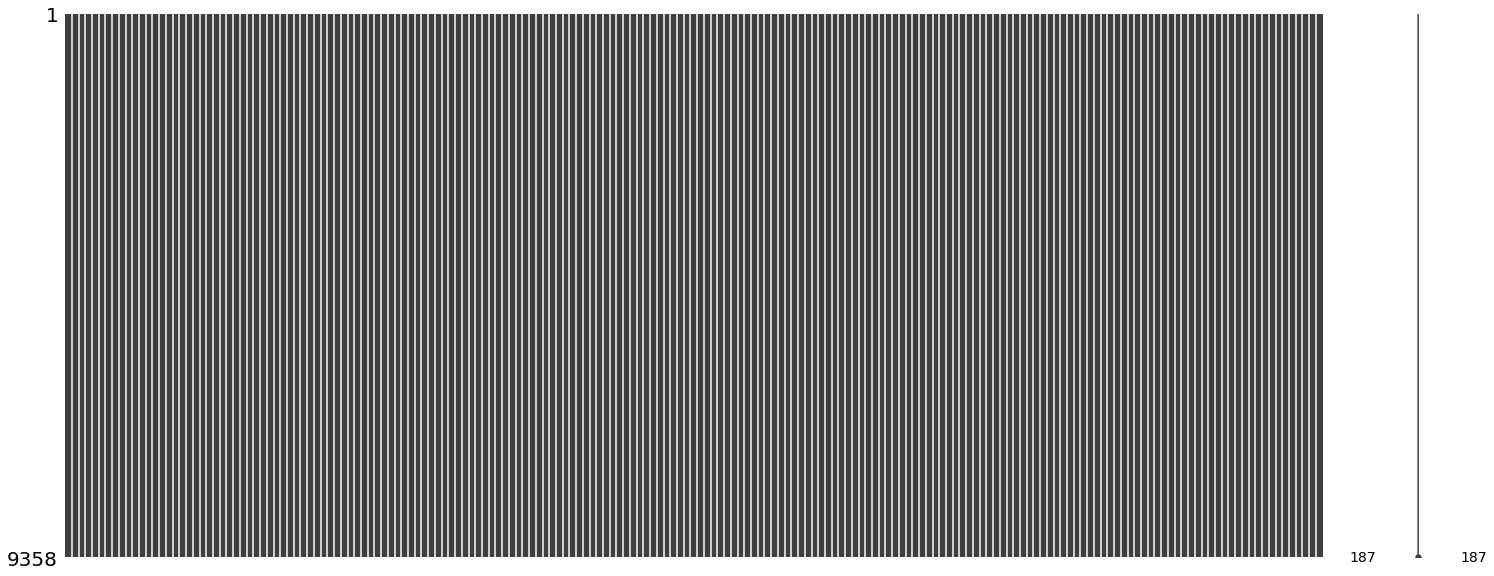

In [ ]:
msno.matrix(df)

In [ ]:
df.isnull().any().sum()

0

In [ ]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'R&D Expenses', 'SG&A Expense', 'Operating Expenses',
       'Operating Income', 'Interest Expense', 'Earnings before Tax',
       ...
       '3Y Dividend per Share Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'R&D Expense Growth', 'SG&A Expenses Growth', 'Sector',
       'Class'],
      dtype='object', length=187)

In [ ]:
df.select_dtypes('number')

Revenue  Revenue Growth  ...  SG&A Expenses Growth  Class
3      65058000000.00           -0.00  ...                 -0.02      1
4      66832000000.00            0.03  ...                  0.02      1
11    108465000000.00            0.10  ...                  0.13      0
12    109830000000.00            0.01  ...                  0.05      0
13    115337000000.00            0.05  ...                  0.07      0
...               ...             ...  ...                   ...    ...
18678    827174000.00            0.52  ...                  0.53      0
18682    413412000.00            0.01  ...                 -0.12      1
18691    190174000.00            0.51  ...                  0.48      1
18693     37027382.00            0.34  ...                  0.63      0
18695    150684000.00            0.16  ...                  0.46      1

[9358 rows x 186 columns]

In [ ]:
df['R&D Expenses'].value_counts()

0.00             6043
105000000.00        3
82000000.00         3
73100000.00         3
6910000.00          2
                 ... 
137000000.00        1
254440000.00        1
766100000.00        1
5726000000.00       1
74452000.00         1
Name: R&D Expenses, Length: 3238, dtype: int64

In [ ]:
df.shape[0]

9358

In [ ]:
df['R&D Expenses'].value_counts(normalize=True).sort_values(ascending=False)[0]

0.645757640521479

In [ ]:
# more than 50% value of R&D expense is 0. Remove numeric cols with dominant values

In [ ]:
df.operatingProfitMargin.value_counts().sort_values(ascending=False).iloc[0]

9358

In [ ]:
#Code goes to except block when single value is met ---> which is SERIES and you cannot do simple indexing in SERIES

In [ ]:
counter = 0
for col in list(df.select_dtypes('number').columns):
    try:  
        val = df[col].value_counts(normalize=True).sort_values(ascending=False)[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
    except:
        val = df[col].value_counts(normalize=True).sort_values(ascending=False).iloc[0]
        if(val>0.5):
            df.drop(col, axis=1, inplace=True)
            counter = counter+1
        
    
print("Total Columns Deleted = ",counter)

Total Columns Deleted =  15


In [ ]:
df.shape

(9358, 172)

In [ ]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       ...
       '3Y Net Income Growth (per Share)',
       '3Y Shareholders Equity Growth (per Share)', 'Receivables growth',
       'Inventory Growth', 'Asset Growth', 'Book Value per Share Growth',
       'Debt Growth', 'SG&A Expenses Growth', 'Sector', 'Class'],
      dtype='object', length=172)

In [ ]:
df.select_dtypes(include='number')

Revenue  Revenue Growth  ...  SG&A Expenses Growth  Class
3      65058000000.00           -0.00  ...                 -0.02      1
4      66832000000.00            0.03  ...                  0.02      1
11    108465000000.00            0.10  ...                  0.13      0
12    109830000000.00            0.01  ...                  0.05      0
13    115337000000.00            0.05  ...                  0.07      0
...               ...             ...  ...                   ...    ...
18678    827174000.00            0.52  ...                  0.53      0
18682    413412000.00            0.01  ...                 -0.12      1
18691    190174000.00            0.51  ...                  0.48      1
18693     37027382.00            0.34  ...                  0.63      0
18695    150684000.00            0.16  ...                  0.46      1

[9358 rows x 171 columns]

In [ ]:
df.select_dtypes(include='object')

Sector
3      Consumer Defensive
4      Consumer Defensive
11     Consumer Defensive
12     Consumer Defensive
13     Consumer Defensive
...                   ...
18678              Energy
18682  Financial Services
18691          Technology
18693          Technology
18695          Technology

[9358 rows x 1 columns]

In [ ]:
df.select_dtypes(include='number').shape

(9358, 171)

In [ ]:
df.select_dtypes(include='object').shape

(9358, 1)

In [ ]:
df.select_dtypes(include='category').shape

(9358, 0)

In [ ]:
df.shape

(9358, 172)

In [ ]:
# 155 cols ----> 154 number, 1 Object

In [ ]:
df.Sector.value_counts()

Technology                1624
Industrials               1511
Healthcare                1367
Financial Services        1304
Consumer Cyclical         1239
Basic Materials            498
Real Estate                495
Consumer Defensive         462
Energy                     461
Utilities                  293
Communication Services     104
Name: Sector, dtype: int64

In [ ]:
sector_list = list(df.Sector.unique())

In [ ]:
sector_list

['Consumer Defensive',
 'Basic Materials',
 'Healthcare',
 'Consumer Cyclical',
 'Industrials',
 'Real Estate',
 'Communication Services',
 'Energy',
 'Financial Services',
 'Utilities',
 'Technology']

In [ ]:
pd.get_dummies(df.Sector, drop_first=True)

Communication Services  Consumer Cyclical  ...  Technology  Utilities
3                           0                  0  ...           0          0
4                           0                  0  ...           0          0
11                          0                  0  ...           0          0
12                          0                  0  ...           0          0
13                          0                  0  ...           0          0
...                       ...                ...  ...         ...        ...
18678                       0                  0  ...           0          0
18682                       0                  0  ...           0          0
18691                       0                  0  ...           1          0
18693                       0                  0  ...           1          0
18695                       0                  0  ...           1          0

[9358 rows x 10 columns]

In [ ]:
Sector_status = pd.get_dummies(df.Sector, drop_first=True)

#Adding the result to the original housing dataframe

df = pd.concat([df, Sector_status], axis=1)


In [ ]:
# Droppig Sector Column as we are done with 
df.drop("Sector", axis=1, inplace=True)

In [ ]:
df.shape

(9358, 181)

In [ ]:
df.Energy.value_counts()

0    8897
1     461
Name: Energy, dtype: int64

In [ ]:
# Sector Column will be dropped after Exploratory Data Analysis

In [ ]:
df.head()

Revenue  Revenue Growth  ...  Technology  Utilities
3   65058000000.00           -0.00  ...           0          0
4   66832000000.00            0.03  ...           0          0
11 108465000000.00            0.10  ...           0          0
12 109830000000.00            0.01  ...           0          0
13 115337000000.00            0.05  ...           0          0

[5 rows x 181 columns]

# Removing columns with single value

In [ ]:
def removeSingleValue (col):
    length = len(df[col].value_counts())
    if (length<2):
        print(col)
        df.drop(col, axis=1, inplace=True)

In [ ]:
for col in df.columns:
    removeSingleValue(col)

In [ ]:
num_col = list(df.dtypes[df.dtypes !='object'].index)

In [ ]:
len(num_col)

181

In [ ]:
df.shape

(9358, 181)

### Duplicate Row Checker

In [ ]:
df.duplicated().sum()

0

In [ ]:
# Moving "Class" Column to end
df['Result'] = df.Class
df.drop("Class", axis=1, inplace=True)
df = df.rename(columns={"Result":"Class"})

In [ ]:
df.head()

Revenue  Revenue Growth  ...  Utilities  Class
3   65058000000.00           -0.00  ...          0      1
4   66832000000.00            0.03  ...          0      1
11 108465000000.00            0.10  ...          0      0
12 109830000000.00            0.01  ...          0      0
13 115337000000.00            0.05  ...          0      0

[5 rows x 181 columns]

# Exploratory Data Analysis

In [ ]:
# Get number of positve and negative examples
pos = df[df["Class"] == 1].shape[0]
neg = df[df["Class"] == 0].shape[0]

print("Profitable Companies = ",pos)
print("Lossy Companies = ",neg)

Profitable Companies =  5498
Lossy Companies =  3860


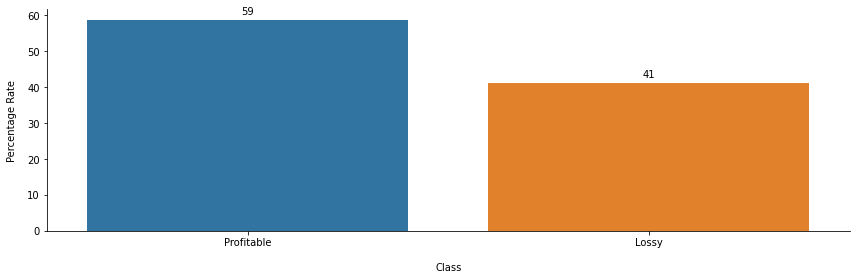

In [ ]:
# Plotting the profitable vs non-profitable customers.
plt.figure(figsize = (12, 4))

length = len(df)
ax = sns.barplot(x = ['Profitable','Lossy'], y = [pos/length * 100,neg/length * 100])
plt.xlabel("Class", labelpad = 15)
plt.ylabel('Percentage Rate', labelpad = 10)

# Call Custom Function
annotate_graph(ax)


sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
# Therefore, the output class is balanced

In [ ]:
corr_df = pd.DataFrame(df.corr()['Class'].sort_values(ascending = False))

In [ ]:
positive_corr = corr_df.loc[(corr_df.Class>0) & (corr_df.Class<1)]

In [ ]:
negative_corr = corr_df.loc[corr_df.Class<0]

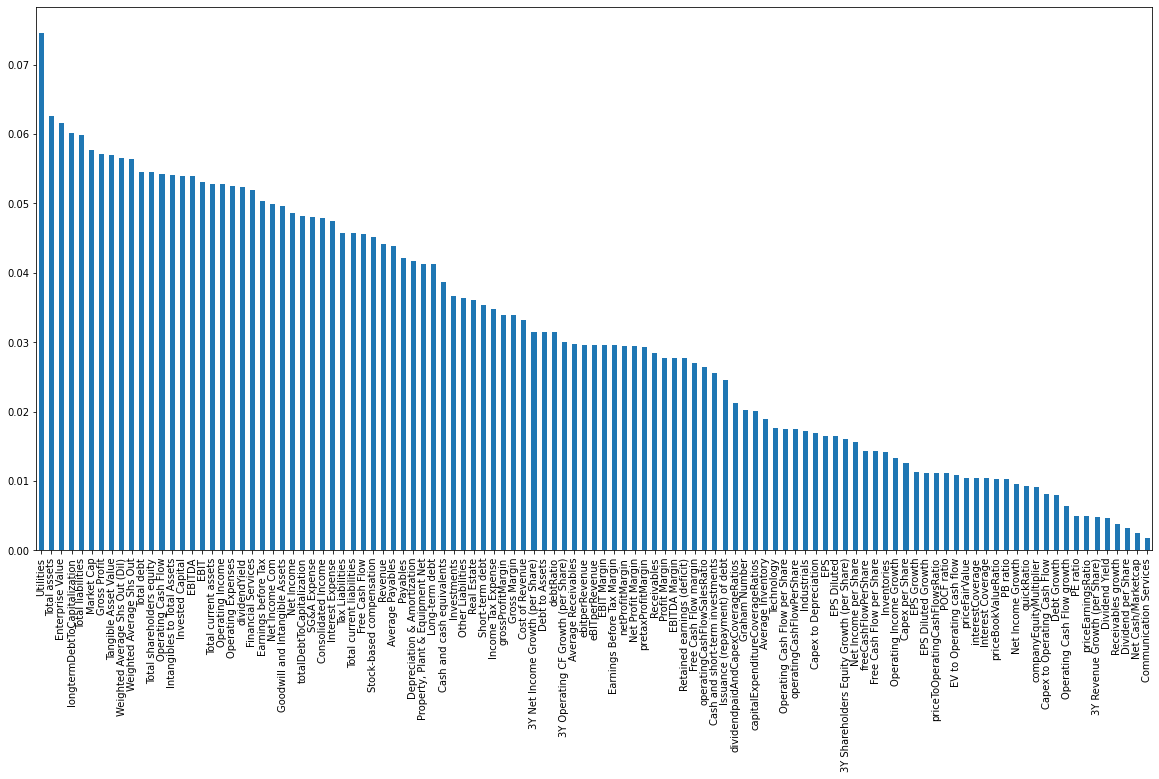

In [ ]:
# Creating bar chart for showing co-relation of all variables with Class.
plt.figure(figsize=(20,10))
positive_corr.Class.plot(kind = 'bar')
plt.show()

In [ ]:
positive_corr=positive_corr.reset_index()

In [ ]:
positive_corr

index  Class
0                       Utilities   0.07
1                    Total assets   0.06
2                Enterprise Value   0.06
3    longtermDebtToCapitalization   0.06
4               Total liabilities   0.06
..                            ...    ...
106                Dividend Yield   0.00
107            Receivables growth   0.00
108            Dividend per Share   0.00
109            Net Cash/Marketcap   0.00
110        Communication Services   0.00

[111 rows x 2 columns]

In [ ]:
positive_corr = positive_corr.rename(columns={"index":"col_name"})

In [ ]:
positive_corr

col_name  Class
0                       Utilities   0.07
1                    Total assets   0.06
2                Enterprise Value   0.06
3    longtermDebtToCapitalization   0.06
4               Total liabilities   0.06
..                            ...    ...
106                Dividend Yield   0.00
107            Receivables growth   0.00
108            Dividend per Share   0.00
109            Net Cash/Marketcap   0.00
110        Communication Services   0.00

[111 rows x 2 columns]

In [ ]:
top_pos_index = list(positive_corr.col_name[0:6])

In [ ]:
top_pos_index

['Utilities',
 'Total assets',
 'Enterprise Value',
 'longtermDebtToCapitalization',
 'Total liabilities',
 'Market Cap']

In [ ]:
top_pos_index.remove("Utilities")
# top_pos_index.remove("Financial Services")

In [ ]:
printThis = df[top_pos_index]
printThis['Class'] = df.Class

[]

<Figure size 1440x864 with 0 Axes>

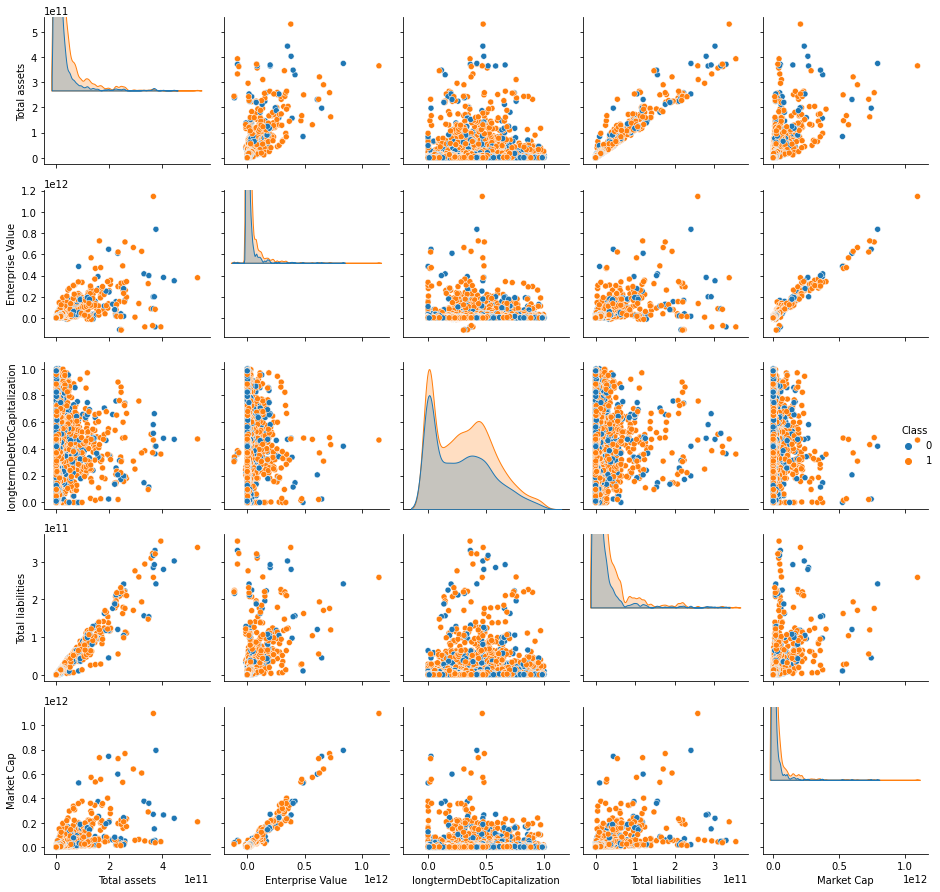

In [ ]:
# Plotting most positively related cols

plt.figure(figsize=(20,12))
sns.pairplot(printThis, hue="Class")
sns.despine()
plt.tight_layout()


plt.plot()

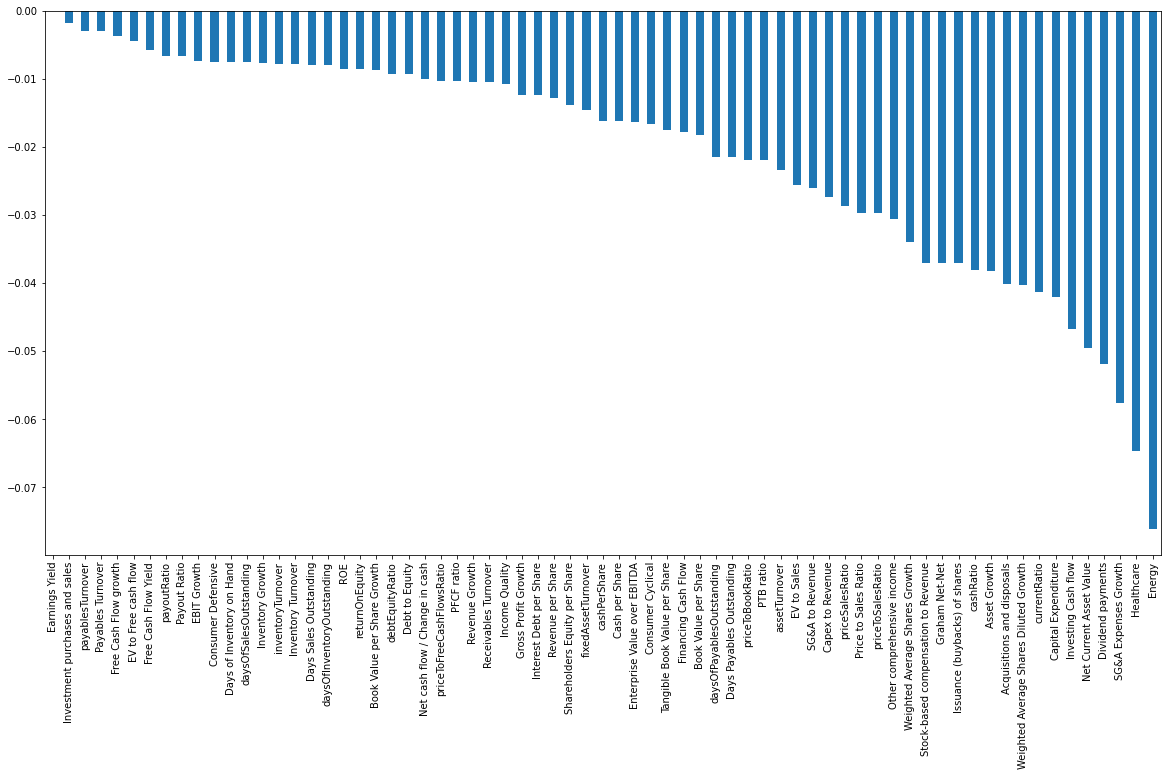

In [ ]:
# Creating bar chart for showing co-relation of all variables with Class.
plt.figure(figsize=(20,10))
negative_corr.Class.plot(kind = 'bar')
plt.show()

In [ ]:
negative_corr=negative_corr.reset_index()

In [ ]:
negative_corr

index  Class
0                   Earnings Yield  -0.00
1   Investment purchases and sales  -0.00
2                 payablesTurnover  -0.00
3                Payables Turnover  -0.00
4            Free Cash Flow growth  -0.00
..                             ...    ...
64         Net Current Asset Value  -0.05
65               Dividend payments  -0.05
66            SG&A Expenses Growth  -0.06
67                      Healthcare  -0.06
68                          Energy  -0.08

[69 rows x 2 columns]

In [ ]:
negative_corr = negative_corr.rename(columns={"index":"col_name"})

In [ ]:
negative_corr

col_name  Class
0                   Earnings Yield  -0.00
1   Investment purchases and sales  -0.00
2                 payablesTurnover  -0.00
3                Payables Turnover  -0.00
4            Free Cash Flow growth  -0.00
..                             ...    ...
64         Net Current Asset Value  -0.05
65               Dividend payments  -0.05
66            SG&A Expenses Growth  -0.06
67                      Healthcare  -0.06
68                          Energy  -0.08

[69 rows x 2 columns]

In [ ]:
top_neg_index = list(negative_corr.col_name[0:4])

In [ ]:
top_neg_index

['Earnings Yield',
 'Investment purchases and sales',
 'payablesTurnover',
 'Payables Turnover']

In [ ]:
printThis2 = df[top_neg_index]
printThis2['Class'] = df.Class

[]

<Figure size 1440x864 with 0 Axes>

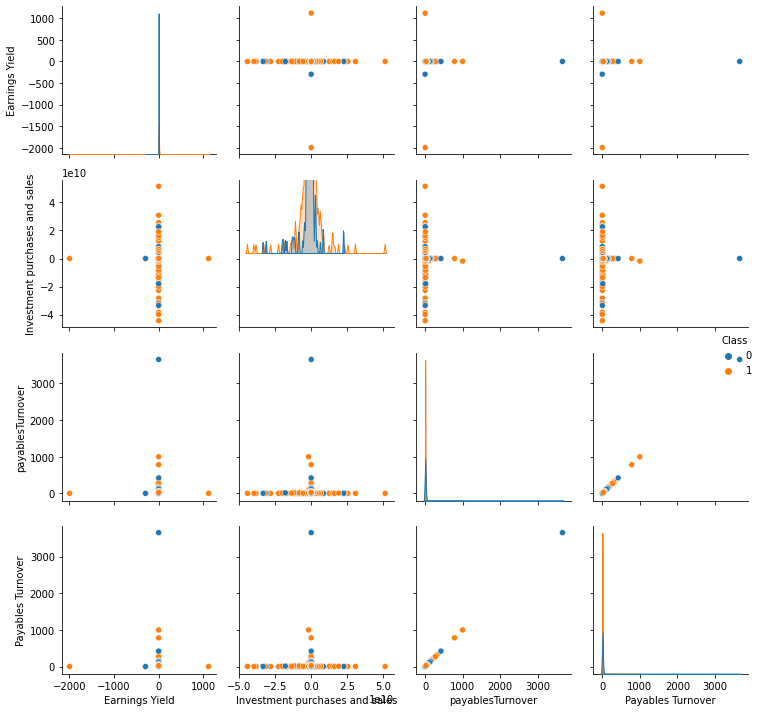

In [ ]:
# Plotting most positively related cols

plt.figure(figsize=(20,12))
sns.pairplot(printThis2, hue="Class")
sns.despine()
plt.tight_layout()


plt.plot()

In [ ]:
df.columns

Index(['Revenue', 'Revenue Growth', 'Cost of Revenue', 'Gross Profit',
       'SG&A Expense', 'Operating Expenses', 'Operating Income',
       'Interest Expense', 'Earnings before Tax', 'Income Tax Expense',
       ...
       'Consumer Cyclical', 'Consumer Defensive', 'Energy',
       'Financial Services', 'Healthcare', 'Industrials', 'Real Estate',
       'Technology', 'Utilities', 'Class'],
      dtype='object', length=181)

In [ ]:
plotHelper = pd.DataFrame()
col_name = []
mean = []
std = []
for col in df.select_dtypes(include = np.number).columns.to_list():
    col_name.append(col)
    mean.append(df[col].mean())
    std.append(df[col].std())

In [ ]:
plotHelper['col_name']=col_name
plotHelper['mean']=mean
plotHelper['std']=std

In [ ]:
plotHelper

col_name          mean            std
0            Revenue 5001404571.87 19627378611.35
1     Revenue Growth          6.59         455.51
2    Cost of Revenue 3202846042.50 14586590161.52
3       Gross Profit 1797725991.42  6696905519.21
4       SG&A Expense  837366517.85  3493866444.54
..               ...           ...            ...
176      Industrials          0.16           0.37
177      Real Estate          0.05           0.22
178       Technology          0.17           0.38
179        Utilities          0.03           0.17
180            Class          0.59           0.49

[181 rows x 3 columns]

In [ ]:
plotHelper = plotHelper.loc[~(plotHelper.col_name=="Class")]

In [ ]:
plotHelper

col_name          mean            std
0            Revenue 5001404571.87 19627378611.35
1     Revenue Growth          6.59         455.51
2    Cost of Revenue 3202846042.50 14586590161.52
3       Gross Profit 1797725991.42  6696905519.21
4       SG&A Expense  837366517.85  3493866444.54
..               ...           ...            ...
175       Healthcare          0.15           0.35
176      Industrials          0.16           0.37
177      Real Estate          0.05           0.22
178       Technology          0.17           0.38
179        Utilities          0.03           0.17

[180 rows x 3 columns]

In [ ]:
plotHelper.sort_values(by="mean", ascending=True)

col_name           mean            std
137     Net Current Asset Value -3731022960.81 15625901914.48
53          Investing Cash flow  -569420863.33  2762322894.90
50          Capital Expenditure  -330448792.24  1385220254.89
42   Other comprehensive income  -207870008.42  1232136002.70
56            Dividend payments  -174793694.03   795145029.23
..                          ...            ...            ...
136        Tangible Asset Value  7325376753.33 25109206392.25
138            Invested Capital  7696451210.00 25887805019.29
34                 Total assets  9055169015.07 29400553757.58
108                  Market Cap  9128916320.66 37374462295.72
109            Enterprise Value 10528724349.93 39156642155.08

[180 rows x 3 columns]

In [ ]:
top_mean = list(plotHelper.sort_values(by="mean",ascending=False).col_name[0:5])

In [ ]:
bottom_mean = list(plotHelper.sort_values(by="mean", ascending=True).col_name[0:5])

In [ ]:
top_std = list(plotHelper.sort_values(by="std",ascending=False).col_name[0:5])

In [ ]:
bottom_std = list(plotHelper.sort_values(by="std",ascending=True).col_name[0:5])

In [ ]:
top_mean

['Enterprise Value',
 'Market Cap',
 'Total assets',
 'Invested Capital',
 'Tangible Asset Value']

[]

<Figure size 1440x864 with 0 Axes>

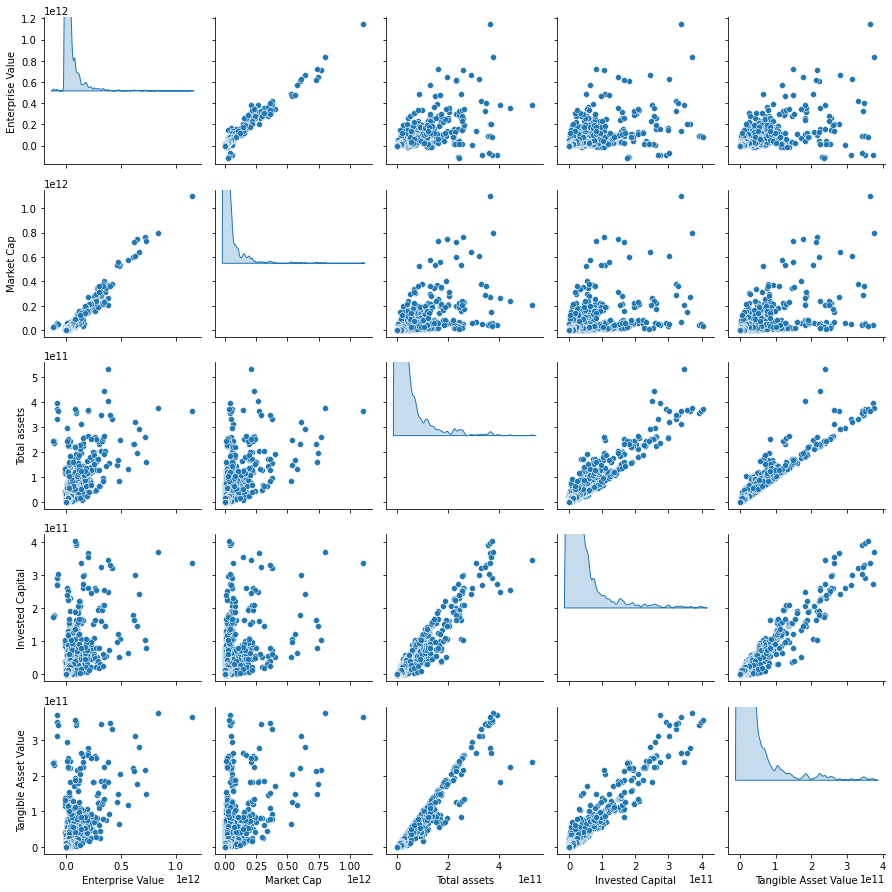

In [ ]:
# Plotting cols with highest mean

plt.figure(figsize=(20,12))
sns.pairplot(df[top_mean],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

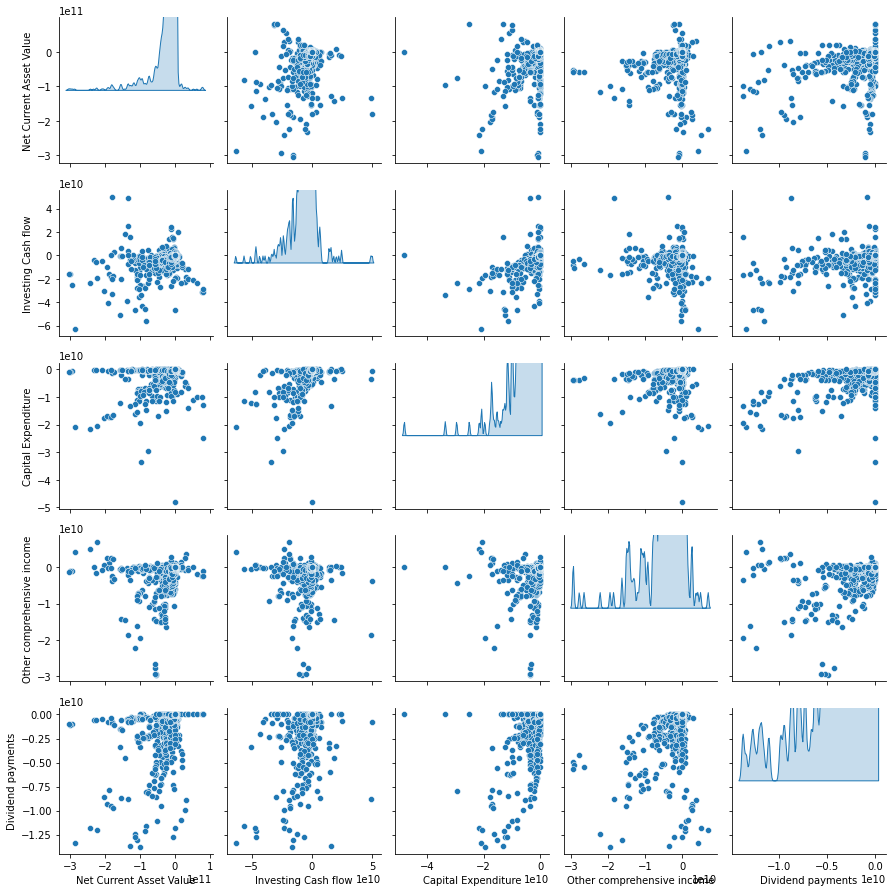

In [ ]:
# Plotting with lowest mean

plt.figure(figsize=(20,12))
sns.pairplot(df[bottom_mean],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

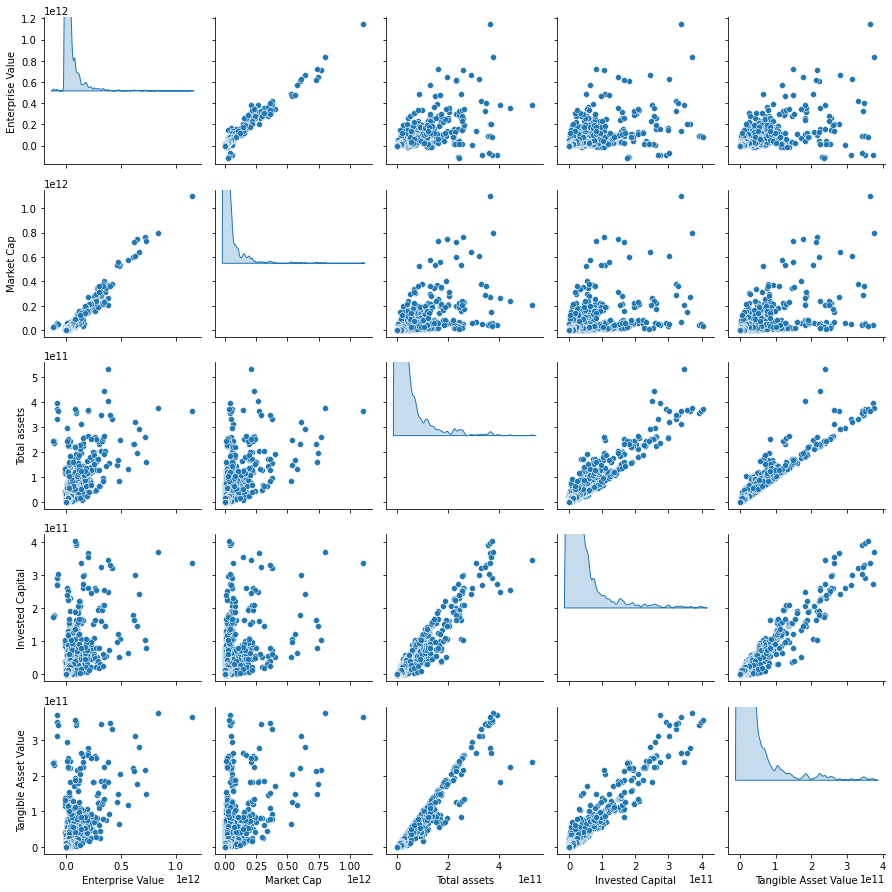

In [ ]:
# Plotting cols with highest SD

plt.figure(figsize=(20,12))
sns.pairplot(df[top_std],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

[]

<Figure size 1440x864 with 0 Axes>

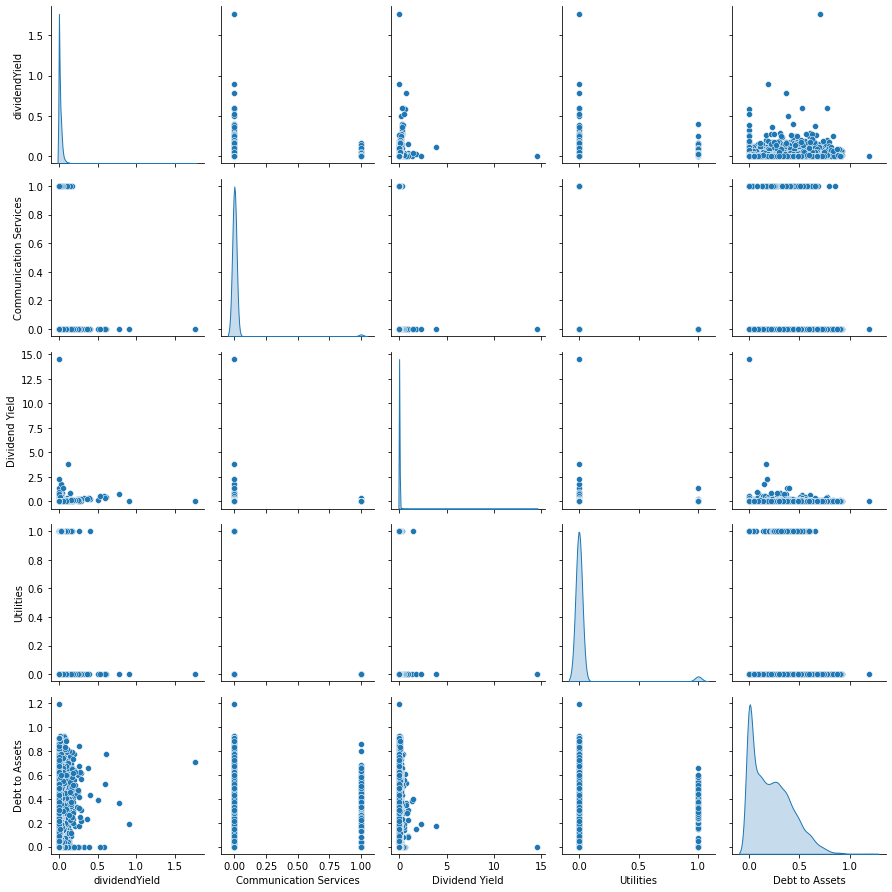

In [ ]:
# Plotting cols with lowest SD

plt.figure(figsize=(20,12))
sns.pairplot(df[bottom_std],diag_kind='kde')
sns.despine()
plt.tight_layout()


plt.plot()

In [ ]:
top_mean

['Enterprise Value',
 'Market Cap',
 'Total assets',
 'Invested Capital',
 'Tangible Asset Value']

[]

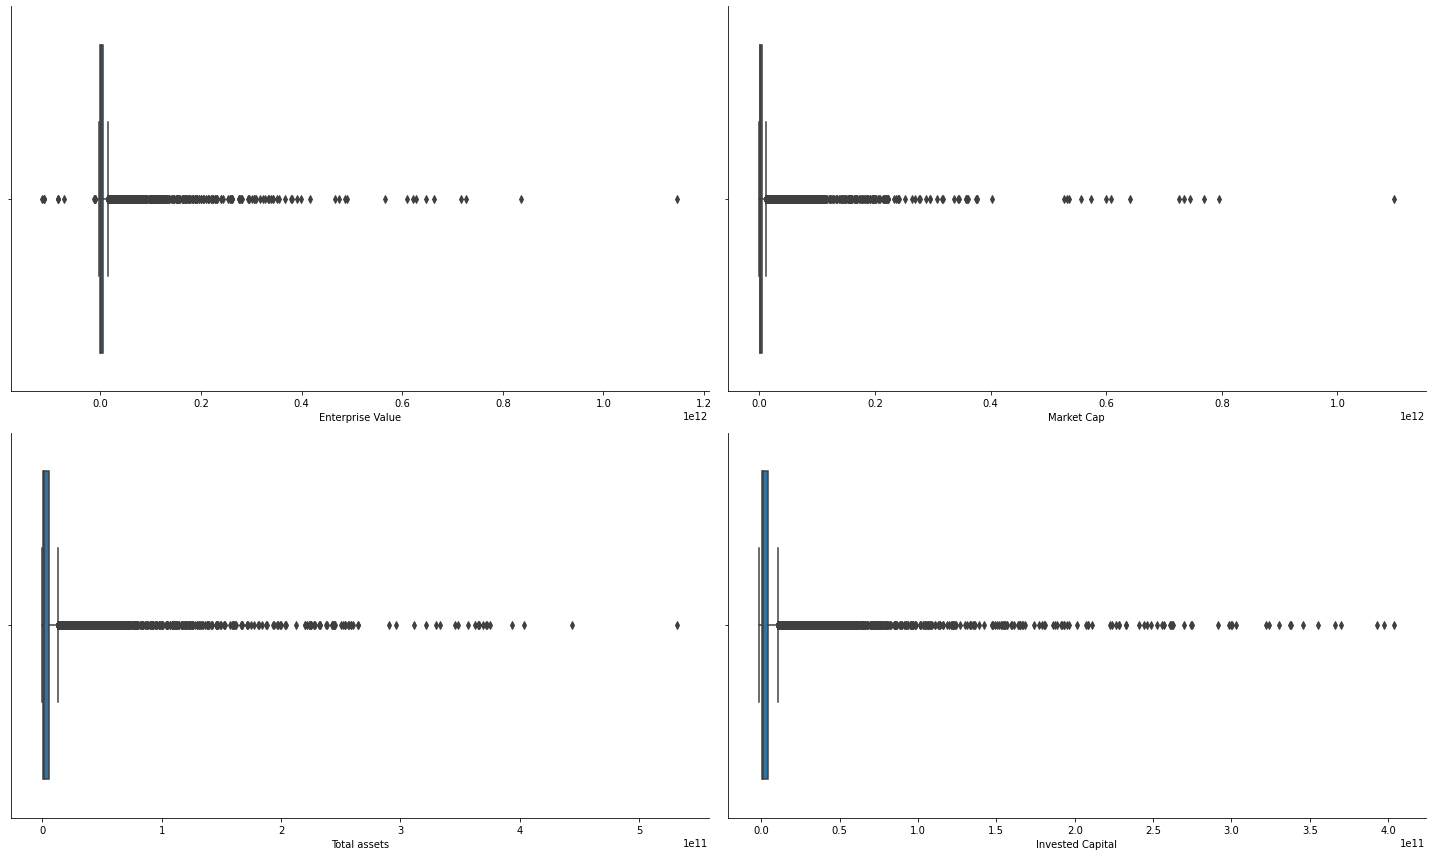

In [ ]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[top_mean[0]], data=df, ax=ax0)
sns.boxplot(df[top_mean[1]], data=df, ax=ax1)
sns.boxplot(df[top_mean[2]], data=df, ax=ax2)
sns.boxplot(df[top_mean[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

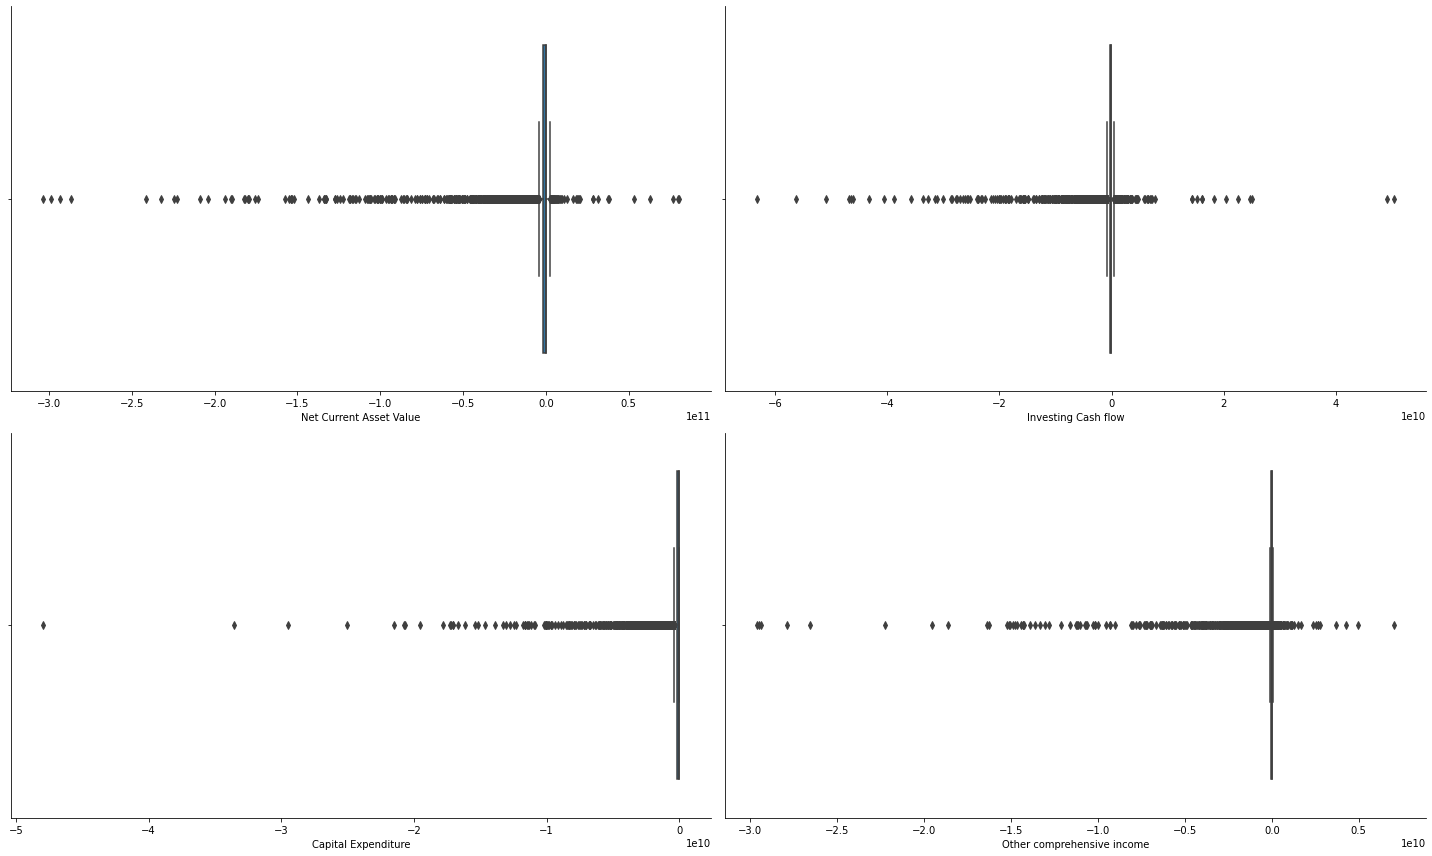

In [ ]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[bottom_mean[0]], data=df, ax=ax0)
sns.boxplot(df[bottom_mean[1]], data=df, ax=ax1)
sns.boxplot(df[bottom_mean[2]], data=df, ax=ax2)
sns.boxplot(df[bottom_mean[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

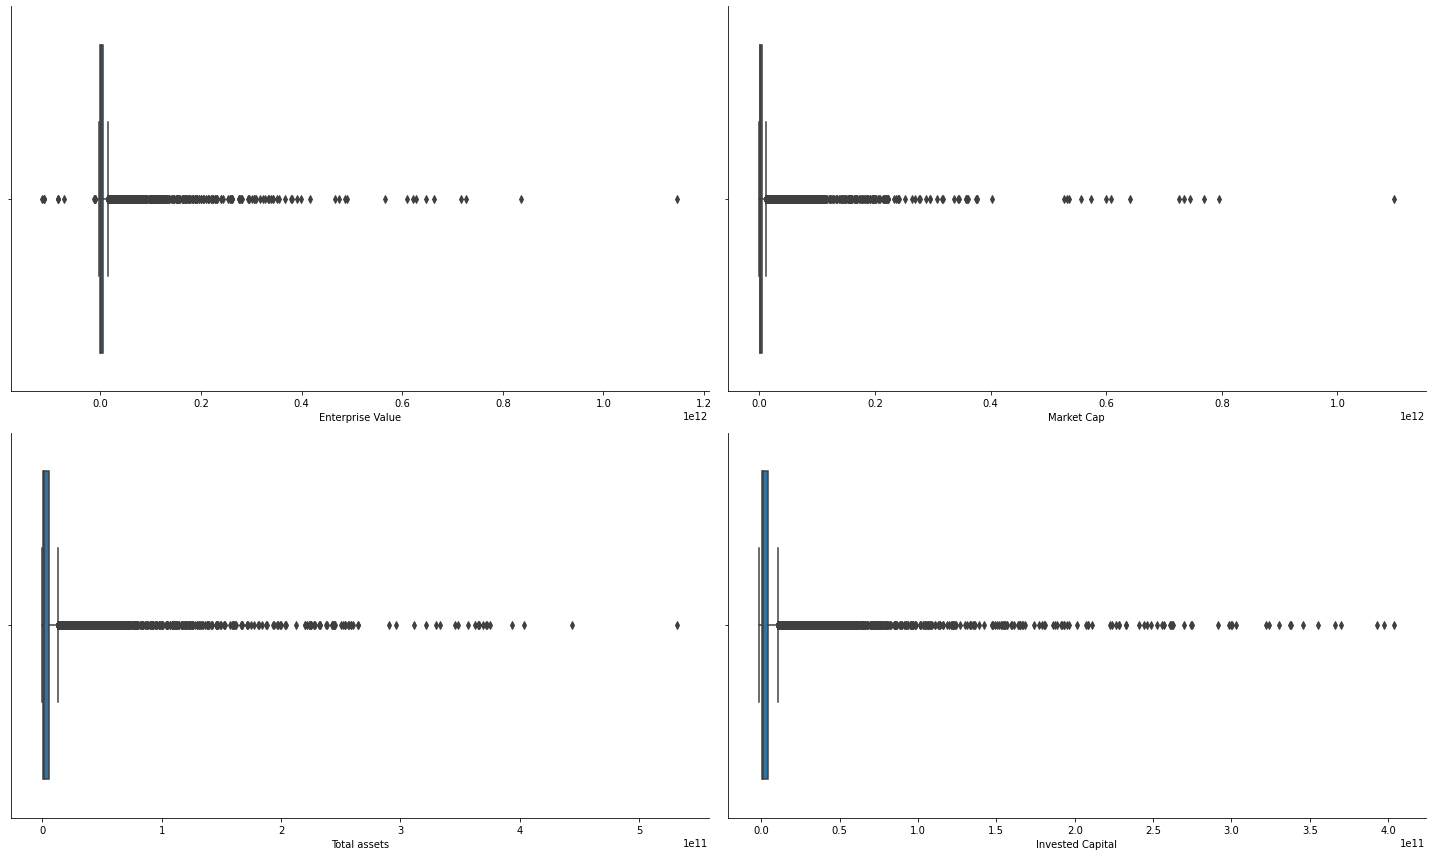

In [ ]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[top_std[0]], data=df, ax=ax0)
sns.boxplot(df[top_std[1]], data=df, ax=ax1)
sns.boxplot(df[top_std[2]], data=df, ax=ax2)
sns.boxplot(df[top_std[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

[]

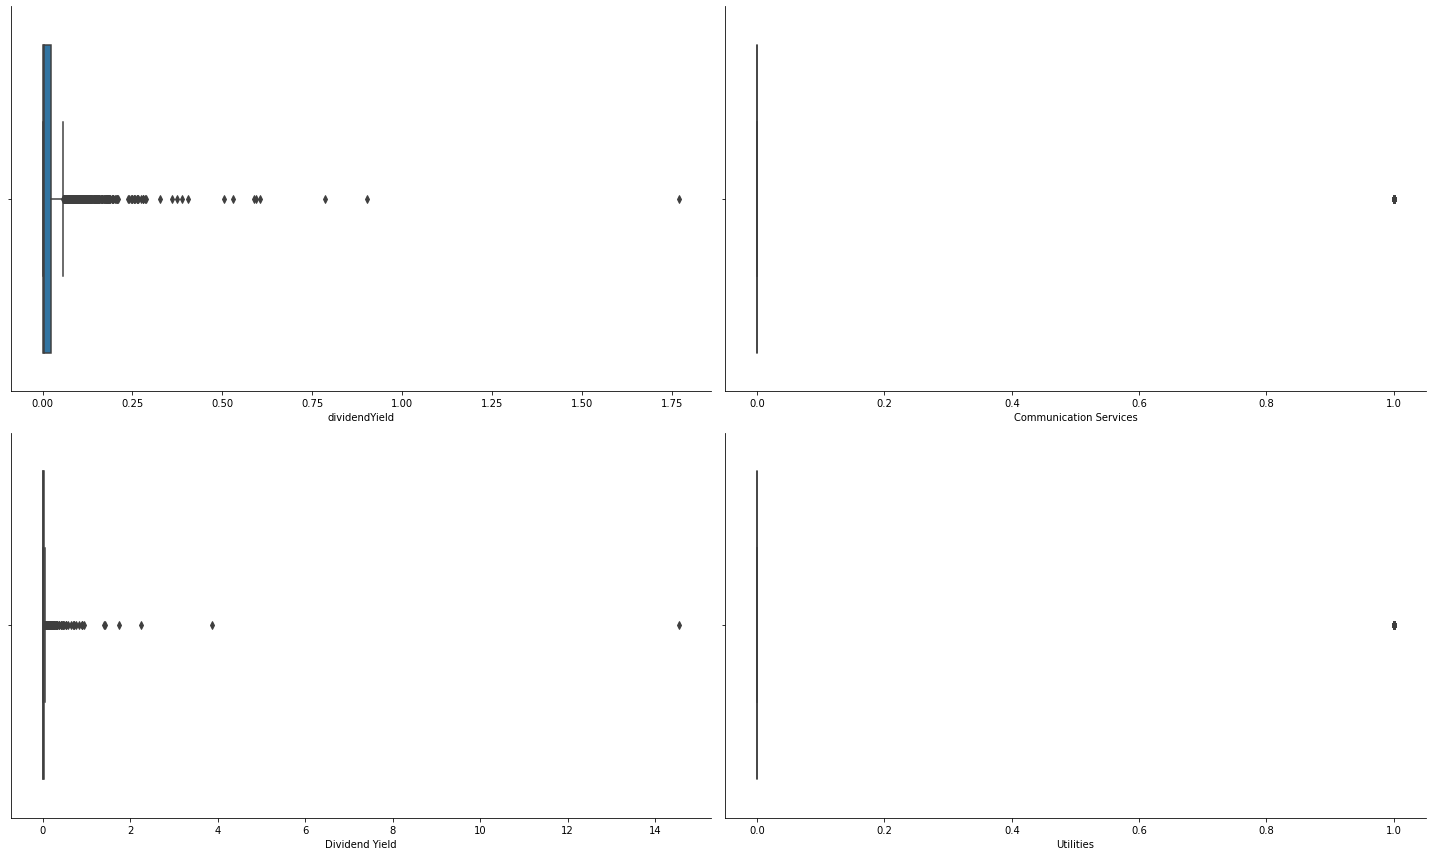

In [ ]:
fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[bottom_std[0]], data=df, ax=ax0)
sns.boxplot(df[bottom_std[1]], data=df, ax=ax1)
sns.boxplot(df[bottom_std[2]], data=df, ax=ax2)
sns.boxplot(df[bottom_std[3]], data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

In [ ]:
df.corr()['Class'].sort_values(ascending=False).head(20)

Class                            1.00
Utilities                        0.07
Total assets                     0.06
Enterprise Value                 0.06
longtermDebtToCapitalization     0.06
Total liabilities                0.06
Market Cap                       0.06
Gross Profit                     0.06
Tangible Asset Value             0.06
Weighted Average Shs Out (Dil)   0.06
Weighted Average Shs Out         0.06
Total debt                       0.05
Total shareholders equity        0.05
Operating Cash Flow              0.05
Intangibles to Total Assets      0.05
Invested Capital                 0.05
EBITDA                           0.05
EBIT                             0.05
Total current assets             0.05
Operating Income                 0.05
Name: Class, dtype: float64

In [ ]:
df.corr()['Class'].sort_values(ascending=False).tail(20)

priceSalesRatio                          -0.03
Price to Sales Ratio                     -0.03
priceToSalesRatio                        -0.03
Other comprehensive income               -0.03
Weighted Average Shares Growth           -0.03
Stock-based compensation to Revenue      -0.04
Graham Net-Net                           -0.04
Issuance (buybacks) of shares            -0.04
cashRatio                                -0.04
Asset Growth                             -0.04
Acquisitions and disposals               -0.04
Weighted Average Shares Diluted Growth   -0.04
currentRatio                             -0.04
Capital Expenditure                      -0.04
Investing Cash flow                      -0.05
Net Current Asset Value                  -0.05
Dividend payments                        -0.05
SG&A Expenses Growth                     -0.06
Healthcare                               -0.06
Energy                                   -0.08
Name: Class, dtype: float64

In [ ]:
list(df.corr()['Class'].sort_values(ascending=False).index[1:5])

['Utilities',
 'Total assets',
 'Enterprise Value',
 'longtermDebtToCapitalization']

[]

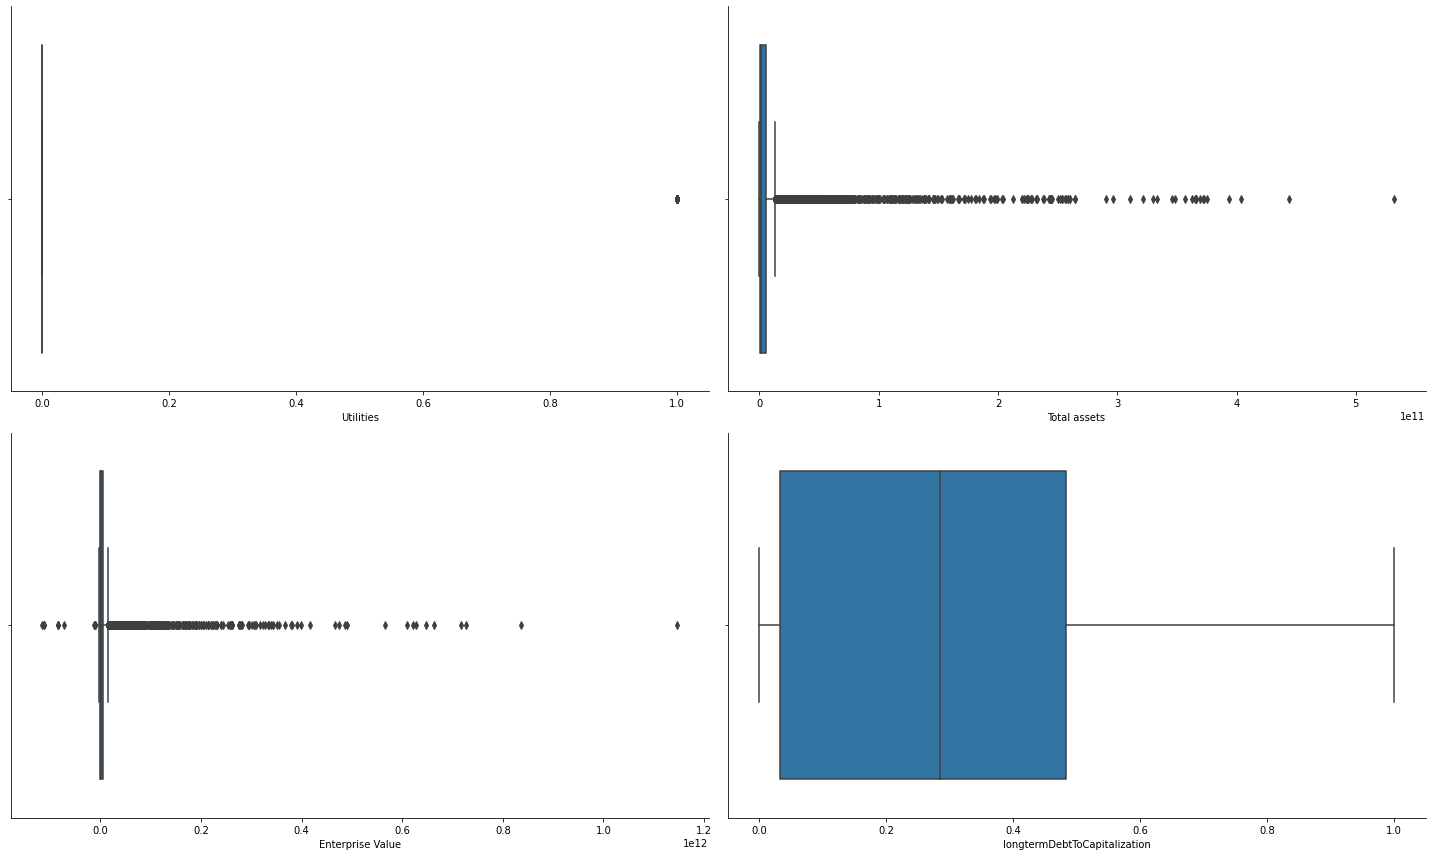

In [ ]:
hig_pos_corr = list(df.corr()['Class'].sort_values(ascending=False).index[1:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[hig_pos_corr[0]], hue="Class", data=df, ax=ax0)
sns.boxplot(df[hig_pos_corr[1]], hue="Class", data=df, ax=ax1)
sns.boxplot(df[hig_pos_corr[2]], hue="Class", data=df, ax=ax2)
sns.boxplot(df[hig_pos_corr[3]], hue="Class", data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

In [ ]:
hig_neg_corr = list(df.corr()['Class'].sort_values(ascending=True).index[0:7])

In [ ]:
hig_neg_corr

['Energy',
 'Healthcare',
 'SG&A Expenses Growth',
 'Dividend payments',
 'Net Current Asset Value',
 'Investing Cash flow',
 'Capital Expenditure']

In [ ]:
hig_neg_corr.remove('Energy')

In [ ]:
hig_neg_corr.remove('Healthcare')

[]

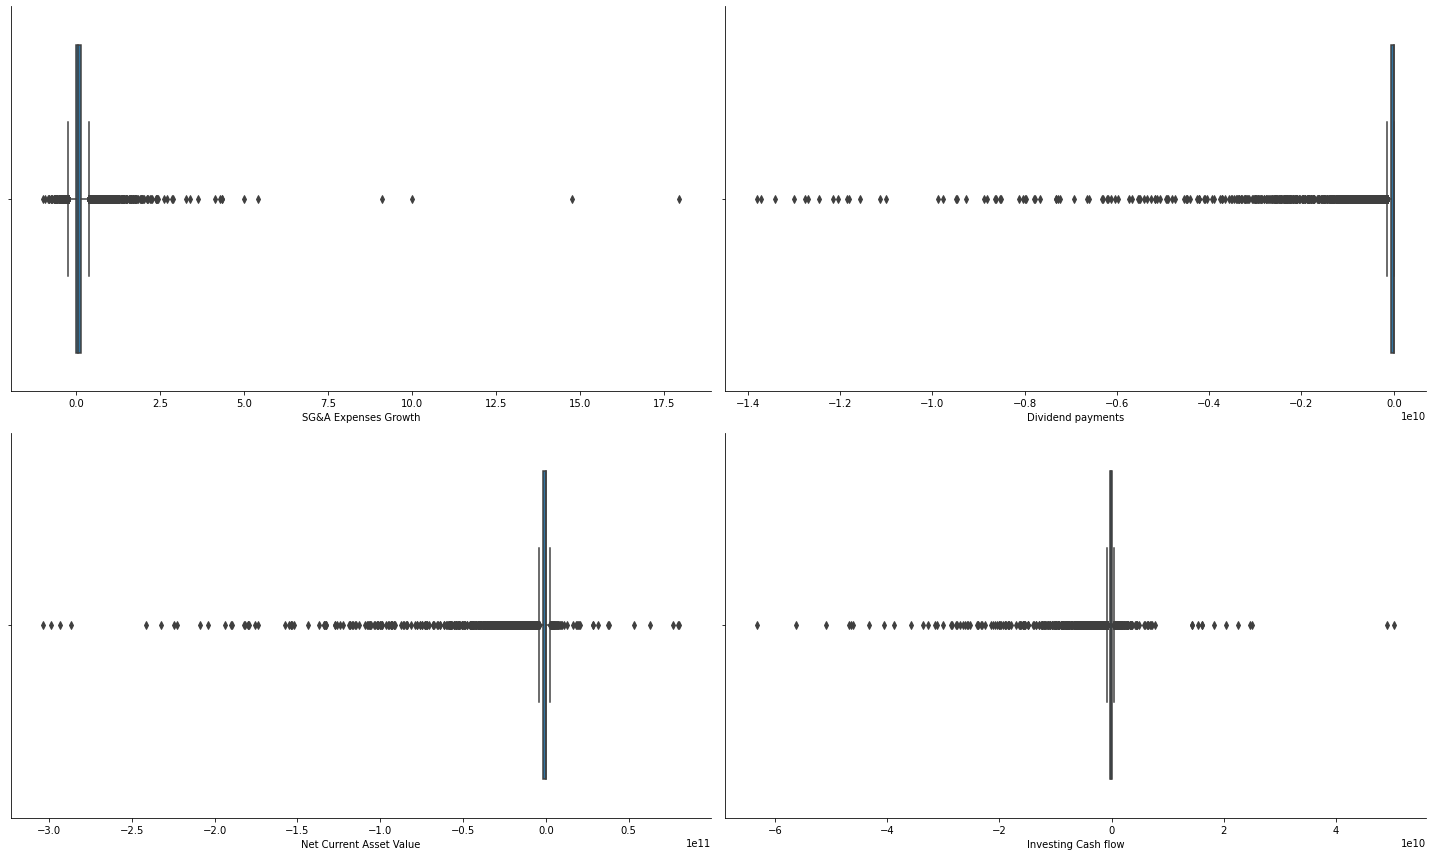

In [ ]:
# hig_neg_corr = list(df.corr()['Class'].sort_values(ascending=True).index[0:5])

fig = plt.figure(figsize=(20,12))

ax0=fig.add_subplot(2,2,1)
ax1=fig.add_subplot(2,2,2)
ax2=fig.add_subplot(2,2,3)
ax3=fig.add_subplot(2,2,4)

sns.boxplot(df[hig_neg_corr[0]], hue="Class", data=df, ax=ax0)
sns.boxplot(df[hig_neg_corr[1]], hue="Class", data=df, ax=ax1)
sns.boxplot(df[hig_neg_corr[2]], hue="Class", data=df, ax=ax2)
sns.boxplot(df[hig_neg_corr[3]], hue="Class", data=df, ax=ax3)

sns.despine()
plt.tight_layout()
plt.plot()

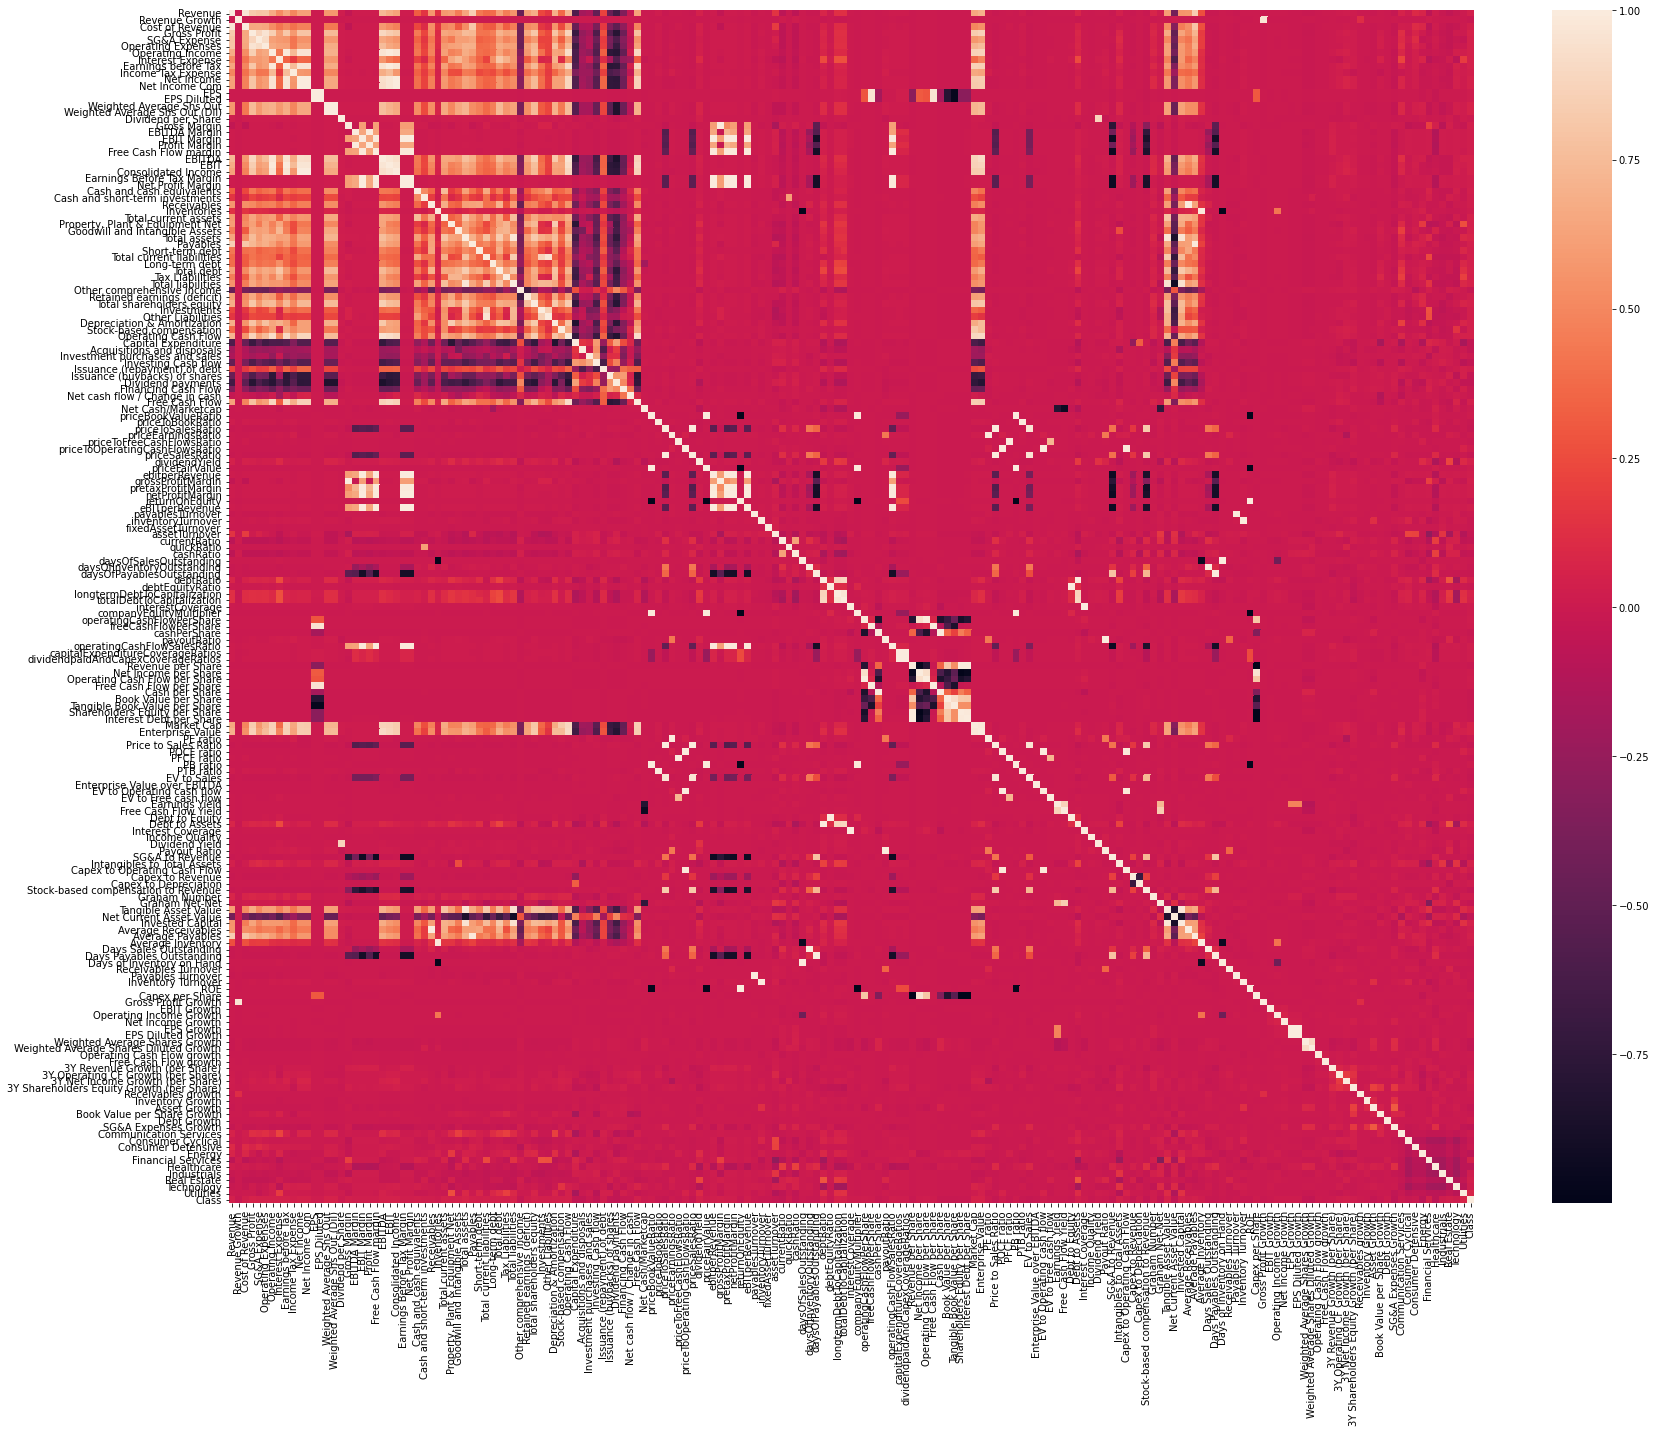

In [ ]:
# Plotting the co-relation matrix for the data frame.
plt.figure(figsize = (25, 20))

ax=sns.heatmap(df.corr(),xticklabels=True, yticklabels=True)

# sns.despine()
plt.tight_layout()

plt.show()


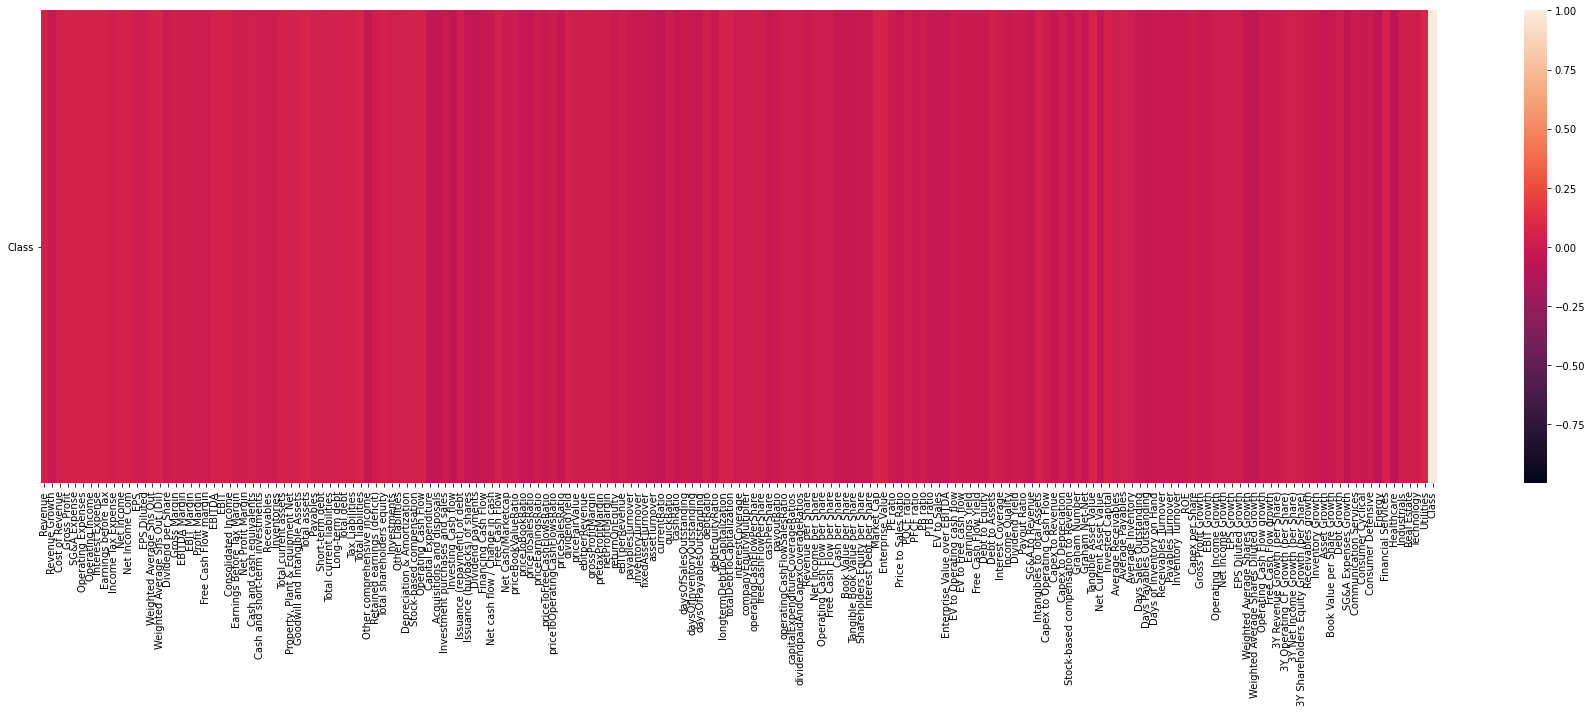

In [ ]:

# Plotting the co-relation matrix for the data frame.
plt.figure(figsize = (25, 10))

ax=sns.heatmap(df.corr().iloc[::-1],xticklabels=True, yticklabels=True)
ax.set_ylim(1,0)
# ax.set_xlim(5,0)
# sns.despine()
plt.tight_layout()

plt.show()


In [ ]:
sector_list.remove("Basic Materials")

In [ ]:
df[sector_list]

Consumer Defensive  Healthcare  ...  Utilities  Technology
3                       1           0  ...          0           0
4                       1           0  ...          0           0
11                      1           0  ...          0           0
12                      1           0  ...          0           0
13                      1           0  ...          0           0
...                   ...         ...  ...        ...         ...
18678                   0           0  ...          0           0
18682                   0           0  ...          0           0
18691                   0           0  ...          0           1
18693                   0           0  ...          0           1
18695                   0           0  ...          0           1

[9358 rows x 10 columns]

In [ ]:
len(sector_list)

10

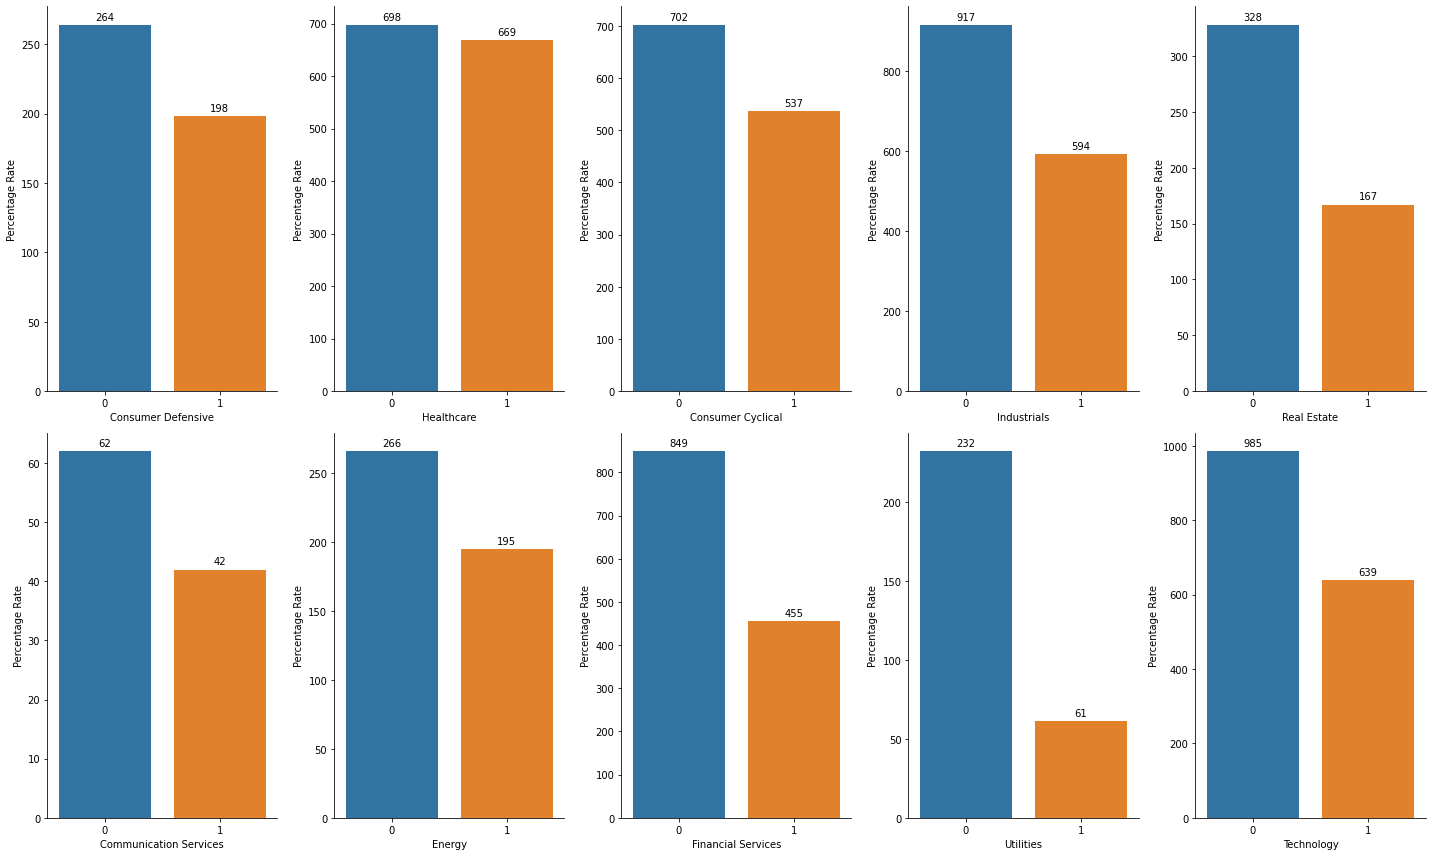

In [ ]:
# Univariate Plot Analysis of Ordered categorical variables vs Percentage Rate
counter = 1

plt.figure(figsize=(20, 12))
for col_list in sector_list:
    df1 = df.loc[df[col_list]==1]
    series = round(((df[col_list].value_counts()) / (len(df[col_list])) * 100),
                   2)
    meraY = df.loc[df[col_list]==1].Class.value_counts().values

    plt.subplot(2, 5, counter)
    ax = sns.barplot(x=series.index,
                     y=meraY,
                     order=series.sort_index().index)
    plt.xlabel(col_list)
    plt.ylabel('Total Companies')

    annotate_graph(ax)
    counter += 1

sns.despine()
plt.tight_layout()
plt.show()

# Outlier Treatment

In [ ]:
df.head()

Revenue  Revenue Growth  ...  Utilities  Class
3   65058000000.00           -0.00  ...          0      1
4   66832000000.00            0.03  ...          0      1
11 108465000000.00            0.10  ...          0      0
12 109830000000.00            0.01  ...          0      0
13 115337000000.00            0.05  ...          0      0

[5 rows x 181 columns]

## Method 1 Standard Deviation Method

Three standard deviations from the mean is a common cut-off in practice for identifying outliers in a Gaussian or Gaussian-like distribution. For smaller samples of data, perhaps a value of 2 standard deviations (95%) can be used, and for larger samples, perhaps a value of 4 standard deviations (99.9%) can be used.

In [ ]:
df.shape

(9358, 181)

In [ ]:
# Extracting numerical columns from the telecom_df data frame.
numerical_cols = df.select_dtypes(include = np.number).columns.to_list()

In [ ]:
# calculate summary statistics
data = df[numerical_cols]
data_mean, data_std = np.mean(data), np.std(data)
# identify outliers
cut_off = data_std * 2.5
lower, upper = data_mean - cut_off, data_mean + cut_off
# identify outliers
outliers = df[((df < lower) | (df > upper)).any(axis=1)]
print('Number of identified outliers: %d' % len(outliers))

Number of identified outliers: 4779


In [ ]:
# remove outliers
outliers_removed = df[~((df < lower) | (df > upper)).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 4579


## Method 2 IQR method

The IQR can be used to identify outliers by defining limits on the sample values that are a factor k of the IQR below the 25th percentile or above the 75th percentile. The common value for the factor k is the value 1.5.

In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Revenue           2627103000.00
Revenue Growth             0.17
Cost of Revenue   1441255942.25
Gross Profit       949433500.00
SG&A Expense       406105250.00
                       ...     
Industrials                0.00
Real Estate                0.00
Technology                 0.00
Utilities                  0.00
Class                      1.00
Length: 181, dtype: float64


In [ ]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 9


## Method 3:  99-1 percentile method

In [ ]:
Q1 = df.quantile(0.01)
Q3 = df.quantile(0.99)
IQR = Q3 - Q1
print(IQR)

Revenue           93751487860.00
Revenue Growth              3.95
Cost of Revenue   63648790000.00
Gross Profit      30454464510.86
SG&A Expense      14404670000.00
                       ...      
Industrials                 1.00
Real Estate                 1.00
Technology                  1.00
Utilities                   1.00
Class                       1.00
Length: 181, dtype: float64


In [ ]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 7870


In [ ]:
### We choose 99-1 percentile method for outlier treatment
df_99_1 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_99_1.shape

(7870, 181)

## Method 4:  95-5 percentile method

In [ ]:
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)
IQR = Q3 - Q1

In [ ]:
outliers_removed_IQR = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print('Non-outlier observations: %d' % len(outliers_removed_IQR))

Non-outlier observations: 3933


In [ ]:
### We choose 95-5 percentile method for outlier treatment
df_95_5 = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
df_95_5.shape

(3933, 181)

# Observation

- Percentile method leads to poor performance later.

- Forced to go with 2.5 times the STD method after trial and error even though we are losing out on a lot of data

In [ ]:
df = outliers_removed

In [ ]:
df.reset_index(inplace=True)


In [ ]:
df.drop(['index'], axis=1, inplace=True)

In [ ]:
from sklearn.ensemble import IsolationForest


clf = IsolationForest()
preds = clf.fit_predict(df)

In [ ]:
len(preds)

4579

In [ ]:
len(df)

4579

In [ ]:
for i in range(0,len(preds)):
    if preds[i]==-1:
        df.drop(i, axis=0, inplace=True)

In [ ]:
len(df)

4477

### Observation

- Isolation Forest Outlier Detection method further removed 4 data points

# Lazy Classification Package

In [ ]:
X = df.drop(['Class'], axis = 1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3581, 180)
(3581, 1)
(896, 180)
(896, 1)


In [ ]:
clf = LazyClassifier(verbose=1000,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:03<01:46,  3.81s/it]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6261160714285714, 'Balanced Accuracy': 0.5976638229380397, 'ROC AUC': 0.5976638229380397, 'F1 Score': 0.616409664689604, 'Time taken': 3.8096060752868652}


  7%|▋         | 2/29 [00:08<01:57,  4.36s/it]

{'Model': 'BaggingClassifier', 'Accuracy': 0.5680803571428571, 'Balanced Accuracy': 0.5601091210153089, 'ROC AUC': 0.5601091210153089, 'F1 Score': 0.570135639216096, 'Time taken': 4.748124122619629}
{'Model': 'BernoulliNB', 'Accuracy': 0.5636160714285714, 'Balanced Accuracy': 0.5518453381877273, 'ROC AUC': 0.5518453381877273, 'F1 Score': 0.5645193311439861, 'Time taken': 0.07619690895080566}


 14%|█▍        | 4/29 [00:15<01:38,  3.92s/it]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.6026785714285714, 'Balanced Accuracy': 0.5306150784467997, 'ROC AUC': 0.5306150784467997, 'F1 Score': 0.5157109815021232, 'Time taken': 7.246330261230469}


 28%|██▊       | 8/29 [00:16<00:28,  1.38s/it]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.5881696428571429, 'Balanced Accuracy': 0.5771869198767889, 'ROC AUC': 0.5771869198767889, 'F1 Score': 0.5890220797752709, 'Time taken': 0.7790288925170898}
{'Model': 'DummyClassifier', 'Accuracy': 0.5044642857142857, 'Balanced Accuracy': 0.48612332423134474, 'ROC AUC': 0.48612332423134474, 'F1 Score': 0.5031580808326928, 'Time taken': 0.06398415565490723}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.5368303571428571, 'Balanced Accuracy': 0.5262312110787142, 'ROC AUC': 0.5262312110787142, 'F1 Score': 0.5385299224272088, 'Time taken': 0.06000208854675293}


 31%|███       | 9/29 [00:18<00:26,  1.33s/it]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.578125, 'Balanced Accuracy': 0.5495544139502115, 'ROC AUC': 0.5495544139502115, 'F1 Score': 0.5684550035247372, 'Time taken': 1.1556613445281982}
{'Model': 'GaussianNB', 'Accuracy': 0.5970982142857143, 'Balanced Accuracy': 0.5234337637494022, 'ROC AUC': 0.5234337637494022, 'F1 Score': 0.504410053654977, 'Time taken': 0.06153559684753418}


 38%|███▊      | 11/29 [00:19<00:18,  1.06s/it]

{'Model': 'KNeighborsClassifier', 'Accuracy': 0.5424107142857143, 'Balanced Accuracy': 0.5163501540138742, 'ROC AUC': 0.5163501540138742, 'F1 Score': 0.5351668501870116, 'Time taken': 1.1858222484588623}


 41%|████▏     | 12/29 [00:20<00:16,  1.00it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.5044642857142857, 'Balanced Accuracy': 0.5182168330222202, 'ROC AUC': 0.5182168330222201, 'F1 Score': 0.5055458963490513, 'Time taken': 0.7811257839202881}


 45%|████▍     | 13/29 [00:21<00:16,  1.02s/it]

{'Model': 'LabelSpreading', 'Accuracy': 0.5044642857142857, 'Balanced Accuracy': 0.5182168330222202, 'ROC AUC': 0.5182168330222201, 'F1 Score': 0.5055458963490513, 'Time taken': 1.076141119003296}


 48%|████▊     | 14/29 [00:21<00:12,  1.21it/s]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.6216517857142857, 'Balanced Accuracy': 0.57518139697526, 'ROC AUC': 0.5751813969752602, 'F1 Score': 0.5916057331711696, 'Time taken': 0.27319860458374023}


 52%|█████▏    | 15/29 [00:23<00:15,  1.12s/it]

{'Model': 'LinearSVC', 'Accuracy': 0.6294642857142857, 'Balanced Accuracy': 0.588728961293408, 'ROC AUC': 0.5887289612934079, 'F1 Score': 0.6073199715735097, 'Time taken': 1.9158177375793457}


 55%|█████▌    | 16/29 [00:23<00:11,  1.13it/s]

{'Model': 'LogisticRegression', 'Accuracy': 0.6060267857142857, 'Balanced Accuracy': 0.5582424420069627, 'ROC AUC': 0.5582424420069627, 'F1 Score': 0.5734845203578975, 'Time taken': 0.2533693313598633}
{'Model': 'NearestCentroid', 'Accuracy': 0.5200892857142857, 'Balanced Accuracy': 0.5335308002036376, 'ROC AUC': 0.5335308002036376, 'F1 Score': 0.5214478846263385, 'Time taken': 0.0772392749786377}


 69%|██████▉   | 20/29 [00:28<00:09,  1.01s/it]

{'Model': 'NuSVC', 'Accuracy': 0.6004464285714286, 'Balanced Accuracy': 0.5685297460185228, 'ROC AUC': 0.5685297460185228, 'F1 Score': 0.5876444924470319, 'Time taken': 4.864624738693237}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.5546875, 'Balanced Accuracy': 0.5328802908522443, 'ROC AUC': 0.5328802908522443, 'F1 Score': 0.5504864441723295, 'Time taken': 0.08736920356750488}
{'Model': 'Perceptron', 'Accuracy': 0.5424107142857143, 'Balanced Accuracy': 0.5374749952433111, 'ROC AUC': 0.5374749952433111, 'F1 Score': 0.5454662632167736, 'Time taken': 0.08452153205871582}


 72%|███████▏  | 21/29 [00:28<00:06,  1.21it/s]

{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.5837053571428571, 'Balanced Accuracy': 0.5169235278690548, 'ROC AUC': 0.5169235278690547, 'F1 Score': 0.5100237174656458, 'Time taken': 0.1726076602935791}


 76%|███████▌  | 22/29 [00:32<00:10,  1.46s/it]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.6171875, 'Balanced Accuracy': 0.5847924798033559, 'ROC AUC': 0.5847924798033559, 'F1 Score': 0.6039677189328513, 'Time taken': 3.504248857498169}
{'Model': 'RidgeClassifier', 'Accuracy': 0.6138392857142857, 'Balanced Accuracy': 0.5652900551775917, 'ROC AUC': 0.5652900551775917, 'F1 Score': 0.5803636653525047, 'Time taken': 0.09427022933959961}


 83%|████████▎ | 24/29 [00:32<00:04,  1.08it/s]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.6149553571428571, 'Balanced Accuracy': 0.5638013401006875, 'ROC AUC': 0.5638013401006876, 'F1 Score': 0.5772664797345559, 'Time taken': 0.19333100318908691}


 86%|████████▌ | 25/29 [00:32<00:03,  1.29it/s]

{'Model': 'SGDClassifier', 'Accuracy': 0.578125, 'Balanced Accuracy': 0.5556481181510107, 'ROC AUC': 0.5556481181510107, 'F1 Score': 0.5732043097746492, 'Time taken': 0.23470020294189453}


 90%|████████▉ | 26/29 [00:37<00:05,  1.70s/it]

{'Model': 'SVC', 'Accuracy': 0.6071428571428571, 'Balanced Accuracy': 0.5445663185284604, 'ROC AUC': 0.5445663185284604, 'F1 Score': 0.5460989010989011, 'Time taken': 4.578680038452148}


 97%|█████████▋| 28/29 [00:44<00:02,  2.36s/it]

{'Model': 'XGBClassifier', 'Accuracy': 0.5993303571428571, 'Balanced Accuracy': 0.5744871775093463, 'ROC AUC': 0.5744871775093463, 'F1 Score': 0.5925424913692378, 'Time taken': 6.613253116607666}


100%|██████████| 29/29 [00:47<00:00,  1.62s/it]

{'Model': 'LGBMClassifier', 'Accuracy': 0.6294642857142857, 'Balanced Accuracy': 0.6013226166417261, 'ROC AUC': 0.6013226166417261, 'F1 Score': 0.6200093611124513, 'Time taken': 2.929286003112793}


In [ ]:
models.sort_values(by=["Accuracy", "F1 Score"], ascending=False)

Accuracy  ...  Time Taken
Model                                    ...            
LGBMClassifier                     0.63  ...        2.93
LinearSVC                          0.63  ...        1.92
AdaBoostClassifier                 0.63  ...        3.81
LinearDiscriminantAnalysis         0.62  ...        0.27
RandomForestClassifier             0.62  ...        3.50
RidgeClassifierCV                  0.61  ...        0.19
RidgeClassifier                    0.61  ...        0.09
SVC                                0.61  ...        4.58
LogisticRegression                 0.61  ...        0.25
CalibratedClassifierCV             0.60  ...        7.25
NuSVC                              0.60  ...        4.86
XGBClassifier                      0.60  ...        6.61
GaussianNB                         0.60  ...        0.06
DecisionTreeClassifier             0.59  ...        0.78
QuadraticDiscriminantAnalysis      0.58  ...        0.17
SGDClassifier                      0.58  ...        0.23
ExtraTreesClassifier               0.58  ...        1.16
BaggingClassifier                  0.57  ...        4.75
BernoulliNB                        0.56  ...        0.08
PassiveAggressiveClassifier        0.55  ...        0.09
Perceptron                         0.54  ...        0.08
KNeighborsClassifier               0.54  ...        1.19
ExtraTreeClassifier                0.54  ...        0.06
NearestCentroid                    0.52  ...        0.08
LabelSpreading                     0.50  ...        1.08
LabelPropagation                   0.50  ...        0.78
DummyClassifier                    0.50  ...        0.06

[27 rows x 5 columns]

## Technology Sector

In [ ]:
dfTech = df.loc[df.Technology==1]

X = dfTech.drop(['Class'], axis = 1)
y = dfTech[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)


clf = LazyClassifier(verbose=1000,ignore_warnings=True, custom_metric=None)


In [ ]:
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:00<00:27,  1.03it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.5708333333333333, 'Balanced Accuracy': 0.5216631726065688, 'ROC AUC': 0.5216631726065688, 'F1 Score': 0.5714728764684252, 'Time taken': 0.9667069911956787}


  7%|▋         | 2/29 [00:01<00:26,  1.03it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.49166666666666664, 'Balanced Accuracy': 0.4921965991148381, 'ROC AUC': 0.49219659911483804, 'F1 Score': 0.5054259562646912, 'Time taken': 0.9657094478607178}
{'Model': 'BernoulliNB', 'Accuracy': 0.5625, 'Balanced Accuracy': 0.5819939436291637, 'ROC AUC': 0.5819939436291638, 'F1 Score': 0.5737543918501387, 'Time taken': 0.03414273262023926}


 14%|█▍        | 4/29 [00:03<00:23,  1.07it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.6625, 'Balanced Accuracy': 0.5030281854181226, 'ROC AUC': 0.5030281854181226, 'F1 Score': 0.5354625049315651, 'Time taken': 1.8008270263671875}


 21%|██        | 6/29 [00:04<00:12,  1.82it/s]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.55, 'Balanced Accuracy': 0.5210808292569299, 'ROC AUC': 0.5210808292569299, 'F1 Score': 0.5583041892997991, 'Time taken': 0.19884777069091797}
{'Model': 'DummyClassifier', 'Accuracy': 0.5916666666666667, 'Balanced Accuracy': 0.5676682972280456, 'ROC AUC': 0.5676682972280456, 'F1 Score': 0.5992019495498176, 'Time taken': 0.028470754623413086}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.49166666666666664, 'Balanced Accuracy': 0.4528301886792453, 'ROC AUC': 0.45283018867924535, 'F1 Score': 0.5001794258373204, 'Time taken': 0.029822587966918945}


 38%|███▊      | 11/29 [00:04<00:04,  3.87it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.5375, 'Balanced Accuracy': 0.47833682739343114, 'ROC AUC': 0.47833682739343114, 'F1 Score': 0.5352980074061013, 'Time taken': 0.3680295944213867}
{'Model': 'GaussianNB', 'Accuracy': 0.6333333333333333, 'Balanced Accuracy': 0.4901001630561379, 'ROC AUC': 0.4901001630561379, 'F1 Score': 0.5388020833333333, 'Time taken': 0.03063035011291504}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.5375, 'Balanced Accuracy': 0.49044956906592124, 'ROC AUC': 0.49044956906592124, 'F1 Score': 0.5407295632377417, 'Time taken': 0.12220597267150879}


 45%|████▍     | 13/29 [00:04<00:03,  4.79it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.4708333333333333, 'Balanced Accuracy': 0.5006988120195668, 'ROC AUC': 0.5006988120195668, 'F1 Score': 0.4804082113381376, 'Time taken': 0.09927535057067871}
{'Model': 'LabelSpreading', 'Accuracy': 0.4708333333333333, 'Balanced Accuracy': 0.5006988120195668, 'ROC AUC': 0.5006988120195668, 'F1 Score': 0.4804082113381376, 'Time taken': 0.13198256492614746}


 48%|████▊     | 14/29 [00:04<00:02,  5.14it/s]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.6166666666666667, 'Balanced Accuracy': 0.5774516655019799, 'ROC AUC': 0.57745166550198, 'F1 Score': 0.6188435269741386, 'Time taken': 0.14624452590942383}


 55%|█████▌    | 16/29 [00:05<00:03,  4.32it/s]

{'Model': 'LinearSVC', 'Accuracy': 0.6041666666666666, 'Balanced Accuracy': 0.5559049615653389, 'ROC AUC': 0.5559049615653389, 'F1 Score': 0.6035577990225666, 'Time taken': 0.5081119537353516}
{'Model': 'LogisticRegression', 'Accuracy': 0.5833333333333334, 'Balanced Accuracy': 0.5371535057069647, 'ROC AUC': 0.5371535057069647, 'F1 Score': 0.5845554183389935, 'Time taken': 0.11175799369812012}
{'Model': 'NearestCentroid', 'Accuracy': 0.49583333333333335, 'Balanced Accuracy': 0.5559049615653389, 'ROC AUC': 0.5559049615653389, 'F1 Score': 0.4951418427403253, 'Time taken': 0.03922319412231445}


 72%|███████▏  | 21/29 [00:06<00:01,  7.03it/s]

{'Model': 'NuSVC', 'Accuracy': 0.5458333333333333, 'Balanced Accuracy': 0.4937106918238994, 'ROC AUC': 0.4937106918238994, 'F1 Score': 0.5465101314083335, 'Time taken': 0.3730323314666748}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.5583333333333333, 'Balanced Accuracy': 0.5092010249242953, 'ROC AUC': 0.5092010249242953, 'F1 Score': 0.5596287434393331, 'Time taken': 0.05213284492492676}
{'Model': 'Perceptron', 'Accuracy': 0.5708333333333333, 'Balanced Accuracy': 0.5216631726065688, 'ROC AUC': 0.5216631726065688, 'F1 Score': 0.5714728764684252, 'Time taken': 0.04179787635803223}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.5416666666666666, 'Balanced Accuracy': 0.5450733752620545, 'ROC AUC': 0.5450733752620546, 'F1 Score': 0.5541071428571428, 'Time taken': 0.07323122024536133}


 83%|████████▎ | 24/29 [00:07<00:00,  5.02it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.5625, 'Balanced Accuracy': 0.491148381085488, 'ROC AUC': 0.491148381085488, 'F1 Score': 0.552005819258298, 'Time taken': 0.8358476161956787}
{'Model': 'RidgeClassifier', 'Accuracy': 0.6041666666666666, 'Balanced Accuracy': 0.5649895178197064, 'ROC AUC': 0.5649895178197065, 'F1 Score': 0.6069307072755448, 'Time taken': 0.04413414001464844}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.5958333333333333, 'Balanced Accuracy': 0.5496156533892382, 'ROC AUC': 0.5496156533892382, 'F1 Score': 0.596435621528517, 'Time taken': 0.08107399940490723}
{'Model': 'SGDClassifier', 'Accuracy': 0.5416666666666666, 'Balanced Accuracy': 0.548101560680177, 'ROC AUC': 0.548101560680177, 'F1 Score': 0.5540725835173445, 'Time taken': 0.09572839736938477}


 90%|████████▉ | 26/29 [00:07<00:00,  4.78it/s]

{'Model': 'SVC', 'Accuracy': 0.6125, 'Balanced Accuracy': 0.495574190542744, 'ROC AUC': 0.49557419054274404, 'F1 Score': 0.5582638475282907, 'Time taken': 0.3618440628051758}


 97%|█████████▋| 28/29 [00:09<00:00,  2.53it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.5416666666666666, 'Balanced Accuracy': 0.49056603773584906, 'ROC AUC': 0.4905660377358491, 'F1 Score': 0.5430109601728929, 'Time taken': 1.5776193141937256}


100%|██████████| 29/29 [00:11<00:00,  2.53it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.5458333333333333, 'Balanced Accuracy': 0.5058234334963895, 'ROC AUC': 0.5058234334963895, 'F1 Score': 0.5511710100493953, 'Time taken': 2.2544496059417725}


In [ ]:
models.sort_values(by=["Accuracy", "F1 Score"], ascending=False)

Accuracy  ...  Time Taken
Model                                    ...            
CalibratedClassifierCV             0.66  ...        1.80
GaussianNB                         0.63  ...        0.03
LinearDiscriminantAnalysis         0.62  ...        0.15
SVC                                0.61  ...        0.36
RidgeClassifier                    0.60  ...        0.04
LinearSVC                          0.60  ...        0.51
RidgeClassifierCV                  0.60  ...        0.08
DummyClassifier                    0.59  ...        0.03
LogisticRegression                 0.58  ...        0.11
Perceptron                         0.57  ...        0.04
AdaBoostClassifier                 0.57  ...        0.97
BernoulliNB                        0.56  ...        0.03
RandomForestClassifier             0.56  ...        0.84
PassiveAggressiveClassifier        0.56  ...        0.05
DecisionTreeClassifier             0.55  ...        0.20
LGBMClassifier                     0.55  ...        2.25
NuSVC                              0.55  ...        0.37
QuadraticDiscriminantAnalysis      0.54  ...        0.07
SGDClassifier                      0.54  ...        0.10
XGBClassifier                      0.54  ...        1.58
KNeighborsClassifier               0.54  ...        0.12
ExtraTreesClassifier               0.54  ...        0.37
NearestCentroid                    0.50  ...        0.04
BaggingClassifier                  0.49  ...        0.97
ExtraTreeClassifier                0.49  ...        0.03
LabelSpreading                     0.47  ...        0.13
LabelPropagation                   0.47  ...        0.10

[27 rows x 5 columns]

## Industrial Sector

In [ ]:
dfIndustrials = df.loc[df.Industrials==1]
X = dfIndustrials.drop(['Class'], axis = 1)
y = dfIndustrials[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)


In [ ]:
clf = LazyClassifier(verbose=1000,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:00<00:27,  1.03it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.5964125560538116, 'Balanced Accuracy': 0.5586538461538462, 'ROC AUC': 0.5586538461538462, 'F1 Score': 0.5952595504342397, 'Time taken': 0.9727535247802734}


  7%|▋         | 2/29 [00:01<00:23,  1.14it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.5515695067264574, 'Balanced Accuracy': 0.5319493006993007, 'ROC AUC': 0.5319493006993007, 'F1 Score': 0.5580693232914009, 'Time taken': 0.8125045299530029}
{'Model': 'BernoulliNB', 'Accuracy': 0.48878923766816146, 'Balanced Accuracy': 0.5050262237762237, 'ROC AUC': 0.5050262237762237, 'F1 Score': 0.4974461044099662, 'Time taken': 0.040381431579589844}


 14%|█▍        | 4/29 [00:03<00:21,  1.17it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.6367713004484304, 'Balanced Accuracy': 0.5130244755244755, 'ROC AUC': 0.5130244755244755, 'F1 Score': 0.540401567191427, 'Time taken': 1.6439728736877441}


 21%|██        | 6/29 [00:03<00:11,  1.99it/s]

{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.5246636771300448, 'Balanced Accuracy': 0.4972027972027972, 'ROC AUC': 0.49720279720279725, 'F1 Score': 0.530032991945072, 'Time taken': 0.17363381385803223}
{'Model': 'DummyClassifier', 'Accuracy': 0.47533632286995514, 'Balanced Accuracy': 0.4422202797202798, 'ROC AUC': 0.4422202797202798, 'F1 Score': 0.4807832403306007, 'Time taken': 0.027704477310180664}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.5336322869955157, 'Balanced Accuracy': 0.5014423076923077, 'ROC AUC': 0.5014423076923077, 'F1 Score': 0.5370638222331993, 'Time taken': 0.02934551239013672}


 38%|███▊      | 11/29 [00:04<00:04,  4.19it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.5695067264573991, 'Balanced Accuracy': 0.5018793706293706, 'ROC AUC': 0.5018793706293706, 'F1 Score': 0.5505668050023674, 'Time taken': 0.3452582359313965}
{'Model': 'GaussianNB', 'Accuracy': 0.57847533632287, 'Balanced Accuracy': 0.5666958041958042, 'ROC AUC': 0.5666958041958041, 'F1 Score': 0.5856327021114511, 'Time taken': 0.033750057220458984}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.5829596412556054, 'Balanced Accuracy': 0.5096153846153846, 'ROC AUC': 0.5096153846153846, 'F1 Score': 0.5586158407379643, 'Time taken': 0.11279821395874023}


 45%|████▍     | 13/29 [00:04<00:03,  5.13it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.4798206278026906, 'Balanced Accuracy': 0.49803321678321677, 'ROC AUC': 0.49803321678321677, 'F1 Score': 0.4880483840538697, 'Time taken': 0.09333348274230957}
{'Model': 'LabelSpreading', 'Accuracy': 0.4798206278026906, 'Balanced Accuracy': 0.49803321678321677, 'ROC AUC': 0.49803321678321677, 'F1 Score': 0.4880483840538697, 'Time taken': 0.10504889488220215}


 48%|████▊     | 14/29 [00:04<00:02,  5.51it/s]

{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.6278026905829597, 'Balanced Accuracy': 0.5721153846153846, 'ROC AUC': 0.5721153846153846, 'F1 Score': 0.6161202529359525, 'Time taken': 0.11932182312011719}


 55%|█████▌    | 16/29 [00:05<00:02,  4.64it/s]

{'Model': 'LinearSVC', 'Accuracy': 0.6098654708520179, 'Balanced Accuracy': 0.5526223776223775, 'ROC AUC': 0.5526223776223776, 'F1 Score': 0.5976200241617815, 'Time taken': 0.4626929759979248}
{'Model': 'LogisticRegression', 'Accuracy': 0.6278026905829597, 'Balanced Accuracy': 0.5776223776223777, 'ROC AUC': 0.5776223776223777, 'F1 Score': 0.6194362322819554, 'Time taken': 0.12438082695007324}
{'Model': 'NearestCentroid', 'Accuracy': 0.4798206278026906, 'Balanced Accuracy': 0.5007867132867132, 'ROC AUC': 0.5007867132867133, 'F1 Score': 0.48738626185210204, 'Time taken': 0.04207468032836914}


 72%|███████▏  | 21/29 [00:05<00:01,  7.23it/s]

{'Model': 'NuSVC', 'Accuracy': 0.5919282511210763, 'Balanced Accuracy': 0.5358828671328671, 'ROC AUC': 0.5358828671328671, 'F1 Score': 0.5809889924158789, 'Time taken': 0.34308528900146484}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.5605381165919282, 'Balanced Accuracy': 0.5306818181818181, 'ROC AUC': 0.5306818181818181, 'F1 Score': 0.5637716786428223, 'Time taken': 0.04126930236816406}
{'Model': 'Perceptron', 'Accuracy': 0.57847533632287, 'Balanced Accuracy': 0.5501748251748252, 'ROC AUC': 0.5501748251748252, 'F1 Score': 0.5815769162492377, 'Time taken': 0.04851126670837402}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.4484304932735426, 'Balanced Accuracy': 0.5176136363636363, 'ROC AUC': 0.5176136363636363, 'F1 Score': 0.4274855246964591, 'Time taken': 0.08117341995239258}


 83%|████████▎ | 24/29 [00:06<00:00,  5.08it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.5874439461883408, 'Balanced Accuracy': 0.5296328671328672, 'ROC AUC': 0.5296328671328671, 'F1 Score': 0.5754528026080903, 'Time taken': 0.7943305969238281}
{'Model': 'RidgeClassifier', 'Accuracy': 0.6278026905829597, 'Balanced Accuracy': 0.5638548951048952, 'ROC AUC': 0.5638548951048952, 'F1 Score': 0.6104118541662893, 'Time taken': 0.039952993392944336}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.6457399103139013, 'Balanced Accuracy': 0.5805944055944056, 'ROC AUC': 0.5805944055944056, 'F1 Score': 0.6271767997432351, 'Time taken': 0.11970138549804688}


 86%|████████▌ | 25/29 [00:06<00:00,  5.52it/s]

{'Model': 'SGDClassifier', 'Accuracy': 0.5695067264573991, 'Balanced Accuracy': 0.5404283216783217, 'ROC AUC': 0.5404283216783217, 'F1 Score': 0.57267429744603, 'Time taken': 0.1049191951751709}


 90%|████████▉ | 26/29 [00:07<00:00,  4.69it/s]

{'Model': 'SVC', 'Accuracy': 0.5964125560538116, 'Balanced Accuracy': 0.49256993006993005, 'ROC AUC': 0.49256993006993005, 'F1 Score': 0.5347169646497001, 'Time taken': 0.3203094005584717}


 97%|█████████▋| 28/29 [00:08<00:00,  2.44it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.6367713004484304, 'Balanced Accuracy': 0.5983828671328671, 'ROC AUC': 0.5983828671328671, 'F1 Score': 0.634033294510119, 'Time taken': 1.4544355869293213}


100%|██████████| 29/29 [00:10<00:00,  2.70it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.6098654708520179, 'Balanced Accuracy': 0.5581293706293706, 'ROC AUC': 0.5581293706293706, 'F1 Score': 0.6010958097413268, 'Time taken': 2.1422932147979736}


In [ ]:
models.sort_values(by=["Accuracy", "F1 Score"], ascending=False)

Accuracy  ...  Time Taken
Model                                    ...            
RidgeClassifierCV                  0.65  ...        0.12
XGBClassifier                      0.64  ...        1.45
CalibratedClassifierCV             0.64  ...        1.64
LogisticRegression                 0.63  ...        0.12
LinearDiscriminantAnalysis         0.63  ...        0.12
RidgeClassifier                    0.63  ...        0.04
LGBMClassifier                     0.61  ...        2.14
LinearSVC                          0.61  ...        0.46
AdaBoostClassifier                 0.60  ...        0.97
SVC                                0.60  ...        0.32
NuSVC                              0.59  ...        0.34
RandomForestClassifier             0.59  ...        0.79
KNeighborsClassifier               0.58  ...        0.11
GaussianNB                         0.58  ...        0.03
Perceptron                         0.58  ...        0.05
SGDClassifier                      0.57  ...        0.10
ExtraTreesClassifier               0.57  ...        0.35
PassiveAggressiveClassifier        0.56  ...        0.04
BaggingClassifier                  0.55  ...        0.81
ExtraTreeClassifier                0.53  ...        0.03
DecisionTreeClassifier             0.52  ...        0.17
BernoulliNB                        0.49  ...        0.04
LabelSpreading                     0.48  ...        0.11
LabelPropagation                   0.48  ...        0.09
NearestCentroid                    0.48  ...        0.04
DummyClassifier                    0.48  ...        0.03
QuadraticDiscriminantAnalysis      0.45  ...        0.08

[27 rows x 5 columns]

## HealthCare Sector

In [ ]:
dfHealthcare = df.loc[df.Healthcare==1]

In [ ]:
X = dfHealthcare.drop(['Class'], axis = 1)
y = dfHealthcare[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
clf = LazyClassifier(verbose=1000,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:00<00:19,  1.47it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6024844720496895, 'Balanced Accuracy': 0.5980024968789014, 'ROC AUC': 0.5980024968789014, 'F1 Score': 0.6024844720496895, 'Time taken': 0.6793167591094971}


  7%|▋         | 2/29 [00:01<00:16,  1.64it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.577639751552795, 'Balanced Accuracy': 0.5861423220973783, 'ROC AUC': 0.5861423220973784, 'F1 Score': 0.5766617639444733, 'Time taken': 0.5600543022155762}
{'Model': 'BernoulliNB', 'Accuracy': 0.6521739130434783, 'Balanced Accuracy': 0.6601903870162298, 'ROC AUC': 0.6601903870162298, 'F1 Score': 0.6519323671497584, 'Time taken': 0.02941298484802246}


 21%|██        | 6/29 [00:02<00:08,  2.81it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.6024844720496895, 'Balanced Accuracy': 0.5648408239700374, 'ROC AUC': 0.5648408239700374, 'F1 Score': 0.5403494861112078, 'Time taken': 1.1669516563415527}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.6086956521739131, 'Balanced Accuracy': 0.6115792759051186, 'ROC AUC': 0.6115792759051186, 'F1 Score': 0.6096933762209101, 'Time taken': 0.1291673183441162}
{'Model': 'DummyClassifier', 'Accuracy': 0.5341614906832298, 'Balanced Accuracy': 0.5255930087390761, 'ROC AUC': 0.5255930087390762, 'F1 Score': 0.5321470142895968, 'Time taken': 0.026161909103393555}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.5403726708074534, 'Balanced Accuracy': 0.5365168539325842, 'ROC AUC': 0.5365168539325842, 'F1 Score': 0.5409092842833164, 'Time taken': 0.030187129974365234}


 38%|███▊      | 11/29 [00:03<00:03,  5.69it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.5900621118012422, 'Balanced Accuracy': 0.5867665418227216, 'ROC AUC': 0.5867665418227216, 'F1 Score': 0.5905407130094444, 'Time taken': 0.279482364654541}
{'Model': 'GaussianNB', 'Accuracy': 0.6273291925465838, 'Balanced Accuracy': 0.5939450686641699, 'ROC AUC': 0.5939450686641699, 'F1 Score': 0.5822729561859997, 'Time taken': 0.0316004753112793}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.5900621118012422, 'Balanced Accuracy': 0.5814606741573034, 'ROC AUC': 0.5814606741573034, 'F1 Score': 0.5878341884958141, 'Time taken': 0.07702779769897461}
{'Model': 'LabelPropagation', 'Accuracy': 0.484472049689441, 'Balanced Accuracy': 0.50187265917603, 'ROC AUC': 0.50187265917603, 'F1 Score': 0.47178374212622454, 'Time taken': 0.06557583808898926}


 45%|████▍     | 13/29 [00:03<00:02,  6.92it/s]

{'Model': 'LabelSpreading', 'Accuracy': 0.484472049689441, 'Balanced Accuracy': 0.50187265917603, 'ROC AUC': 0.50187265917603, 'F1 Score': 0.47178374212622454, 'Time taken': 0.0845036506652832}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.6086956521739131, 'Balanced Accuracy': 0.5996410736579276, 'ROC AUC': 0.5996410736579276, 'F1 Score': 0.6061018809987392, 'Time taken': 0.08127307891845703}


 55%|█████▌    | 16/29 [00:03<00:01,  6.56it/s]

{'Model': 'LinearSVC', 'Accuracy': 0.6583850931677019, 'Balanced Accuracy': 0.652543695380774, 'ROC AUC': 0.6525436953807741, 'F1 Score': 0.6575819547949917, 'Time taken': 0.31642580032348633}
{'Model': 'LogisticRegression', 'Accuracy': 0.6521739130434783, 'Balanced Accuracy': 0.6429463171036205, 'ROC AUC': 0.6429463171036205, 'F1 Score': 0.649423864917636, 'Time taken': 0.10958528518676758}
{'Model': 'NearestCentroid', 'Accuracy': 0.6273291925465838, 'Balanced Accuracy': 0.6430243445692884, 'ROC AUC': 0.6430243445692883, 'F1 Score': 0.621685296347965, 'Time taken': 0.03927421569824219}


 72%|███████▏  | 21/29 [00:04<00:00,  9.83it/s]

{'Model': 'NuSVC', 'Accuracy': 0.6024844720496895, 'Balanced Accuracy': 0.5926966292134832, 'ROC AUC': 0.5926966292134832, 'F1 Score': 0.5993415599058698, 'Time taken': 0.19393014907836914}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.6211180124223602, 'Balanced Accuracy': 0.6042446941323345, 'ROC AUC': 0.6042446941323346, 'F1 Score': 0.6105939401582746, 'Time taken': 0.03811049461364746}
{'Model': 'Perceptron', 'Accuracy': 0.4782608695652174, 'Balanced Accuracy': 0.47503121098626716, 'ROC AUC': 0.47503121098626716, 'F1 Score': 0.47931439685562627, 'Time taken': 0.0428011417388916}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.6086956521739131, 'Balanced Accuracy': 0.5823970037453183, 'ROC AUC': 0.5823970037453183, 'F1 Score': 0.5811284187546294, 'Time taken': 0.06384420394897461}


 86%|████████▌ | 25/29 [00:04<00:00,  7.26it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.6024844720496895, 'Balanced Accuracy': 0.6019818976279651, 'ROC AUC': 0.6019818976279651, 'F1 Score': 0.6035013722374692, 'Time taken': 0.5819284915924072}
{'Model': 'RidgeClassifier', 'Accuracy': 0.639751552795031, 'Balanced Accuracy': 0.6317103620474407, 'ROC AUC': 0.6317103620474407, 'F1 Score': 0.6377936807993518, 'Time taken': 0.046517133712768555}
{'Model': 'RidgeClassifierCV', 'Accuracy': 0.639751552795031, 'Balanced Accuracy': 0.6303838951310861, 'ROC AUC': 0.6303838951310862, 'F1 Score': 0.6369032886646945, 'Time taken': 0.07413411140441895}
{'Model': 'SGDClassifier', 'Accuracy': 0.5279503105590062, 'Balanced Accuracy': 0.5279338327091136, 'ROC AUC': 0.5279338327091135, 'F1 Score': 0.5292656192911946, 'Time taken': 0.07430505752563477}


 93%|█████████▎| 27/29 [00:05<00:00,  7.90it/s]

{'Model': 'SVC', 'Accuracy': 0.6521739130434783, 'Balanced Accuracy': 0.644272784019975, 'ROC AUC': 0.644272784019975, 'F1 Score': 0.6502835538752362, 'Time taken': 0.1929771900177002}
{'Model': 'XGBClassifier', 'Accuracy': 0.6335403726708074, 'Balanced Accuracy': 0.6300717852684145, 'ROC AUC': 0.6300717852684145, 'F1 Score': 0.6337688298707789, 'Time taken': 1.024641990661621}


100%|██████████| 29/29 [00:07<00:00,  3.93it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.6149068322981367, 'Balanced Accuracy': 0.6118913857677903, 'ROC AUC': 0.6118913857677902, 'F1 Score': 0.6153564273725084, 'Time taken': 1.2756140232086182}


In [ ]:
models.sort_values(by=["Accuracy", "F1 Score"], ascending=False)

Accuracy  ...  Time Taken
Model                                    ...            
LinearSVC                          0.66  ...        0.32
BernoulliNB                        0.65  ...        0.03
SVC                                0.65  ...        0.19
LogisticRegression                 0.65  ...        0.11
RidgeClassifier                    0.64  ...        0.05
RidgeClassifierCV                  0.64  ...        0.07
XGBClassifier                      0.63  ...        1.02
NearestCentroid                    0.63  ...        0.04
GaussianNB                         0.63  ...        0.03
PassiveAggressiveClassifier        0.62  ...        0.04
LGBMClassifier                     0.61  ...        1.28
DecisionTreeClassifier             0.61  ...        0.13
LinearDiscriminantAnalysis         0.61  ...        0.08
QuadraticDiscriminantAnalysis      0.61  ...        0.06
RandomForestClassifier             0.60  ...        0.58
AdaBoostClassifier                 0.60  ...        0.68
NuSVC                              0.60  ...        0.19
CalibratedClassifierCV             0.60  ...        1.17
ExtraTreesClassifier               0.59  ...        0.28
KNeighborsClassifier               0.59  ...        0.08
BaggingClassifier                  0.58  ...        0.56
ExtraTreeClassifier                0.54  ...        0.03
DummyClassifier                    0.53  ...        0.03
SGDClassifier                      0.53  ...        0.07
LabelPropagation                   0.48  ...        0.07
LabelSpreading                     0.48  ...        0.08
Perceptron                         0.48  ...        0.04

[27 rows x 5 columns]

## Financial Sector

In [ ]:
dfFinancialServices = df.loc[df['Financial Services']==1]
X = dfFinancialServices.drop(['Class'], axis = 1)
y = dfFinancialServices[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 100)
clf = LazyClassifier(verbose=1000,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

  3%|▎         | 1/29 [00:00<00:22,  1.26it/s]

{'Model': 'AdaBoostClassifier', 'Accuracy': 0.6461538461538462, 'Balanced Accuracy': 0.5985326218772739, 'ROC AUC': 0.5985326218772739, 'F1 Score': 0.6483149974781962, 'Time taken': 0.7958929538726807}


  7%|▋         | 2/29 [00:01<00:18,  1.47it/s]

{'Model': 'BaggingClassifier', 'Accuracy': 0.6, 'Balanced Accuracy': 0.581918505942275, 'ROC AUC': 0.581918505942275, 'F1 Score': 0.6115176151761518, 'Time taken': 0.5985620021820068}
{'Model': 'BernoulliNB', 'Accuracy': 0.6051282051282051, 'Balanced Accuracy': 0.594288139704099, 'ROC AUC': 0.5942881397040989, 'F1 Score': 0.617332187702558, 'Time taken': 0.038683176040649414}


 21%|██        | 6/29 [00:02<00:09,  2.44it/s]

{'Model': 'CalibratedClassifierCV', 'Accuracy': 0.6615384615384615, 'Balanced Accuracy': 0.4892675236478292, 'ROC AUC': 0.4892675236478292, 'F1 Score': 0.5516033838284478, 'Time taken': 1.389094352722168}
{'Model': 'DecisionTreeClassifier', 'Accuracy': 0.6051282051282051, 'Balanced Accuracy': 0.594288139704099, 'ROC AUC': 0.5942881397040989, 'F1 Score': 0.617332187702558, 'Time taken': 0.13969779014587402}
{'Model': 'DummyClassifier', 'Accuracy': 0.5692307692307692, 'Balanced Accuracy': 0.5206160562697065, 'ROC AUC': 0.5206160562697066, 'F1 Score': 0.575605789559278, 'Time taken': 0.027487754821777344}
{'Model': 'ExtraTreeClassifier', 'Accuracy': 0.5435897435897435, 'Balanced Accuracy': 0.5147344166868785, 'ROC AUC': 0.5147344166868785, 'F1 Score': 0.5563564640487718, 'Time taken': 0.03281235694885254}


 38%|███▊      | 11/29 [00:03<00:03,  4.98it/s]

{'Model': 'ExtraTreesClassifier', 'Accuracy': 0.5897435897435898, 'Balanced Accuracy': 0.5270434149890857, 'ROC AUC': 0.5270434149890857, 'F1 Score': 0.5897435897435898, 'Time taken': 0.3077685832977295}
{'Model': 'GaussianNB', 'Accuracy': 0.6512820512820513, 'Balanced Accuracy': 0.5291050206160562, 'ROC AUC': 0.5291050206160564, 'F1 Score': 0.6093585628455778, 'Time taken': 0.034482479095458984}
{'Model': 'KNeighborsClassifier', 'Accuracy': 0.5794871794871795, 'Balanced Accuracy': 0.5195246179966044, 'ROC AUC': 0.5195246179966044, 'F1 Score': 0.5812317312317312, 'Time taken': 0.09608888626098633}


 45%|████▍     | 13/29 [00:03<00:02,  6.08it/s]

{'Model': 'LabelPropagation', 'Accuracy': 0.47692307692307695, 'Balanced Accuracy': 0.5218287654620422, 'ROC AUC': 0.5218287654620422, 'F1 Score': 0.48734150464919695, 'Time taken': 0.08068704605102539}
{'Model': 'LabelSpreading', 'Accuracy': 0.47692307692307695, 'Balanced Accuracy': 0.5218287654620422, 'ROC AUC': 0.5218287654620422, 'F1 Score': 0.48734150464919695, 'Time taken': 0.08890080451965332}
{'Model': 'LinearDiscriminantAnalysis', 'Accuracy': 0.6512820512820513, 'Balanced Accuracy': 0.5936817851079311, 'ROC AUC': 0.593681785107931, 'F1 Score': 0.6497248938159141, 'Time taken': 0.10098695755004883}


 55%|█████▌    | 16/29 [00:04<00:02,  5.72it/s]

{'Model': 'LinearSVC', 'Accuracy': 0.6256410256410256, 'Balanced Accuracy': 0.5619694397283531, 'ROC AUC': 0.5619694397283531, 'F1 Score': 0.6230877154837952, 'Time taken': 0.390641450881958}
{'Model': 'LogisticRegression', 'Accuracy': 0.6205128205128205, 'Balanced Accuracy': 0.5582100412321125, 'ROC AUC': 0.5582100412321125, 'F1 Score': 0.6188182667996712, 'Time taken': 0.09970831871032715}
{'Model': 'NearestCentroid', 'Accuracy': 0.5282051282051282, 'Balanced Accuracy': 0.53789716226049, 'ROC AUC': 0.5378971622604899, 'F1 Score': 0.5442228553339664, 'Time taken': 0.041947126388549805}


 72%|███████▏  | 21/29 [00:04<00:00,  8.34it/s]

{'Model': 'NuSVC', 'Accuracy': 0.6307692307692307, 'Balanced Accuracy': 0.587254426388552, 'ROC AUC': 0.587254426388552, 'F1 Score': 0.6350295857988166, 'Time taken': 0.2488846778869629}
{'Model': 'PassiveAggressiveClassifier', 'Accuracy': 0.5025641025641026, 'Balanced Accuracy': 0.5277104050448702, 'ROC AUC': 0.5277104050448702, 'F1 Score': 0.5175473515776328, 'Time taken': 0.04646706581115723}
{'Model': 'Perceptron', 'Accuracy': 0.5435897435897435, 'Balanced Accuracy': 0.54487024011642, 'ROC AUC': 0.54487024011642, 'F1 Score': 0.5592355286021397, 'Time taken': 0.04663276672363281}
{'Model': 'QuadraticDiscriminantAnalysis', 'Accuracy': 0.6358974358974359, 'Balanced Accuracy': 0.48338588406500116, 'ROC AUC': 0.4833858840650012, 'F1 Score': 0.5585391639036476, 'Time taken': 0.07462835311889648}


 79%|███████▉  | 23/29 [00:05<00:01,  5.39it/s]

{'Model': 'RandomForestClassifier', 'Accuracy': 0.6410256410256411, 'Balanced Accuracy': 0.5861629881154499, 'ROC AUC': 0.58616298811545, 'F1 Score': 0.6410256410256411, 'Time taken': 0.6308789253234863}
{'Model': 'RidgeClassifier', 'Accuracy': 0.6717948717948717, 'Balanced Accuracy': 0.5958040261945186, 'ROC AUC': 0.5958040261945186, 'F1 Score': 0.6612960181305504, 'Time taken': 0.05605578422546387}


 86%|████████▌ | 25/29 [00:05<00:00,  6.01it/s]

{'Model': 'RidgeClassifierCV', 'Accuracy': 0.6564102564102564, 'Balanced Accuracy': 0.580220713073005, 'ROC AUC': 0.5802207130730052, 'F1 Score': 0.6465090408351006, 'Time taken': 0.14232301712036133}
{'Model': 'SGDClassifier', 'Accuracy': 0.5333333333333333, 'Balanced Accuracy': 0.49860538442881397, 'ROC AUC': 0.49860538442881397, 'F1 Score': 0.5455353328206443, 'Time taken': 0.10901212692260742}


 90%|████████▉ | 26/29 [00:05<00:00,  5.39it/s]

{'Model': 'SVC', 'Accuracy': 0.6717948717948717, 'Balanced Accuracy': 0.5613630851321854, 'ROC AUC': 0.5613630851321854, 'F1 Score': 0.6395604395604396, 'Time taken': 0.24663519859313965}


 97%|█████████▋| 28/29 [00:07<00:00,  2.98it/s]

{'Model': 'XGBClassifier', 'Accuracy': 0.6410256410256411, 'Balanced Accuracy': 0.6076885762794082, 'ROC AUC': 0.6076885762794082, 'F1 Score': 0.6474089887102947, 'Time taken': 1.1452574729919434}


100%|██████████| 29/29 [00:08<00:00,  3.29it/s]

{'Model': 'LGBMClassifier', 'Accuracy': 0.6615384615384615, 'Balanced Accuracy': 0.6270312878971622, 'ROC AUC': 0.6270312878971622, 'F1 Score': 0.6665474060822898, 'Time taken': 1.7021722793579102}


In [ ]:
models.sort_values(by=["Accuracy", "F1 Score"], ascending=False)

Accuracy  ...  Time Taken
Model                                    ...            
RidgeClassifier                    0.67  ...        0.06
SVC                                0.67  ...        0.25
LGBMClassifier                     0.66  ...        1.70
CalibratedClassifierCV             0.66  ...        1.39
RidgeClassifierCV                  0.66  ...        0.14
LinearDiscriminantAnalysis         0.65  ...        0.10
GaussianNB                         0.65  ...        0.03
AdaBoostClassifier                 0.65  ...        0.80
XGBClassifier                      0.64  ...        1.15
RandomForestClassifier             0.64  ...        0.63
QuadraticDiscriminantAnalysis      0.64  ...        0.07
NuSVC                              0.63  ...        0.25
LinearSVC                          0.63  ...        0.39
LogisticRegression                 0.62  ...        0.10
DecisionTreeClassifier             0.61  ...        0.14
BernoulliNB                        0.61  ...        0.04
BaggingClassifier                  0.60  ...        0.60
ExtraTreesClassifier               0.59  ...        0.31
KNeighborsClassifier               0.58  ...        0.10
DummyClassifier                    0.57  ...        0.03
Perceptron                         0.54  ...        0.05
ExtraTreeClassifier                0.54  ...        0.03
SGDClassifier                      0.53  ...        0.11
NearestCentroid                    0.53  ...        0.04
PassiveAggressiveClassifier        0.50  ...        0.05
LabelSpreading                     0.48  ...        0.09
LabelPropagation                   0.48  ...        0.08

[27 rows x 5 columns]

## Observation

- Even Sector wise analysis does not give us good accuracy. 

## Train Test Split

In [ ]:
my_cv = 10

In [ ]:
X = df.drop('Class', axis = 1)
y = df[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3357, 180)
(3357, 1)
(1120, 180)
(1120, 1)


In [ ]:
y_train_reshape = pd.DataFrame(y_train.values.reshape(-1,1))
print("Counts of label '1': {}".format((y_train_reshape==1).sum()[0]))
print("Counts of label '0': {} \n".format((y_train_reshape==0).sum()[0]))

y_train_1 = (y_train_reshape==1).sum()[0]
print("Percentage of Profitable Company : {}% \n".format(round(y_train_1/len(y_train_reshape)*100,2)))

Counts of label '1': 2010
Counts of label '0': 1347 

Percentage of Profitable Company : 59.87% 



# Principal Component Analysis

In [ ]:
#Importing the PCA module

pca = PCA(random_state=42)
pca_again = PCA(0.95)

## MinMax Scaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [ ]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_pca_mm = pca_again.fit_transform(X_train)

In [ ]:
X_train_pca_mm.shape

(3581, 36)

In [ ]:
# Tranforming X_Test
X_test_pca_mm = pca_again.transform(X_test)
X_test_pca_mm.shape

(896, 36)

In [ ]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

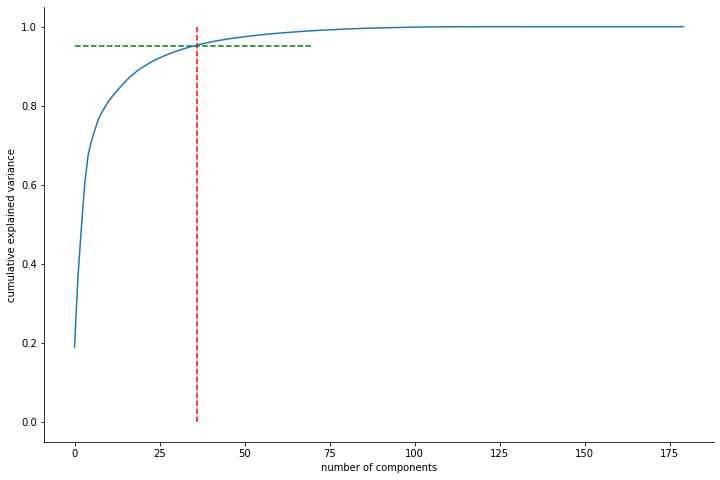

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_mm.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 70,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

In [ ]:
pca = PCA(n_components=5)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaled_df=df.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
pca_fit = pca.fit(scaled_df)

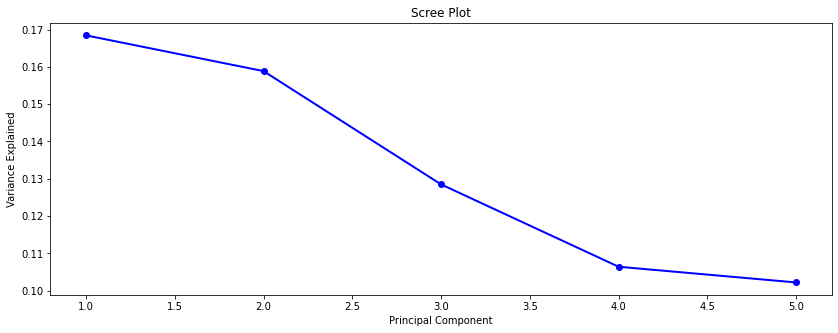

In [ ]:
fig = plt.figure(figsize=(14,5))
PC_values = np.arange(pca_fit.n_components_) + 1

plt.plot(PC_values, pca_fit.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.show()

In [ ]:
print(pca_fit.explained_variance_ratio_)

[0.1684648  0.15887433 0.12848941 0.10639347 0.10218209]


## StandardScaler

In [ ]:
#Importing the PCA module

pca = PCA(random_state=42)
pca_again = PCA(0.95)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 123)

In [ ]:
scaler = StandardScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_pca_std = pca_again.fit_transform(X_train)

In [ ]:
X_train_pca_std.shape

(3581, 68)

In [ ]:
# Tranforming X_Test
X_test_pca_std = pca_again.transform(X_test)
X_test_pca_std.shape

(896, 68)

In [ ]:
#Doing the PCA on the train data
pca.fit(X_train)

PCA(random_state=42)

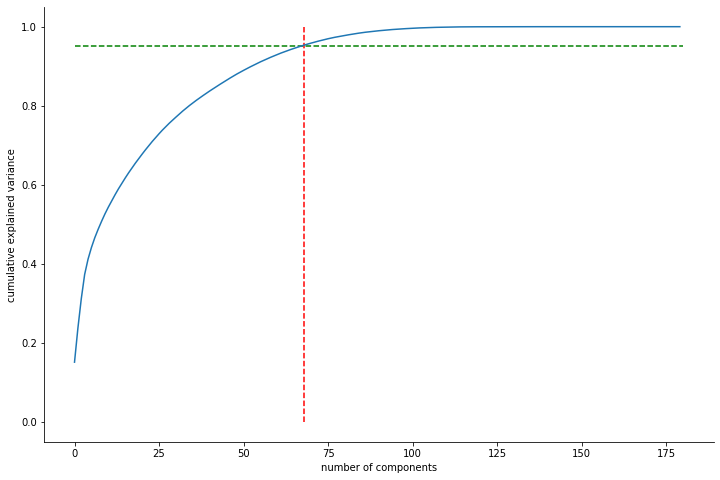

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.vlines(x = X_train_pca_std.shape[1],ymax = 1,ymin = 0,colors = 'r',linestyles = '--')
plt.hlines(y = 0.95, xmax = 180,xmin = 0,colors = 'g',linestyles = '--')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

sns.despine()
plt.show()

In [ ]:
pca = PCA(n_components=5)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_df=df.copy()
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)
pca_fit = pca.fit(scaled_df)

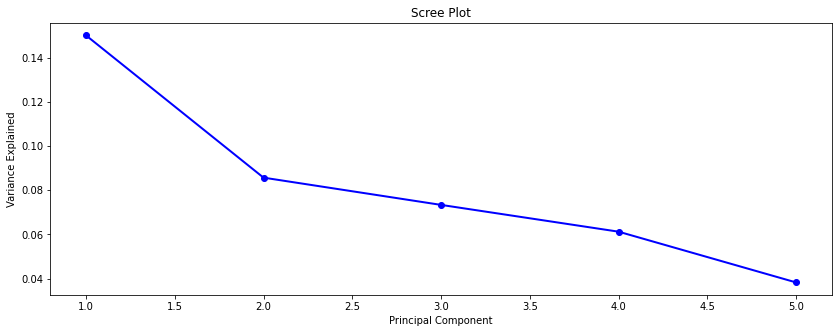

In [ ]:
fig = plt.figure(figsize=(14,5))
PC_values = np.arange(pca_fit.n_components_) + 1

plt.plot(PC_values, pca_fit.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')

plt.show()

In [ ]:
print(pca_fit.explained_variance_ratio_)

[0.15007322 0.08567752 0.07334033 0.06121539 0.0382409 ]


# Defining functions for Modelling

In [ ]:
# Defining the function to plot the ROC Curve

def draw_roc (actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate = False)
    
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(7,5))
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)"%auc_score)
    
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate or [1 - True Negative Rate]")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating charactersitc example")
    plt.legend(loc="lower right")
    sns.despine()
    plt.tight_layout()
    plt.show()
    
    return fpr, tpr, thresholds

In [ ]:
metricsdataframe=pd.DataFrame(columns=['Model',
                                       'Train/Test',
                                       'Roc_auc_score',
                                       'Sensitivity',
                                       'Specificity',
                                      'FPR',
                                      'Positive predictive value',
                                      'Negative Predictive value',
                                      'Precision',
                                      'Accuracy',
                                      'F1-Score'])

In [ ]:
# Defining function to get the evaluation metrics of the models.
def getModelMetrics(actual_Class=False,pred_Class=False,model_name='',train_or_test=''):

    confusion = metrics.confusion_matrix(actual_Class, pred_Class)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    

    
    Roc_auc_score=round(metrics.roc_auc_score(actual_Class,pred_Class),2)
    # Let's see the sensitivity of our logistic regression model
    Sensitivity=round((TP / float(TP+FN)),2)
    # Let us calculate specificity
    Specificity=round((TN / float(TN+FP)),2)
    # Calculate false postive rate - predicting profit when customer does not have profitted
    FPR=round((FP/ float(TN+FP)),2)
    # positive predictive value 
    PositivePredictiveValue=round((TP / float(TP+FP)),2)
    # Negative predictive value
    NegativePredictiveValue=round((TN / float(TN+ FN)),2)
    # sklearn precision score value 
    Precision=round(metrics.precision_score(actual_Class, pred_Class ),2)
    # Accuracy
    Accuracy = round(metrics.accuracy_score(actual_Class, pred_Class), 2)
    # F-1 Score
    F1_Score = round(metrics.f1_score(actual_Class, pred_Class), 2)
    
    
    print("Roc_auc_score : {}".format(metrics.roc_auc_score(actual_Class,pred_Class)))
    # Let's see the sensitivity of our logistic regression model
    print('Sensitivity/Recall : {}'.format(TP / float(TP+FN)))
    # Let us calculate specificity
    print('Specificity: {}'.format(TN / float(TN+FP)))
    # Calculate false postive rate - predicting profit when customer does not have profitted
    print('False Positive Rate: {}'.format(FP/ float(TN+FP)))
    # positive predictive value 
    print('Positive predictive value: {}'.format(TP / float(TP+FP)))
    # Negative predictive value
    print('Negative Predictive value: {}'.format(TN / float(TN+ FN)))
    # sklearn precision score value 
    print('Precision: {}'.format(metrics.precision_score(actual_Class, pred_Class )))
    # sklearn precision score value 
    print('Accuracy: {}'.format(metrics.accuracy_score(actual_Class, pred_Class )))
    #F1 Score
    print("F1 Score: {}".format(metrics.f1_score(actual_Class, pred_Class )))
    
#     data_list=[model_name,train_or_test,Roc_auc_score,Sensitivity,Specificity,NegativePredictiveValue,Precision, ]
    data_list=[model_name,train_or_test,Roc_auc_score,Sensitivity,Specificity,FPR,PositivePredictiveValue,NegativePredictiveValue,Precision, Accuracy, F1_Score]
    series_metrics=pd.Series(data_list,index=metricsdataframe.columns)
    
    return series_metrics
    

In [ ]:
# Defining function to get the evaluation metrics of the models.
def getModelMetrics2(actual_Class=False,pred_Class=False,model_name='',train_or_test=''):

    confusion = metrics.confusion_matrix(actual_Class, pred_Class)

    TP = confusion[1,1] # true positive 
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives
    

    
    Roc_auc_score=round(metrics.roc_auc_score(actual_Class,pred_Class),2)
    # Let's see the sensitivity of our logistic regression model
    Sensitivity=round((TP / float(TP+FN)),2)
    # Let us calculate specificity
    Specificity=round((TN / float(TN+FP)),2)
    # Calculate false postive rate - predicting profit when customer does not have profitted
    FPR=round((FP/ float(TN+FP)),2)
    # positive predictive value 
    PositivePredictiveValue=round((TP / float(TP+FP)),2)
    # Negative predictive value
    NegativePredictiveValue=round((TN / float(TN+ FN)),2)
    # sklearn precision score value 
    Precision=round(metrics.precision_score(actual_Class, pred_Class ),2)
    # Accuracy
    Accuracy = round(metrics.accuracy_score(actual_Class, pred_Class), 2)
    # F-1 Score
    F1_Score = round(metrics.f1_score(actual_Class, pred_Class), 2)
    

#     data_list=[model_name,train_or_test,Roc_auc_score,Sensitivity,Specificity,NegativePredictiveValue,Precision, ]
    data_list=[model_name,train_or_test,Roc_auc_score,Sensitivity,Specificity,FPR,PositivePredictiveValue,NegativePredictiveValue,Precision, Accuracy, F1_Score]
    series_metrics=pd.Series(data_list,index=metricsdataframe.columns)
    
    return series_metrics
    

In [ ]:
# Defining function to write the evaluation metrics of the models into data frame.
def WriteModelMetrics(series_metrics,metricsdataframe):
    metricsdataframe = metricsdataframe.append(series_metrics,ignore_index=True)
    return metricsdataframe

In [ ]:
# Function to find the optimal cutoff for classifing as Profit/non-profit
def findOptimalCutoff(df):
    
    # Let's create columns with different probability cutoffs 
    numbers = [float(x)/10 for x in range(10)]
    for i in numbers:
        df[i] = df.Class_Prob.map( lambda x: 1 if x > i else 0)
        
    
    # Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
    cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
    from sklearn.metrics import confusion_matrix
    
    num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

    for i in num:
        cm1 = metrics.confusion_matrix(df.Class, df[i] )
        total1=sum(sum(cm1))
        accuracy = (cm1[0,0]+cm1[1,1])/total1
        
        speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
    print(cutoff_df)
    
    # Let's plot accuracy sensitivity and specificity for various probabilities.
    cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
    plt.figure(figsize=(7,5))
    plt.tight_layout()
    sns.despine()
    plt.show()

In [ ]:
# Calculating VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Defining a function to give VIF value 
def vif_cal(X):     
    vif = pd.DataFrame() 
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]    
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif


In [ ]:
# This method will result in the calculation of predicted value of the Class column.
def predictClassWithProb(model,X,y,prob,model_name='',train_or_test=''):
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'Class':y.Class, 'Class_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Class_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.Class_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    series_metrics=getModelMetrics(y_df.Class,y_df.final_predicted,model_name,train_or_test)
    return y_df,series_metrics

In [ ]:
# This method will result in the calculation of predicted value of the Class column.
def predictClassWithProb2(model,X,y,prob,model_name='',train_or_test=''):
    
    # predict
    pred_probs = model.predict_proba(X)[:,1]
    
    y_df= pd.DataFrame({'Class':y.Class, 'Class_Prob':pred_probs})
    # Creating new column 'predicted' with 1 if Class_Prob>0.5 else 0
    y_df['final_predicted'] = y_df.Class_Prob.map( lambda x: 1 if x > prob else 0)
    # Let's see the head
    series_metrics=getModelMetrics2(y_df.Class,y_df.final_predicted,model_name,train_or_test)
    return y_df,series_metrics

In [ ]:
# This method will perform cross-validation and the display the model report.
def modelfit(alg, X_train, y_train, performCV=True, cv_folds=my_cv):
    #Fit the algorithm on the data
    alg.fit(X_train, y_train)
        
    #Predict training set:
    dtrain_predictions = alg.predict(X_train)
    dtrain_predprob = alg.predict_proba(X_train)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_val_score(alg, X_train, y_train, cv=cv_folds, scoring='precision')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.3g" % metrics.roc_auc_score(y_train, dtrain_predictions))
    print ("Recall/Sensitivity : %.3g" % metrics.recall_score(y_train, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.3g | Std - %.3g | Min - %.3g | Max - %.3g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        

In [ ]:
# This method will plot accuracy of the model with the given param of model.
def plot_traintestAcc(score,param):
    scores = score
    # plotting accuracies with max_depth
    plt.figure()
    plt.plot(scores["param_"+param], 
    scores["mean_train_score"], 
    label="training accuracy")
    plt.plot(scores["param_"+param], 
    scores["mean_test_score"], 
    label="test accuracy")
    plt.xlabel(param)
    plt.ylabel("accuracy")
    plt.legend()
    plt.show()

In [ ]:
# This method will plot accuracy of the random forest model.
def random_forst_feature_graph(grid_search, param):
    scores = grid_search.cv_results_
    plt.figure(figsize=(8,8))
    
    param = "param_"+param
    plt.plot(scores[param], 
             scores["mean_train_score"], 
             label="Training accuracy")

    plt.plot(scores[param], 
             scores["mean_test_score"], 
             label="Test accuracy")

    plt.xlabel(param)
    plt.ylabel("F1")
    plt.legend()

    plt.tight_layout()
    sns.despine()
    plt.show()

# Modelling

In [ ]:
modelData = pd.DataFrame(columns=["Model","Parameter","Value","Cut-Off"])

In [ ]:
X_train = X_train_pca_std
X_test = X_test_pca_std


In [ ]:
X_train_pca = X_train
y_train_res = y_train
X_test_pca = X_test
# y_test = y_test

y_train_res=y_train_res.values.reshape(-1,1)
# y_test = y_test.values.reshape(-1,1)

In [ ]:
X_train_pca.shape

(3581, 68)

In [ ]:
y_train_res.shape

(3581, 1)

In [ ]:
X_test_pca.shape

(896, 68)

In [ ]:
y_test.shape

(896, 1)

In [ ]:
y_train_res = pd.DataFrame(y_train_res)

In [ ]:
y_train_res.rename(columns={0:"Class"}, inplace=True)

# 1. Logistic Regression

In [ ]:
# Creating Train-Test variables for Logistic Regression
X_train_lr = pd.DataFrame(X_train_pca)
y_train_lr = pd.DataFrame(y_train_res)
X_test_lr = pd.DataFrame(X_test_pca)
y_test_lr = y_test

In [ ]:
logml = sm.GLM(y_train_lr, (sm.add_constant(X_train_lr)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:                 3581
Model:                            GLM   Df Residuals:                     3512
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2292.1
Date:                Wed, 03 Nov 2021   Deviance:                       4584.2
Time:                        01:28:09   Pearson chi2:                 3.74e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3887      0.037     10.628      0.000       0.317       0.460
0              0.0634      0.008      7.653      0.000       0.047       0.080
1             -0.0523      0.016     -3.333      0.001      -0.083      -0.022
2             -0.0371      0.042     -0.886      0.376      -0.119       0.045
3              0.0101      0.012      0.849      0.396      -0.013       0.034
4             -0.0264      0.015     -1.816      0.069      -0.055       0.002
5              0.0555      0.017      3.188      0.001       0.021       0.090
6             -0.0477      0.018     -2.663      0.008      -0.083      -0.013
7              0.0057      0.019      0.294      0.769      -0.032       0.044
8              0.0085      0.020      0.425      0.671      -0.031       0.047
9             -0.0832      0.022     -3.844      0.000      -0.126      -0.041
10             0.0600      0.024      2.546      0.011       0.014       0.106
11            -0.0694      0.022     -3.160      0.002      -0.112      -0.026
12             0.0256      0.023      1.116      0.265      -0.019       0.071
13            -0.0227      0.025     -0.913      0.361      -0.071       0.026
14             0.0674      0.025      2.654      0.008       0.018       0.117
15            -0.0099      0.027     -0.367      0.713      -0.063       0.043
16            -0.0162      0.024     -0.669      0.504      -0.064       0.031
17             0.0341      0.027      1.243      0.214      -0.020       0.088
18            -0.0135      0.026     -0.510      0.610      -0.065       0.038
19            -0.0079      0.029     -0.273      0.785      -0.065       0.049
20            -0.0296      0.029     -1.038      0.299      -0.086       0.026
21            -0.0074      0.039     -0.192      0.848      -0.083       0.068
22            -0.0552      0.028     -1.949      0.051      -0.111       0.000
23            -0.0539      0.030     -1.766      0.077      -0.114       0.006
24            -0.0051      0.034     -0.148      0.882      -0.072       0.062
25            -0.0834      0.035     -2.391      0.017      -0.152      -0.015
26             0.0175      0.034      0.518      0.604      -0.049       0.084
27            -0.0458      0.064     -0.712      0.476      -0.172       0.080
28             0.0303      0.044      0.683      0.494      -0.057       0.117
29             0.0561      0.039      1.426      0.154      -0.021       0.133
30            -0.0016      0.082     -0.020      0.984      -0.162       0.158
31            -0.0458      0.036     -1.267      0.205      -0.117       0.025
32            -0.0035      0.032     -0.110      0.913      -0.066       0.059
33            -0.0858      0.037     -2.347      0.019      -0.157      -0.014
34             0.1348      0.047      2.850      0.004       0.042       0.227
35

In [ ]:
# Checking for the VIF of the train data.
vif = vif_cal(X_train_lr) 
vif

Features  VIF
0          0 1.00
43        43 1.00
49        49 1.00
48        48 1.00
47        47 1.00
..       ...  ...
28        28 1.00
29        29 1.00
30        30 1.00
31        31 1.00
67        67 1.00

[68 rows x 2 columns]

### Observation
- There are no Columns which are highly correlated ---> VIF = 1
- There are not many columns whose coefficients are not statistically significant ----> p>0.05

In [ ]:
lg = LogisticRegression()

In [ ]:
modelfit(lg, X_train_lr, y_train_lr)


Model Report
Accuracy : 0.579
Recall/Sensitivity : 0.893
AUC Score (Train): 0.656202
CV Score : Mean - 0.629 | Std - 0.00729 | Min - 0.612 | Max - 0.638


In [ ]:
# predictions on Test data
pred_probs_test = lg.predict(X_test_lr)
getModelMetrics(y_test_lr,pred_probs_test)

Roc_auc_score : 0.5623775646973914
Sensitivity/Recall : 0.8679245283018868
Specificity: 0.2568306010928962
False Positive Rate: 0.7431693989071039
Positive predictive value: 0.6284153005464481
Negative Predictive value: 0.573170731707317
Precision: 0.6284153005464481
Accuracy: 0.6183035714285714
F1 Score: 0.7290015847860539


Model                           
Train/Test                      
Roc_auc_score               0.56
Sensitivity                 0.87
Specificity                 0.26
FPR                         0.74
Positive predictive value   0.63
Negative Predictive value   0.57
Precision                   0.63
Accuracy                    0.62
F1-Score                    0.73
dtype: object

In [ ]:
print("Accuracy : {}".format(metrics.accuracy_score(y_test_lr,pred_probs_test)))
print("Recall : {}".format(metrics.recall_score(y_test_lr,pred_probs_test)))
print("Precision : {}".format(metrics.precision_score(y_test_lr,pred_probs_test)))

Accuracy : 0.6183035714285714
Recall : 0.8679245283018868
Precision : 0.6284153005464481


In [ ]:
print(metrics.confusion_matrix(y_test_lr,pred_probs_test))

[[ 94 272]
 [ 70 460]]


In [ ]:
# #Making prediction on the test data
# pred_probs_test = lg.predict_proba(X_test_lr)[:,1]

# print("roc_auc_score(Test) {:2.2}".format(metrics.roc_auc_score(y_test_lr, pred_probs_test)))

In [ ]:
HighestAOC = 0.0
cutOffAOC = 0.0

for i in np.arange(0,1,0.1):
    tenp1, tenp2 = predictClassWithProb2(lg,X_test_lr,y_test_lr,i,model_name='Logistic Regression',train_or_test='TEST')
    cutOffAOC=tenp2['Roc_auc_score']
    if (cutOffAOC>HighestAOC):
        HighestAOC = cutOffAOC
        cutOffAOC=i

In [ ]:
y_train_lr.rename(columns={0:"Class"}, inplace=True)

cut_off_prob=cutOffAOC
temp_aoc,series_metrics = predictClassWithProb(lg,X_test_lr,y_test_lr,cut_off_prob)


Roc_auc_score : 0.5623775646973914
Sensitivity/Recall : 0.8679245283018868
Specificity: 0.2568306010928962
False Positive Rate: 0.7431693989071039
Positive predictive value: 0.6284153005464481
Negative Predictive value: 0.573170731707317
Precision: 0.6284153005464481
Accuracy: 0.6183035714285714
F1 Score: 0.7290015847860539


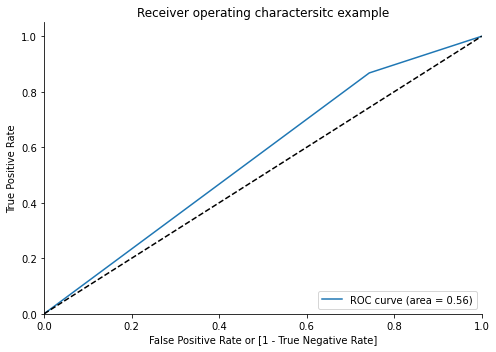

(array([0.       , 0.7431694, 1.       ]),
 array([0.        , 0.86792453, 1.        ]),
 array([2, 1, 0]))

In [ ]:
draw_roc(temp_aoc.Class, temp_aoc.final_predicted)

      prob  accuracy  sensi  speci
0.00  0.00      0.59   1.00   0.00
0.10  0.10      0.59   1.00   0.01
0.20  0.20      0.59   1.00   0.01
0.30  0.30      0.59   0.98   0.03
0.40  0.40      0.60   0.95   0.09
0.50  0.50      0.62   0.87   0.26
0.60  0.60      0.56   0.57   0.54
0.70  0.70      0.46   0.17   0.89
0.80  0.80      0.42   0.05   0.97
0.90  0.90      0.41   0.01   0.99


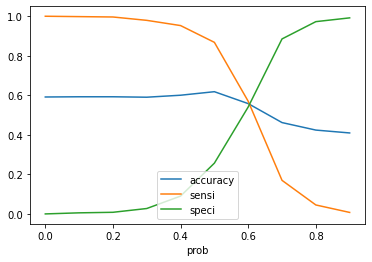

<Figure size 504x360 with 0 Axes>

In [ ]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(temp_aoc)

In [ ]:
HighestPrec = 0.0
cutOffPrec = 0.0

for i in np.arange(0.3, 0.8,0.01):
    tenp1, tenp2 = predictClassWithProb2(lg,X_test_lr,y_test_lr,i,model_name='Logistic Regression',train_or_test='TEST')
    curPrecision=tenp2['Precision']
    if (curPrecision>HighestPrec):
        HighestPrec = curPrecision
        cutOffPrec=i
        

HighestAccuracy = 0.0
cutOffAccuracy = 0.0

for i in np.arange(0, 1,0.01):
    tenp1, tenp2 = predictClassWithProb2(lg,X_test_lr,y_test_lr,i,model_name='Logistic Regression',train_or_test='TEST')
    curAccuracy=tenp2['Accuracy']
    if (curAccuracy>HighestAccuracy):
        HighestAccuracy = curAccuracy
        cutOffAccuracy=i

In [ ]:
print("Highest Precision: ",HighestPrec, " at cut-off: ",cutOffPrec)
print("Highest Accuracy: ",HighestAccuracy, " at cut-off: ",cutOffAccuracy)

Highest Precision:  0.72  at cut-off:  0.7200000000000004
Highest Accuracy:  0.62  at cut-off:  0.46


In [ ]:
### predicting with the choosen cut-off on TEST
cut_off_prob=cutOffAccuracy
x_temp,series_metrics = predictClassWithProb(lg,X_test_lr,y_test_lr,cut_off_prob,model_name='Logistic Regression',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5473863284874729
Sensitivity/Recall : 0.9226415094339623
Specificity: 0.1721311475409836
False Positive Rate: 0.8278688524590164
Positive predictive value: 0.6174242424242424
Negative Predictive value: 0.6057692307692307
Precision: 0.6174242424242424
Accuracy: 0.6160714285714286
F1 Score: 0.7397881996974282


In [ ]:
### predicting with the choosen cut-off on TEST
cut_off_prob=cutOffPrec
x_temp,series_metrics = predictClassWithProb(lg,X_test_lr,y_test_lr,cut_off_prob,model_name='Logistic Regression',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5276884214867513
Sensitivity/Recall : 0.12641509433962264
Specificity: 0.9289617486338798
False Positive Rate: 0.07103825136612021
Positive predictive value: 0.7204301075268817
Negative Predictive value: 0.42341220423412207
Precision: 0.7204301075268817
Accuracy: 0.45424107142857145
F1 Score: 0.21508828250401285


In [ ]:
modelData = modelData.append({"Model":"Logistic Regression", 
                              "Parameter": "Precision","Value": HighestPrec,
                              "Cut-Off":cutOffPrec}, ignore_index=True)

modelData = modelData.append({"Model": "Logistic Regression", 
                              "Parameter": "Accuracy","Value": HighestAccuracy,
                              "Cut-Off":cutOffAccuracy}, ignore_index=True)

In [ ]:
modelData

Model  Parameter  Value  Cut-Off
0  Logistic Regression  Precision   0.72     0.72
1  Logistic Regression   Accuracy   0.62     0.46

# 2. Decision Tree

In [ ]:
# Creating Train-Test variables for Decision Tree
X_train_dt = pd.DataFrame(X_train_pca)
y_train_dt = pd.DataFrame(y_train_res)
X_test_dt = pd.DataFrame(X_test_pca)
y_test_dt = y_test

In [ ]:
X_train_dt.shape

(3581, 68)

In [ ]:
y_train_dt.shape

(3581, 1)

In [ ]:
X_test_dt.shape, y_test_dt.shape

((896, 68), (896, 1))

In [ ]:
##### Applying Decision Tree Classifier on our principal components with Hyperparameter tuning
dt = DecisionTreeClassifier(class_weight='balanced',
                             max_features='auto',
                             min_samples_split=100,
                             min_samples_leaf=100,
                             max_depth=10,
                             random_state=123)

modelfit(dt, X_train_dt, y_train_dt)


Model Report
Accuracy : 0.617
Recall/Sensitivity : 0.665
AUC Score (Train): 0.664714
CV Score : Mean - 0.632 | Std - 0.0169 | Min - 0.608 | Max - 0.667


In [ ]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5,10,15,20,30,50],
    'min_samples_leaf': range(100, 500, 50),
    'min_samples_split': range(100, 500, 50),
    'max_features': [5,10,15,20,30,50]
}
# Create a base model
dt = DecisionTreeClassifier(class_weight='balanced',random_state=123)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt, param_grid = param_grid, 
                           cv = my_cv, n_jobs = -1,verbose = 1000,scoring="precision")

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train_dt, y_train_dt)

Streaming output truncated to the last 5000 lines.
[Parallel(n_jobs=-1)]: Done 3579 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3580 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3581 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3582 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3583 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3584 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3585 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3586 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3587 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3588 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3589 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3590 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3591 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3592 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 3593 tasks      | elapsed:  1.7min
[Par

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=123),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15, 20, 30, 50],
                         'max_features': [5, 10, 15, 20, 30, 50],
                         'min_samples_leaf': range(100, 500, 50),
                         'min_samples_split': range(100, 500, 50)},
             scoring='precision', verbose=1000)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get score of',grid_search.best_score_,'using',grid_search.best_params_)

We can get score of 0.6547433915560138 using {'max_depth': 10, 'max_features': 15, 'min_samples_leaf': 100, 'min_samples_split': 300}


In [ ]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df.head(3)

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0           0.03          0.00  ...            0.02             1983
1           0.03          0.00  ...            0.02             1983
2           0.02          0.00  ...            0.02             1983

[3 rows x 22 columns]

In [ ]:
cv_df.nlargest(3,"mean_test_score")

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
516            0.06          0.00  ...            0.02                1
900            0.06          0.00  ...            0.02                1
1284           0.06          0.00  ...            0.02                1

[3 rows x 22 columns]

In [ ]:
grid_search.best_score_

0.6547433915560138

In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=15,
                       min_samples_leaf=100, min_samples_split=300,
                       random_state=123)

In [ ]:
param_max_depth = cv_df.nlargest(3,"mean_test_score").param_max_depth.iloc[0]
param_max_features = cv_df.nlargest(3,"mean_test_score").param_max_features.iloc[0]
param_min_samples_leaf = cv_df.nlargest(3,"mean_test_score").param_min_samples_leaf.iloc[0]
param_min_samples_split = cv_df.nlargest(3,"mean_test_score").param_min_samples_split.iloc[0]

In [ ]:
# model with the best hyperparameters
dt_final = DecisionTreeClassifier(class_weight='balanced',
                             max_depth=param_max_depth,
                             max_features=param_max_features,
                             min_samples_leaf=param_min_samples_leaf, 
                             min_samples_split=param_min_samples_split,
                             random_state=123)

In [ ]:
modelfit(dt_final,X_train_dt,y_train_dt)


Model Report
Accuracy : 0.616
Recall/Sensitivity : 0.629
AUC Score (Train): 0.655408
CV Score : Mean - 0.655 | Std - 0.0211 | Min - 0.621 | Max - 0.692


In [ ]:
HighestAOC = 0.0
cutOffAOC = 0.0

for i in np.arange(0,1,0.1):
    tenp1, tenp2 = predictClassWithProb2(dt_final,X_test_dt,y_test_dt,i,model_name='Decision tree',train_or_test='TEST')
    cutOffAOC=tenp2['Roc_auc_score']
    if (cutOffAOC>HighestAOC):
        HighestAOC = cutOffAOC
        cutOffAOC=i

In [ ]:
y_train_dt.rename(columns={0:"Class"}, inplace=True)

cut_off_prob=cutOffAOC
temp_aoc,series_metrics = predictClassWithProb(dt_final,X_train_dt,y_train_dt,cut_off_prob)


Roc_auc_score : 0.6164641310409704
Sensitivity/Recall : 0.628933771723814
Specificity: 0.6039944903581267
False Positive Rate: 0.39600550964187325
Positive predictive value: 0.699582027168234
Negative Predictive value: 0.5260947810437913
Precision: 0.699582027168234
Accuracy: 0.6188215582239598
F1 Score: 0.662379421221865


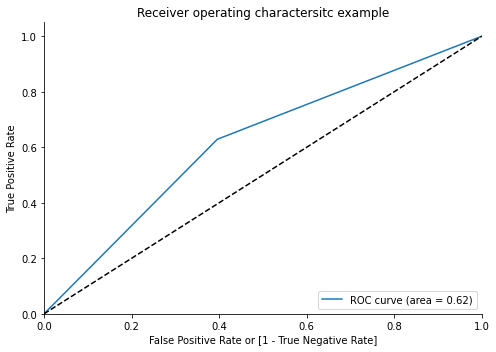

roc_auc_score : 0.62


In [ ]:
draw_roc(temp_aoc.Class, temp_aoc.final_predicted)
print("roc_auc_score : {:2.2f}".format(metrics.roc_auc_score(temp_aoc.Class, temp_aoc.final_predicted)))

In [ ]:
# make predictions
pred_probs_test = dt_final.predict(X_test_dt)
#Let's check the model metrices.
getModelMetrics(actual_Class=y_test_dt,pred_Class=pred_probs_test)

Roc_auc_score : 0.5365656253221982
Sensitivity/Recall : 0.5867924528301887
Specificity: 0.48633879781420764
False Positive Rate: 0.5136612021857924
Positive predictive value: 0.6232464929859719
Negative Predictive value: 0.44836272040302266
Precision: 0.6232464929859719
Accuracy: 0.5457589285714286
F1 Score: 0.6044703595724004


Model                           
Train/Test                      
Roc_auc_score               0.54
Sensitivity                 0.59
Specificity                 0.49
FPR                         0.51
Positive predictive value   0.62
Negative Predictive value   0.45
Precision                   0.62
Accuracy                    0.55
F1-Score                    0.60
dtype: object

      prob  accuracy  sensi  speci
0.00  0.00      0.59   1.00   0.00
0.10  0.10      0.59   1.00   0.00
0.20  0.20      0.59   1.00   0.00
0.30  0.30      0.60   0.98   0.04
0.40  0.40      0.64   0.78   0.42
0.50  0.50      0.62   0.63   0.60
0.60  0.60      0.55   0.36   0.83
0.70  0.70      0.47   0.15   0.94
0.80  0.80      0.41   0.00   1.00
0.90  0.90      0.41   0.00   1.00


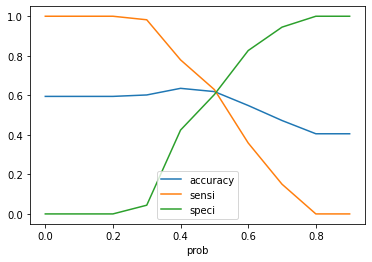

<Figure size 504x360 with 0 Axes>

In [ ]:
# finding cut-off with the right balance of the metrices
# sensitivity vs specificity trade-off
findOptimalCutoff(temp_aoc)

In [ ]:
dt_final

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_features=15,
                       min_samples_leaf=100, min_samples_split=300,
                       random_state=123)

In [ ]:
HighestPrec = 0.0
cutOffPrec = 0.0

for i in np.arange(0.3, 0.8,0.01):
    tenp1, tenp2 = predictClassWithProb2(dt_final,X_test_dt,y_test_dt,i,model_name='Decision Tree',train_or_test='TEST')
    curPrecision=tenp2['Precision']
    if (curPrecision>HighestPrec):
        HighestPrec = curPrecision
        cutOffPrec=i
        

HighestAccuracy = 0.0
cutOffAccuracy = 0.0

for i in np.arange(0.02, 1,0.01):
    tenp1, tenp2 = predictClassWithProb2(dt_final,X_test_dt,y_test_dt,i,model_name='Decision Tree',train_or_test='TEST')
    curAccuracy=tenp2['Accuracy']
    if (curAccuracy>HighestAccuracy):
        HighestAccuracy = curAccuracy
        cutOffAccuracy=i

In [ ]:
print("Highest Precision: ",HighestPrec, " at cut-off: ",cutOffPrec)
print("Highest Accuracy: ",HighestAccuracy, " at cut-off: ",cutOffAccuracy)

Highest Precision:  0.72  at cut-off:  0.6400000000000003
Highest Accuracy:  0.61  at cut-off:  0.31


In [ ]:
cut_off_prob = cutOffPrec
y_train_df,series_metrics = predictClassWithProb(dt_final,X_train_dt,y_train_dt,cut_off_prob)

Roc_auc_score : 0.5642674557177739
Sensitivity/Recall : 0.21324565523720057
Specificity: 0.9152892561983471
False Positive Rate: 0.08471074380165289
Positive predictive value: 0.7868284228769498
Negative Predictive value: 0.44241011984021306
Precision: 0.7868284228769498
Accuracy: 0.4979056129572745
F1 Score: 0.3355506282335551


In [ ]:
cut_off_prob = cutOffAccuracy
y_train_df,series_metrics = predictClassWithProb(dt_final,X_train_dt,y_train_dt,cut_off_prob)

Roc_auc_score : 0.5282310918226201
Sensitivity/Recall : 0.9586660403945514
Specificity: 0.09779614325068871
False Positive Rate: 0.9022038567493113
Positive predictive value: 0.6090719188302
Negative Predictive value: 0.6173913043478261
Precision: 0.6090719188302
Accuracy: 0.6096062552359676
F1 Score: 0.7448905109489051


In [ ]:
modelData = modelData.append({"Model":"Decision Tree", 
                              "Parameter": "Precision","Value": HighestPrec,
                              "Cut-Off":cutOffPrec}, ignore_index=True)

modelData = modelData.append({"Model": "Decision Tree", 
                              "Parameter": "Accuracy","Value": HighestAccuracy,
                              "Cut-Off":cutOffAccuracy}, ignore_index=True)

In [ ]:
modelData

Model  Parameter  Value  Cut-Off
0  Logistic Regression  Precision   0.72     0.72
1  Logistic Regression   Accuracy   0.62     0.46
2        Decision Tree  Precision   0.72     0.64
3        Decision Tree   Accuracy   0.61     0.31

# 3. Random Forest

In [ ]:
# Creating Train-Test variables for Random Forest
X_train_rf = pd.DataFrame(X_train_pca)
y_train_rf = pd.DataFrame(y_train_res)
X_test_rf = pd.DataFrame(X_test_pca)
y_test_rf = y_test

In [ ]:
rf = RandomForestClassifier(random_state=42, max_depth=5, n_estimators=20, oob_score=True)

In [ ]:
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(max_depth=5, n_estimators=20, oob_score=True,
                       random_state=42)

In [ ]:
rf.oob_score_

0.6031834683049427

In [ ]:
# make predictions
pred_probs_test = rf.predict(X_test_rf)

#Let's check the model metrices.
getModelMetrics(actual_Class=y_test_rf,pred_Class=pred_probs_test)

Roc_auc_score : 0.525626353232292
Sensitivity/Recall : 0.9283018867924528
Specificity: 0.12295081967213115
False Positive Rate: 0.8770491803278688
Positive predictive value: 0.6051660516605166
Negative Predictive value: 0.5421686746987951
Precision: 0.6051660516605166
Accuracy: 0.5993303571428571
F1 Score: 0.7326880119136262


Model                           
Train/Test                      
Roc_auc_score               0.53
Sensitivity                 0.93
Specificity                 0.12
FPR                         0.88
Positive predictive value   0.61
Negative Predictive value   0.54
Precision                   0.61
Accuracy                    0.60
F1-Score                    0.73
dtype: object

In [ ]:
parameters = {'max_depth': range(5, 40, 5)}
rf = RandomForestClassifier()
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="precision", verbose=1000, return_train_score=True)

grid_search.fit(X_train_rf, y_train_rf)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_depth=5 .....................................................
[CV] ..... max_depth=5, score=(train=0.648, test=0.601), total=   1.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[CV] max_depth=5 .....................................................
[CV] ..... max_depth=5, score=(train=0.645, test=0.609), total=   1.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s
[CV] max_depth=5 .....................................................
[CV] ..... max_depth=5, score=(train=0.651, test=0.597), total=   1.1s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s
[CV] max_depth=5 .....................................................
[CV] ..... max_depth=5, score=(train=0.645, test=0.612), total=   1.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 40, 5)}, return_train_score=True,
             scoring='precision', verbose=1000)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
5           2.20          0.02  ...              1.00             0.00
2           2.10          0.03  ...              1.00             0.00
4           2.22          0.03  ...              1.00             0.00
3           2.21          0.03  ...              1.00             0.00
6           2.22          0.04  ...              1.00             0.00
1           1.77          0.01  ...              0.86             0.01
0           1.08          0.01  ...              0.65             0.00

[7 rows x 31 columns]

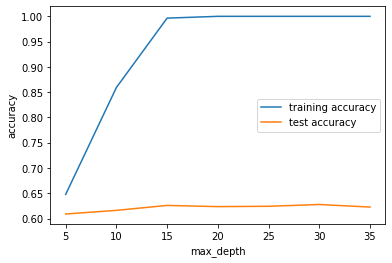

In [ ]:
# grid_search.cv_results_

plot_traintestAcc(grid_search.cv_results_,'max_depth')

In [ ]:
my_max_depth = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_depth'].iloc[0]

### Tuning n_estimators


In [ ]:
parameters = {'n_estimators': range(5, 70, 5)}

rf = RandomForestClassifier(max_depth=my_max_depth,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="precision", verbose=100, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

Fitting 10 folds for each of 13 candidates, totalling 130 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] n_estimators=5 ..................................................
[CV] .. n_estimators=5, score=(train=0.957, test=0.651), total=   0.1s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[CV] n_estimators=5 ..................................................
[CV] .. n_estimators=5, score=(train=0.955, test=0.612), total=   0.1s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[CV] n_estimators=5 ..................................................
[CV] .. n_estimators=5, score=(train=0.957, test=0.613), total=   0.2s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s
[CV] n_estimators=5 ..................................................
[CV] .. n_estimators=5, score=(train=0.952, test=0.604), total=   0.1s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elap

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=30, random_state=10),
             param_grid={'n_estimators': range(5, 70, 5)},
             return_train_score=True, scoring='precision', verbose=100)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score").head()

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
11           1.32          0.02  ...              1.00             0.00
1            0.24          0.01  ...              0.99             0.00
9            1.09          0.01  ...              1.00             0.00
5            0.67          0.01  ...              1.00             0.00
12           1.42          0.01  ...              1.00             0.00

[5 rows x 31 columns]

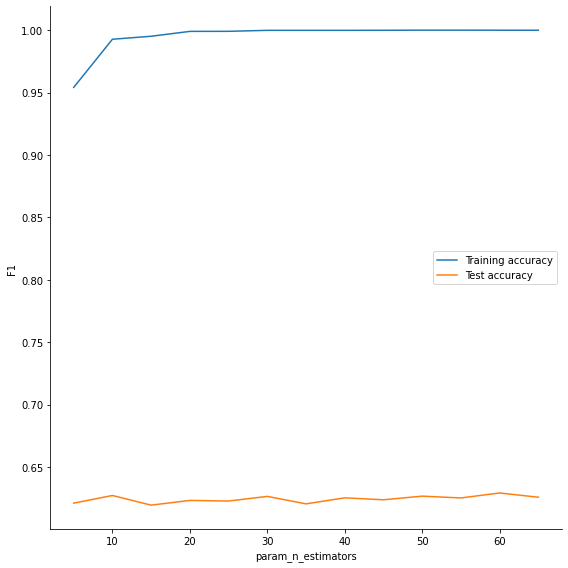

In [ ]:
random_forst_feature_graph(grid_search, "n_estimators")

In [ ]:
my_n_estimator = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_n_estimators'].iloc[0]

### Tuning max_features

In [ ]:
parameters = {'max_features': [5, 10, 15, 20, 25, 30,50,70]}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="precision", verbose=1000, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] max_features=5 ..................................................
[CV] .. max_features=5, score=(train=1.000, test=0.615), total=   1.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[CV] max_features=5 ..................................................
[CV] .. max_features=5, score=(train=1.000, test=0.636), total=   0.9s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.0s remaining:    0.0s
[CV] max_features=5 ..................................................
[CV] .. max_features=5, score=(train=1.000, test=0.606), total=   0.9s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.0s remaining:    0.0s
[CV] max_features=5 ..................................................
[CV] .. max_features=5, score=(train=1.000, test=0.623), total=   0.9s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapse

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=30, n_estimators=60,
                                              random_state=10),
             param_grid={'max_features': [5, 10, 15, 20, 25, 30, 50, 70]},
             return_train_score=True, scoring='precision', verbose=1000)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
5           4.26          0.07  ...              1.00             0.00
2           2.32          0.04  ...              1.00             0.00
4           3.61          0.05  ...              1.00             0.00
6           6.88          0.09  ...              1.00             0.00
1           1.62          0.03  ...              1.00             0.00
3           2.97          0.04  ...              1.00             0.00
0           0.92          0.02  ...              1.00             0.00
7           0.04          0.00  ...               nan              nan

[8 rows x 31 columns]

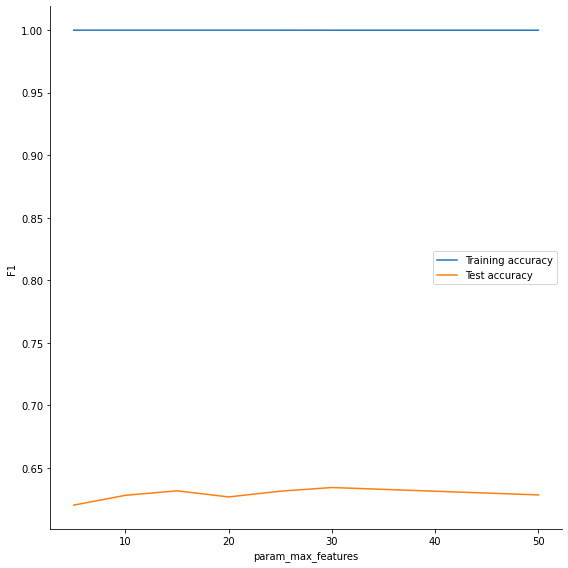

In [ ]:
random_forst_feature_graph(grid_search, "max_features")

In [ ]:
my_max_features=pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_features'].iloc[0]

### Tuning min_samples_leaf

In [ ]:
parameters = {'min_samples_leaf': range(1, 500, 50)}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator, max_features = my_max_features, random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="precision", verbose=1000, return_train_score=True)

grid_search.fit(X_train_rf, y_train_rf)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=1.000, test=0.636), total=   4.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=1.000, test=0.635), total=   4.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.9s remaining:    0.0s
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=1.000, test=0.624), total=   4.4s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.3s remaining:    0.0s
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=1.000, test=0.617), total=   4.3s
[Parallel(n_jobs=1)]: Done   4 out of   

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=30, max_features=30,
                                              n_estimators=60,
                                              random_state=10),
             param_grid={'min_samples_leaf': range(1, 500, 50)},
             return_train_score=True, scoring='precision', verbose=1000)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
0           4.29          0.07  ...              1.00             0.00
1           2.39          0.03  ...              0.67             0.00
2           1.88          0.04  ...              0.64             0.00
3           1.59          0.03  ...              0.63             0.00
4           1.37          0.03  ...              0.62             0.00
5           1.24          0.03  ...              0.62             0.00
6           1.08          0.02  ...              0.61             0.00
7           0.98          0.01  ...              0.61             0.00
8           0.89          0.02  ...              0.60             0.00
9           0.80          0.01  ...              0.59             0.00

[10 rows x 31 columns]

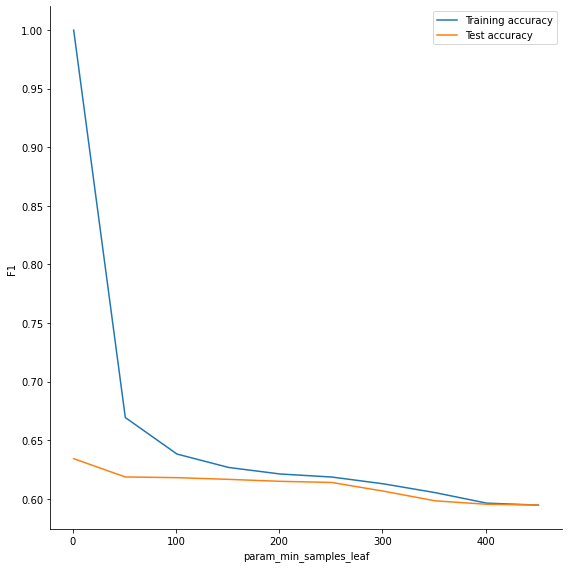

In [ ]:
random_forst_feature_graph(grid_search, "min_samples_leaf")

In [ ]:
my_min_sample_leaf = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_leaf'].iloc[0]

### Tuning min_samples_split

In [ ]:
parameters = {'min_samples_split': range(50, 550, 50)}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator, max_features = my_max_features, min_samples_leaf = my_min_sample_leaf,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="precision", verbose=1000, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.858, test=0.636), total=   3.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.852, test=0.623), total=   3.6s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.4s remaining:    0.0s
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.851, test=0.600), total=   3.6s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.1s remaining:    0.0s
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.855, test=0.621), total=   3.6s
[Parallel(n_jobs=1)]: Done   4 o

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=30, max_features=30,
                                              n_estimators=60,
                                              random_state=10),
             param_grid={'min_samples_split': range(50, 550, 50)},
             return_train_score=True, scoring='precision', verbose=1000)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  ...  mean_train_score  std_train_score
1           3.18          0.03  ...              0.73             0.00
0           3.65          0.06  ...              0.85             0.00
2           2.92          0.06  ...              0.68             0.01
3           2.68          0.07  ...              0.66             0.00
4           2.45          0.06  ...              0.65             0.00
5           2.26          0.06  ...              0.64             0.00
6           2.14          0.05  ...              0.64             0.00
7           2.05          0.05  ...              0.63             0.00
8           1.93          0.06  ...              0.63             0.00
9           1.85          0.07  ...              0.63             0.00

[10 rows x 31 columns]

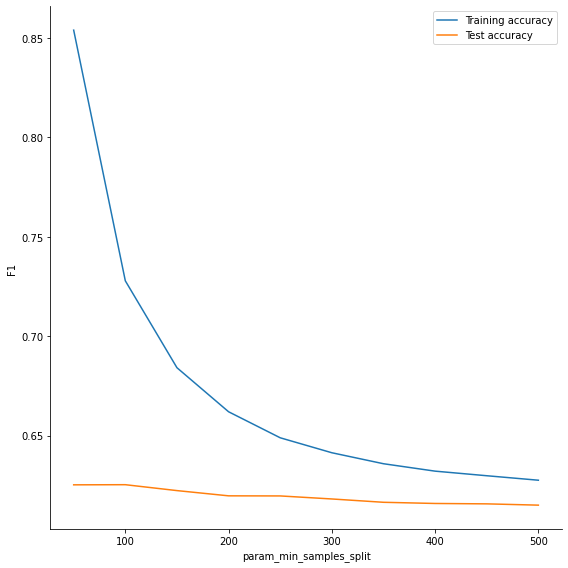

In [ ]:
random_forst_feature_graph(grid_search, "min_samples_split")

In [ ]:
my_min_samples_split=pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_split'].iloc[0]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=1.000, test=0.636), total=   4.4s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=1.000, test=0.635), total=   4.4s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    8.8s remaining:    0.0s
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=1.000, test=0.624), total=   4.3s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   13.2s remaining:    0.0s
[CV] min_samples_leaf=1 ..............................................
[CV]  min_samples_leaf=1, score=(train=1.000, test=0.617), total=   4.3s
[Parallel(n_jobs=1)]: Done   4 out of   

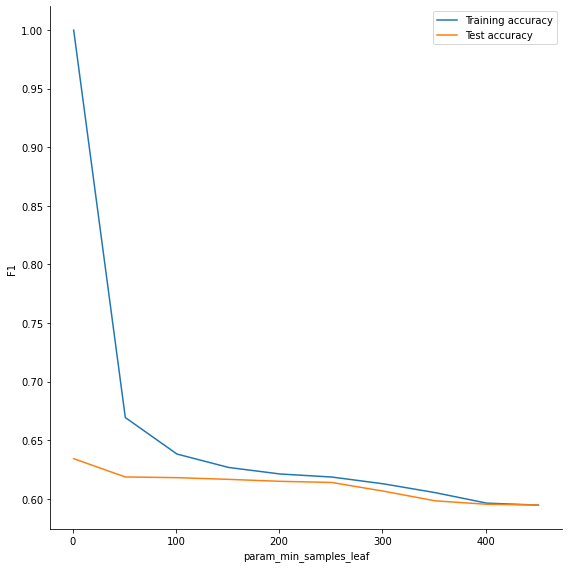

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.858, test=0.636), total=   3.8s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.9s remaining:    0.0s
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.852, test=0.623), total=   3.8s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.7s remaining:    0.0s
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.851, test=0.600), total=   3.8s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   11.5s remaining:    0.0s
[CV] min_samples_split=50 ............................................
[CV]  min_samples_split=50, score=(train=0.855, test=0.621), total=   3.7s
[Parallel(n_jobs=1)]: Done   4 o

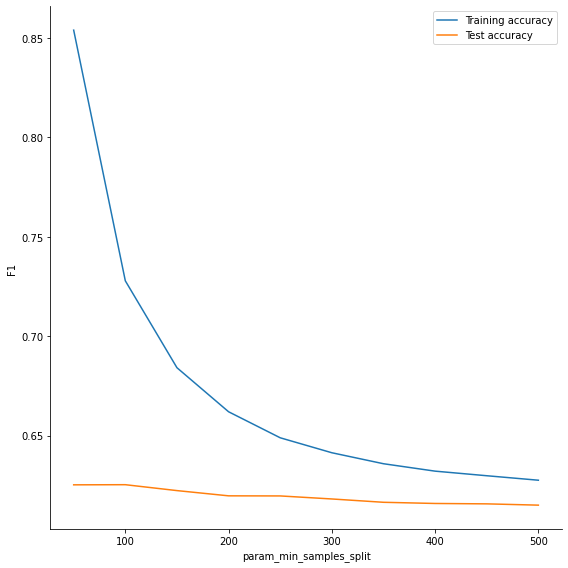

In [ ]:
### Tuning min_samples_leaf

parameters = {'min_samples_leaf': range(1, 500, 50)}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator, max_features = my_max_features, random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="precision", verbose=1000, return_train_score=True)

grid_search.fit(X_train_rf, y_train_rf)

pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

random_forst_feature_graph(grid_search, "min_samples_leaf")

my_min_sample_leaf = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_leaf'].iloc[0]

### Tuning min_samples_split

parameters = {'min_samples_split': range(50, 550, 50)}

rf = RandomForestClassifier(max_depth=my_max_depth,n_estimators = my_n_estimator, max_features = my_max_features, min_samples_leaf = my_min_sample_leaf,random_state=10)
grid_search = GridSearchCV(rf, parameters, cv=my_cv, scoring="precision", verbose=1000, return_train_score=True)


grid_search.fit(X_train_rf, y_train_rf)

pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

random_forst_feature_graph(grid_search, "min_samples_split")

my_min_samples_split=pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_split'].iloc[0]

### Final Model

In [ ]:
rf_final = RandomForestClassifier(max_depth=my_max_depth,
                                  n_estimators = my_n_estimator, 
                                  max_features = my_max_features, 
                                  min_samples_leaf = my_min_sample_leaf,
                                  min_samples_split=my_min_samples_split,
                                  random_state=123)

In [ ]:
print("Model performance on Train data:")
modelfit(rf_final,X_train_rf,y_train_rf)

Model performance on Train data:

Model Report
Accuracy : 0.715
Recall/Sensitivity : 0.951
AUC Score (Train): 0.907786
CV Score : Mean - 0.624 | Std - 0.00845 | Min - 0.612 | Max - 0.636


In [ ]:
# predict on test data
predictions = rf_final.predict(X_test_rf)

In [ ]:
print("Model performance on Test data:")
getModelMetrics(y_test_rf,predictions)

Model performance on Test data:
Roc_auc_score : 0.5580523765336634
Sensitivity/Recall : 0.8811320754716981
Specificity: 0.23497267759562843
False Positive Rate: 0.7650273224043715
Positive predictive value: 0.6251673360107095
Negative Predictive value: 0.5771812080536913
Precision: 0.6251673360107095
Accuracy: 0.6171875
F1 Score: 0.7314017227877839


Model                           
Train/Test                      
Roc_auc_score               0.56
Sensitivity                 0.88
Specificity                 0.23
FPR                         0.77
Positive predictive value   0.63
Negative Predictive value   0.58
Precision                   0.63
Accuracy                    0.62
F1-Score                    0.73
dtype: object

In [ ]:
# predicting with default cut-off 0.5
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(rf_final,X_train_rf,y_train_rf,cut_off_prob)

Roc_auc_score : 0.7145561037593148
Sensitivity/Recall : 0.9511507750117426
Specificity: 0.47796143250688705
False Positive Rate: 0.522038567493113
Positive predictive value: 0.7276320517427237
Negative Predictive value: 0.8696741854636592
Precision: 0.7276320517427237
Accuracy: 0.7592851158894164
F1 Score: 0.8245114006514659


      prob  accuracy  sensi  speci
0.00  0.00      0.59   1.00   0.00
0.10  0.10      0.59   1.00   0.00
0.20  0.20      0.59   1.00   0.00
0.30  0.30      0.60   1.00   0.01
0.40  0.40      0.64   1.00   0.12
0.50  0.50      0.76   0.95   0.48
0.60  0.60      0.82   0.77   0.89
0.70  0.70      0.60   0.32   1.00
0.80  0.80      0.42   0.02   1.00
0.90  0.90      0.41   0.00   1.00


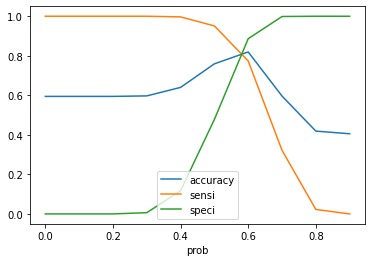

<Figure size 504x360 with 0 Axes>

In [ ]:
# finding cut-off with the right balance of the metrices
findOptimalCutoff(y_train_df)

In [ ]:
HighestPrec = 0.0
cutOffPrec = 0.0

for i in np.arange(0.3, 0.7,0.01):
    tenp1, tenp2 = predictClassWithProb2(rf_final,X_test_rf,y_test_rf,i,model_name='Random Forest',train_or_test='TEST')
    curPrecision=tenp2['Precision']
    if (curPrecision>HighestPrec):
        HighestPrec = curPrecision
        cutOffPrec=i
        

HighestAccuracy = 0.0
cutOffAccuracy = 0.0

for i in np.arange(0.02, 1,0.01):
    tenp1, tenp2 = predictClassWithProb2(rf_final,X_test_rf,y_test_rf,i,model_name='Random Forest',train_or_test='TEST')
    curAccuracy=tenp2['Accuracy']
    if (curAccuracy>HighestAccuracy):
        HighestAccuracy = curAccuracy
        cutOffAccuracy=i

In [ ]:
print("Highest Precision: ",HighestPrec, " at cut-off: ",cutOffPrec)
print("Highest Accuracy: ",HighestAccuracy, " at cut-off: ",cutOffAccuracy)

Highest Precision:  0.75  at cut-off:  0.6900000000000004
Highest Accuracy:  0.62  at cut-off:  0.48999999999999994


In [ ]:
# Testing Data
cut_off_prob=cutOffPrec
y_test_df,series_metrics= predictClassWithProb(rf_final,X_test_rf,y_test_rf,cut_off_prob,model_name='Random Forest',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5483142592019796
Sensitivity/Recall : 0.18679245283018867
Specificity: 0.9098360655737705
False Positive Rate: 0.09016393442622951
Positive predictive value: 0.75
Negative Predictive value: 0.43586387434554974
Precision: 0.75
Accuracy: 0.48214285714285715
F1 Score: 0.2990936555891239


In [ ]:
# Testing Data
cut_off_prob=cutOffAccuracy
y_test_df,series_metrics= predictClassWithProb(rf_final,X_test_rf,y_test_rf,cut_off_prob,model_name='Random Forest',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5550933085885144
Sensitivity/Recall : 0.8943396226415095
Specificity: 0.21584699453551912
False Positive Rate: 0.7841530054644809
Positive predictive value: 0.6228646517739816
Negative Predictive value: 0.5851851851851851
Precision: 0.6228646517739816
Accuracy: 0.6171875
F1 Score: 0.7343144848954299


In [ ]:
modelData = modelData.append({"Model":"Random Forest", 
                              "Parameter": "Precision","Value": HighestPrec,
                              "Cut-Off":cutOffPrec}, ignore_index=True)

modelData = modelData.append({"Model": "Random Forest", 
                              "Parameter": "Accuracy","Value": HighestAccuracy,
                              "Cut-Off":cutOffAccuracy}, ignore_index=True)

In [ ]:
modelData

Model  Parameter  Value  Cut-Off
0  Logistic Regression  Precision   0.72     0.72
1  Logistic Regression   Accuracy   0.62     0.46
2        Decision Tree  Precision   0.72     0.64
3        Decision Tree   Accuracy   0.61     0.31
4        Random Forest  Precision   0.75     0.69
5        Random Forest   Accuracy   0.62     0.49

# 4. Gradient Boosting

In [ ]:
# Creating Train-Test variables for Gradient Boosting
X_train_gb = pd.DataFrame(X_train_pca)
y_train_gb = pd.DataFrame(y_train_res)
X_test_gb = pd.DataFrame(X_test_pca)
y_test_gb = y_test


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

# Fitting the default GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=10)
modelfit(gbm, X_train_gb, y_train_gb)


Model Report
Accuracy : 0.731
Recall/Sensitivity : 0.947
AUC Score (Train): 0.877791
CV Score : Mean - 0.629 | Std - 0.0119 | Min - 0.611 | Max - 0.652


In [ ]:
param = {'n_estimators':range(10,170,20), 
         'max_depth':range(4,18,2), 
         'min_samples_split':range(250,801,250), 
        'max_features':range(5,550,50)}


gbm = GradientBoostingClassifier(random_state=10)
grid_search = GridSearchCV(estimator = gbm, param_grid = param, scoring='precision',n_jobs=-1,verbose=1000, cv=3)


grid_search.fit(X_train_gb, y_train_gb.values.ravel())

Fitting 3 folds for each of 1848 candidates, totalling 5544 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=10),
             n_jobs=-1,
             param_grid={'max_depth': range(4, 18, 2),
                         'max_features': range(5, 550, 50),
                         'min_samples_split': range(250, 801, 250),
                         'n_estimators': range(10, 170, 20)},
             scoring='precision', verbose=1000)

In [ ]:
grid_search.best_params_

{'max_depth': 14,
 'max_features': 55,
 'min_samples_split': 250,
 'n_estimators': 90}

In [ ]:
grid_search.best_score_

0.6383615765544978

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
1348          14.83          0.33  ...            0.01                1
1346           8.09          0.01  ...            0.01                2
807            1.98          0.04  ...            0.01                3
1351          24.38          0.07  ...            0.00                4
1324           1.54          0.02  ...            0.00                5
...             ...           ...  ...             ...              ...
690            0.01          0.01  ...             nan             1844
689            0.01          0.00  ...             nan             1845
688            0.01          0.00  ...             nan             1846
698            0.01          0.00  ...             nan             1847
1847           0.01          0.00  ...             nan             1848

[1848 rows x 15 columns]

In [ ]:
md_gb = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_depth'].iloc[0]
param_min_samples_split_gd = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_min_samples_split'].iloc[0]
param_n_estimators_gd = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_n_estimators'].iloc[0]
param_max_features_gd = pd.DataFrame(grid_search.cv_results_).sort_values(by="rank_test_score")['param_max_features'].iloc[0]

In [ ]:
# GradientBoostingClassifier with tuned Parameters
gbm_final = GradientBoostingClassifier(learning_rate=0.01, n_estimators=param_n_estimators_gd, max_features=param_max_features_gd, max_depth=md_gb, 
                                       min_samples_split=param_min_samples_split_gd, random_state=10)

modelfit(gbm_final, X_train_gb, y_train_gb)


Model Report
Accuracy : 0.628
Recall/Sensitivity : 0.978
AUC Score (Train): 0.901560
CV Score : Mean - 0.609 | Std - 0.00558 | Min - 0.601 | Max - 0.619


In [ ]:
# predictions on Test data
dtest_predictions = gbm_final.predict(X_test_gb)

# model Performance on test data
getModelMetrics(y_test_gb,dtest_predictions)

Roc_auc_score : 0.526569749458707
Sensitivity/Recall : 0.930188679245283
Specificity: 0.12295081967213115
False Positive Rate: 0.8770491803278688
Positive predictive value: 0.6056511056511057
Negative Predictive value: 0.5487804878048781
Precision: 0.6056511056511057
Accuracy: 0.6004464285714286
F1 Score: 0.7336309523809524


Model                           
Train/Test                      
Roc_auc_score               0.53
Sensitivity                 0.93
Specificity                 0.12
FPR                         0.88
Positive predictive value   0.61
Negative Predictive value   0.55
Precision                   0.61
Accuracy                    0.60
F1-Score                    0.73
dtype: object

In [ ]:
# predicting with default cut-off 0.5
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(gbm_final,X_train_gb,y_train_gb,cut_off_prob)

Roc_auc_score : 0.6279709106954079
Sensitivity/Recall : 0.9783936120244247
Specificity: 0.2775482093663912
False Positive Rate: 0.7224517906336089
Positive predictive value: 0.6650702426564495
Negative Predictive value: 0.8975501113585747
Precision: 0.6650702426564495
Accuracy: 0.6942194917620776
F1 Score: 0.7918646645124501


      prob  accuracy  sensi  speci
0.00  0.00      0.59   1.00   0.00
0.10  0.10      0.59   1.00   0.00
0.20  0.20      0.59   1.00   0.00
0.30  0.30      0.59   1.00   0.00
0.40  0.40      0.60   1.00   0.02
0.50  0.50      0.69   0.98   0.28
0.60  0.60      0.82   0.78   0.88
0.70  0.70      0.46   0.10   1.00
0.80  0.80      0.41   0.00   1.00
0.90  0.90      0.41   0.00   1.00


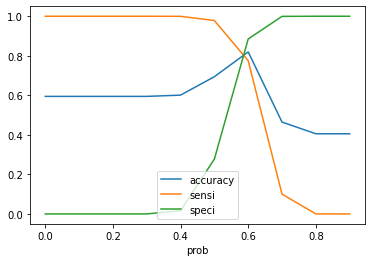

<Figure size 504x360 with 0 Axes>

In [ ]:
findOptimalCutoff(y_train_df)

In [ ]:
HighestPrec = 0.0
cutOffPrec = 0.0

for i in np.arange(0.3, 0.65,0.01):
    tenp1, tenp2 = predictClassWithProb2(gbm_final,X_test_gb,y_test_gb,i,model_name='Gradient Boosting',train_or_test='TEST')
    curPrecision=tenp2['Precision']
    if (curPrecision>HighestPrec):
        HighestPrec = curPrecision
        cutOffPrec=i
        

HighestAccuracy = 0.0
cutOffAccuracy = 0.0

for i in np.arange(0.02, 1,0.01):
    tenp1, tenp2 = predictClassWithProb2(gbm_final,X_test_gb,y_test_gb,i,model_name='Gradient Boosting',train_or_test='TEST')
    curAccuracy=tenp2['Accuracy']
    if (curAccuracy>HighestAccuracy):
        HighestAccuracy = curAccuracy
        cutOffAccuracy=i

In [ ]:
print("Highest Precision: ",HighestPrec, " at cut-off: ",cutOffPrec)
print("Highest Accuracy: ",HighestAccuracy, " at cut-off: ",cutOffAccuracy)

Highest Precision:  0.67  at cut-off:  0.6100000000000003
Highest Accuracy:  0.61  at cut-off:  0.4799999999999999


In [ ]:
# Testing Data
cut_off_prob=cutOffPrec
y_test_df,series_metrics= predictClassWithProb(gbm_final,X_test_gb,y_test_gb,cut_off_prob,model_name='Gradient Boosting',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5694453036395504
Sensitivity/Recall : 0.5132075471698113
Specificity: 0.6256830601092896
False Positive Rate: 0.3743169398907104
Positive predictive value: 0.6650366748166259
Negative Predictive value: 0.4702258726899384
Precision: 0.6650366748166259
Accuracy: 0.5591517857142857
F1 Score: 0.5793397231096912


In [ ]:
# Testing Data
cut_off_prob=cutOffAccuracy
y_test_df,series_metrics= predictClassWithProb(gbm_final,X_test_gb,y_test_gb,cut_off_prob,model_name='Gradient Boosting',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.528100835137643
Sensitivity/Recall : 0.9660377358490566
Specificity: 0.09016393442622951
False Positive Rate: 0.9098360655737705
Positive predictive value: 0.6059171597633136
Negative Predictive value: 0.6470588235294118
Precision: 0.6059171597633136
Accuracy: 0.6082589285714286
F1 Score: 0.7447272727272727


In [ ]:
modelData = modelData.append({"Model":"Gradient Boosting", 
                              "Parameter": "Precision","Value": HighestPrec,
                              "Cut-Off":cutOffPrec}, ignore_index=True)

modelData = modelData.append({"Model": "Gradient Boosting", 
                              "Parameter": "Accuracy","Value": HighestAccuracy,
                              "Cut-Off":cutOffAccuracy}, ignore_index=True)

In [ ]:
modelData

Model  Parameter  Value  Cut-Off
0  Logistic Regression  Precision   0.72     0.72
1  Logistic Regression   Accuracy   0.62     0.46
2        Decision Tree  Precision   0.72     0.64
3        Decision Tree   Accuracy   0.61     0.31
4        Random Forest  Precision   0.75     0.69
5        Random Forest   Accuracy   0.62     0.49
6    Gradient Boosting  Precision   0.67     0.61
7    Gradient Boosting   Accuracy   0.61     0.48

# 5. XG Boosting

In [ ]:
X_train_pca = X_train_pca_std
X_test_pca = X_test_pca_std

In [ ]:
# Creating Train-Test variables for XGBoost
X_train_xgb = pd.DataFrame(X_train_pca)
y_train_xgb = pd.DataFrame(y_train)
X_test_xgb = pd.DataFrame(X_test_pca)
y_test_xgb = y_test

In [ ]:
# Fitting the XGBClassifier without HyperParameter Tuning
xgb = XGBClassifier(learning_rate =0.1,
                    n_estimators=1000,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    nthread=-1,
                    seed=27)

In [ ]:
# Model fit and performance on Train data
modelfit(xgb, X_train_xgb, y_train_xgb)


Model Report
Accuracy : 1
Recall/Sensitivity : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.638 | Std - 0.0191 | Min - 0.617 | Max - 0.682


In [ ]:
param_test1 = {'max_depth':range(3,10,2),'min_child_weight':range(1,6,2)}

grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                     min_child_weight=1, gamma=0, subsample=0.8, 
                                                     colsample_bytree=0.8,
                                                     nthread=-1, scale_pos_weight=1, seed=27), 
                           param_grid = param_test1, scoring='precision',n_jobs=-1, cv=my_cv)

grid_search.fit(X_train_xgb, y_train_xgb)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

In [ ]:
grid_search.best_params_

{'max_depth': 5, 'min_child_weight': 3}

In [ ]:
grid_search.best_score_

0.6408947265144214

In [ ]:
my_md = grid_search.best_params_['max_depth']
my_min_child_weight = grid_search.best_params_['min_child_weight']

In [ ]:

param_test2 = {'gamma':[i/10.0 for i in range(0,5)]}
grid_search = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=my_md,
                                                     min_child_weight=my_min_child_weight, gamma=0, subsample=0.8, colsample_bytree=0.8, 
                                                     objective= 'binary:logistic', nthread=-1, scale_pos_weight=1,seed=27), 
                           param_grid = param_test2, scoring='precision',n_jobs=-1, cv=my_cv)

grid_search.fit(X_train_xgb, y_train_xgb)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=5, min_child_weight=3,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=-1,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_metho

In [ ]:
grid_search.best_params_

{'gamma': 0.1}

In [ ]:
my_gamma = grid_search.best_params_['gamma']

In [ ]:
 grid_search.best_score_

0.6422701969519826

In [ ]:
# Final XGBClassifier
xgb = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=my_md,
                    min_child_weight=my_min_child_weight, gamma=my_gamma, subsample=0.8, colsample_bytree=0.8,
                    objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27)

In [ ]:
# Fit Train data
modelfit(xgb, X_train_xgb, y_train_xgb)


Model Report
Accuracy : 0.962
Recall/Sensitivity : 0.995
AUC Score (Train): 0.997933
CV Score : Mean - 0.642 | Std - 0.0152 | Min - 0.615 | Max - 0.664


In [ ]:
# Prediction on Test data
dtest_predictions = xgb.predict(X_test_xgb)

In [ ]:
# Model evaluation on Test data
getModelMetrics(y_test_xgb,dtest_predictions)

Roc_auc_score : 0.5569388596762553
Sensitivity/Recall : 0.7641509433962265
Specificity: 0.34972677595628415
False Positive Rate: 0.6502732240437158
Positive predictive value: 0.6298600311041991
Negative Predictive value: 0.5059288537549407
Precision: 0.6298600311041991
Accuracy: 0.5948660714285714
F1 Score: 0.6905370843989771


Model                           
Train/Test                      
Roc_auc_score               0.56
Sensitivity                 0.76
Specificity                 0.35
FPR                         0.65
Positive predictive value   0.63
Negative Predictive value   0.51
Precision                   0.63
Accuracy                    0.59
F1-Score                    0.69
dtype: object

In [ ]:
# predicting with default cut-off 0.5
cut_off_prob=0.5
y_train_df,series_metrics = predictClassWithProb(xgb,X_train_xgb,y_train_xgb,cut_off_prob)
y_train_df.head()

Roc_auc_score : 0.9616039553483509
Sensitivity/Recall : 0.994833255049319
Specificity: 0.928374655647383
False Positive Rate: 0.07162534435261708
Positive predictive value: 0.9531953195319532
Negative Predictive value: 0.9919058130978661
Precision: 0.9531953195319532
Accuracy: 0.9678860653448758
F1 Score: 0.973569294415077


Class  Class_Prob  final_predicted
3277      1        0.87                1
763       0        0.32                0
3607      0        0.32                0
1959      0        0.17                0
4348      0        0.37                0

      prob  accuracy  sensi  speci
0.00  0.00      0.59   1.00   0.00
0.10  0.10      0.61   1.00   0.04
0.20  0.20      0.70   1.00   0.27
0.30  0.30      0.82   1.00   0.57
0.40  0.40      0.92   1.00   0.80
0.50  0.50      0.97   0.99   0.93
0.60  0.60      0.97   0.97   0.98
0.70  0.70      0.91   0.85   1.00
0.80  0.80      0.74   0.57   1.00
0.90  0.90      0.50   0.16   1.00


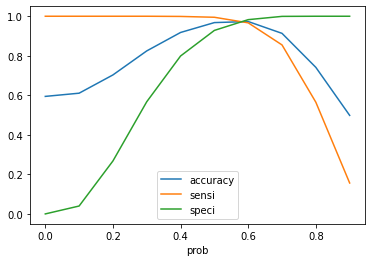

<Figure size 504x360 with 0 Axes>

In [ ]:
# Finding optimal cut-off probability
findOptimalCutoff(y_train_df)

In [ ]:
HighestPrec = 0.0
cutOffPrec = 0.0

for i in np.arange(0.3, 0.7,0.01):
    tenp1, tenp2 = predictClassWithProb2(xgb,X_test_xgb,y_test_xgb,i,model_name='XG Boosting',train_or_test='TEST')
    curPrecision=tenp2['Precision']
    if (curPrecision>HighestPrec):
        HighestPrec = curPrecision
        cutOffPrec=i
        

HighestAccuracy = 0.0
cutOffAccuracy = 0.0

for i in np.arange(0.02, 1,0.01):
    tenp1, tenp2 = predictClassWithProb2(xgb,X_test_xgb,y_test_xgb,i,model_name='XG Boosting',train_or_test='TEST')
    curAccuracy=tenp2['Accuracy']
    if (curAccuracy>HighestAccuracy):
        HighestAccuracy = curAccuracy
        cutOffAccuracy=i

In [ ]:
print("Highest Precision: ",HighestPrec, " at cut-off: ",cutOffPrec)
print("Highest Accuracy: ",HighestAccuracy, " at cut-off: ",cutOffAccuracy)

Highest Precision:  0.65  at cut-off:  0.5600000000000003
Highest Accuracy:  0.6  at cut-off:  0.5099999999999999


In [ ]:
# Testing Data
cut_off_prob=cutOffPrec
y_test_df,series_metrics= predictClassWithProb(xgb,X_test_xgb,y_test_xgb,cut_off_prob,model_name='Gradient Boosting',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5686101659964945
Sensitivity/Recall : 0.6754716981132075
Specificity: 0.46174863387978143
False Positive Rate: 0.5382513661202186
Positive predictive value: 0.645045045045045
Negative Predictive value: 0.49560117302052786
Precision: 0.645045045045045
Accuracy: 0.5881696428571429
F1 Score: 0.6599078341013825


In [ ]:
# Testing Data
cut_off_prob=cutOffAccuracy
y_test_df,series_metrics= predictClassWithProb(xgb,X_test_xgb,y_test_xgb,cut_off_prob,model_name='Gradient Boosting',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5641921847613156
Sensitivity/Recall : 0.7622641509433963
Specificity: 0.366120218579235
False Positive Rate: 0.6338797814207651
Positive predictive value: 0.6352201257861635
Negative Predictive value: 0.5153846153846153
Precision: 0.6352201257861635
Accuracy: 0.6004464285714286
F1 Score: 0.6929674099485421


In [ ]:
modelData = modelData.append({"Model":"XG Boosting", 
                              "Parameter": "Precision","Value": HighestPrec,
                              "Cut-Off":cutOffPrec}, ignore_index=True)

modelData = modelData.append({"Model": "XG Boosting", 
                              "Parameter": "Accuracy","Value": HighestAccuracy,
                              "Cut-Off":cutOffAccuracy}, ignore_index=True)

In [ ]:
modelData

Model  Parameter  Value  Cut-Off
0  Logistic Regression  Precision   0.72     0.72
1  Logistic Regression   Accuracy   0.62     0.46
2        Decision Tree  Precision   0.72     0.64
3        Decision Tree   Accuracy   0.61     0.31
4        Random Forest  Precision   0.75     0.69
5        Random Forest   Accuracy   0.62     0.49
6    Gradient Boosting  Precision   0.67     0.61
7    Gradient Boosting   Accuracy   0.61     0.48
8          XG Boosting  Precision   0.65     0.56
9          XG Boosting   Accuracy   0.60     0.51

# 6. Support Vector Machine

In [ ]:
# Creating Train-Test variables for SVM
X_train_svm = pd.DataFrame(X_train_pca)
y_train_svm = pd.DataFrame(y_train_res)
X_test_svm = pd.DataFrame(X_test_pca)
y_test_svm = y_test

In [ ]:
# instantiate an object of class SVC()
# note that we are using cost C=1
svm0 = SVC(C = 1)

In [ ]:
# fit
svm0.fit(X_train_svm, y_train_svm)

# predict on train
y_pred = svm0.predict(X_train_svm)

series_metrics=getModelMetrics(y_train_svm,y_pred,model_name='SVM',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.6285140464812953
Sensitivity/Recall : 0.9450446218882105
Specificity: 0.3119834710743802
False Positive Rate: 0.6880165289256198
Positive predictive value: 0.6682165393556958
Negative Predictive value: 0.7947368421052632
Precision: 0.6682165393556958
Accuracy: 0.6883552080424462
F1 Score: 0.7828793774319066


In [ ]:
# Predict on test
y_pred = svm0.predict(X_test_svm)
getModelMetrics(y_test_svm,y_pred)

Roc_auc_score : 0.5329415403649861
Sensitivity/Recall : 0.8773584905660378
Specificity: 0.1885245901639344
False Positive Rate: 0.8114754098360656
Positive predictive value: 0.610236220472441
Negative Predictive value: 0.5149253731343284
Precision: 0.610236220472441
Accuracy: 0.5959821428571429
F1 Score: 0.7198142414860681


Model                           
Train/Test                      
Roc_auc_score               0.53
Sensitivity                 0.88
Specificity                 0.19
FPR                         0.81
Positive predictive value   0.61
Negative Predictive value   0.51
Precision                   0.61
Accuracy                    0.60
F1-Score                    0.72
dtype: object

## Hyper Parameter Tuning

### Linear Kernal

In [ ]:
# specify range of parameters (C) as a list
params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]}

svm1 = SVC()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = svm1, param_grid = params, 
                        scoring= 'precision', cv = my_cv, verbose = 1, n_jobs=-1,
                       return_train_score=True) 

model_cv.fit(X_train_svm, y_train_svm.values.ravel())

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.7min finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 500, 1000]},
             return_train_score=True, scoring='precision', verbose=1)

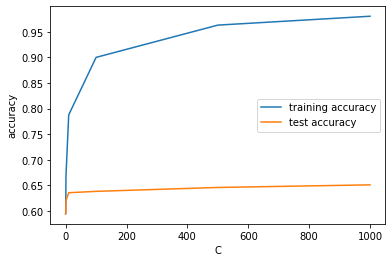

In [ ]:
plot_traintestAcc(model_cv.cv_results_,'C')

In [ ]:
model_cv.best_params_

{'C': 1000}

In [ ]:
#Trying smaller values as smaller values perform better

In [ ]:
svm_final = SVC(C = model_cv.best_params_['C'], kernel="rbf")
# fit
svm_final.fit(X_train_svm, y_train_svm.values.ravel())

SVC(C=1000)

In [ ]:
# predict
y_pred = svm_final.predict(X_test_svm)

In [ ]:
series_metrics=getModelMetrics(y_test_svm,y_pred,model_name='SVM-rbf',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5440509330858851
Sensitivity/Recall : 0.6509433962264151
Specificity: 0.4371584699453552
False Positive Rate: 0.5628415300546448
Positive predictive value: 0.6261343012704175
Negative Predictive value: 0.463768115942029
Precision: 0.6261343012704175
Accuracy: 0.5636160714285714
F1 Score: 0.6382978723404256


### Using Sigmoid kernal

In [ ]:
svm_k = SVC(C = model_cv.best_params_['C'], kernel='sigmoid')
svm_k.fit(X_train_svm, y_train_svm)

SVC(C=1000, kernel='sigmoid')

In [ ]:
y_pred = svm_k.predict(X_test_svm)

In [ ]:
series_metrics=getModelMetrics(y_test_svm,y_pred,model_name='SVM-sigmoid',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.532209506134653
Sensitivity/Recall : 0.6245283018867924
Specificity: 0.43989071038251365
False Positive Rate: 0.5601092896174863
Positive predictive value: 0.6175373134328358
Negative Predictive value: 0.44722222222222224
Precision: 0.6175373134328358
Accuracy: 0.5491071428571429
F1 Score: 0.6210131332082551


### SVM Poly Kernal

In [ ]:
svm_k = SVC(C = model_cv.best_params_['C'], kernel='poly',gamma='auto')
svm_k.fit(X_train_svm, y_train_svm)

SVC(C=1000, gamma='auto', kernel='poly')

In [ ]:
y_pred = svm_k.predict(X_test_svm)

In [ ]:
series_metrics=getModelMetrics(y_test_svm,y_pred,model_name='SVM-poly',train_or_test='TEST')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5108052376533663
Sensitivity/Recall : 0.5981132075471698
Specificity: 0.42349726775956287
False Positive Rate: 0.5765027322404371
Positive predictive value: 0.6003787878787878
Negative Predictive value: 0.421195652173913
Precision: 0.6003787878787878
Accuracy: 0.5267857142857143
F1 Score: 0.5992438563327032


In [ ]:
metricsdataframe

Model Train/Test  ...  Accuracy  F1-Score
0   Logistic Regression       TEST  ...      0.62      0.74
1   Logistic Regression       TEST  ...      0.45      0.22
2         Random Forest       TEST  ...      0.48      0.30
3         Random Forest       TEST  ...      0.62      0.73
4     Gradient Boosting       TEST  ...      0.58      0.65
5     Gradient Boosting       TEST  ...      0.56      0.58
6     Gradient Boosting       TEST  ...      0.61      0.74
7     Gradient Boosting       TEST  ...      0.59      0.66
8     Gradient Boosting       TEST  ...      0.60      0.69
9                   SVM      TRAIN  ...      0.69      0.78
10              SVM-rbf       TEST  ...      0.56      0.64
11          SVM-sigmoid       TEST  ...      0.55      0.62
12             SVM-poly       TEST  ...      0.53      0.60

[13 rows x 11 columns]

# 7. Naive Bayes

In [ ]:
# Creating Train-Test variables for SVM
X_train_nb = pd.DataFrame(X_train_pca)
y_train_nb = pd.DataFrame(y_train_res)
X_test_nb = pd.DataFrame(X_test_pca)
y_test_nb = y_test

## GridCV

In [ ]:
# specify range of parameters (C) as a list
params = {"var_smoothing": [1e-1, 1e-3, 1e-5, 1e-9, 1e-12]}

nb1 = GaussianNB()

# set up grid search scheme
# note that we are still using the 5 fold CV scheme
model_cv = GridSearchCV(estimator = nb1, param_grid = params, 
                        scoring= 'precision', cv = my_cv, verbose = 1, n_jobs=-1,
                       return_train_score=True) 

model_cv.fit(X_train_nb, y_train_nb.values.ravel())

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.9s finished


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': [0.1, 0.001, 1e-05, 1e-09, 1e-12]},
             return_train_score=True, scoring='precision', verbose=1)

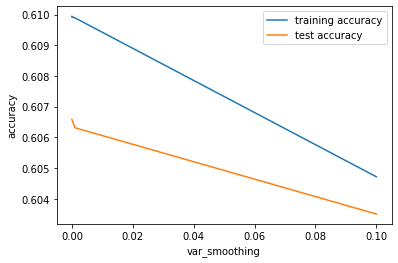

In [ ]:
plot_traintestAcc(model_cv.cv_results_,'var_smoothing')

In [ ]:
model_cv.best_params_

{'var_smoothing': 1e-05}

In [ ]:
model_cv.best_params_['var_smoothing']

1e-05

In [ ]:
nb = GaussianNB(var_smoothing=model_cv.best_params_['var_smoothing'])

In [ ]:
# fit
nb.fit(X_train_nb, y_train_nb)

# predict on train
y_pred = nb.predict(X_train_nb)

series_metrics=getModelMetrics(y_train_nb,y_pred,model_name='Naive Bayes',train_or_test='TRAIN')
metricsdataframe=WriteModelMetrics(series_metrics,metricsdataframe)

Roc_auc_score : 0.5280336026044639
Sensitivity/Recall : 0.8900892437764208
Specificity: 0.1659779614325069
False Positive Rate: 0.8340220385674931
Positive predictive value: 0.6101094655505473
Negative Predictive value: 0.5073684210526316
Precision: 0.6101094655505473
Accuracy: 0.5964814297682212
F1 Score: 0.7239732569245463


In [ ]:
# pd.DataFrame({'col':y_pred}).value_counts()

In [ ]:
# Predict on test
y_pred = nb.predict(X_test_nb)
getModelMetrics(y_test_nb,y_pred)

Roc_auc_score : 0.5174914939684503
Sensitivity/Recall : 0.879245283018868
Specificity: 0.1557377049180328
False Positive Rate: 0.8442622950819673
Positive predictive value: 0.6012903225806452
Negative Predictive value: 0.47107438016528924
Precision: 0.6012903225806452
Accuracy: 0.5837053571428571
F1 Score: 0.714176245210728


Model                           
Train/Test                      
Roc_auc_score               0.52
Sensitivity                 0.88
Specificity                 0.16
FPR                         0.84
Positive predictive value   0.60
Negative Predictive value   0.47
Precision                   0.60
Accuracy                    0.58
F1-Score                    0.71
dtype: object